This notebook is to combine the properties and features historical 

In [42]:
import pandas as pd
properties_df = pd.read_csv('/Users/rajaa/Desktop/Applied Data Science MAST30034/project-2-group-real-estate-industry-project-7-2025/Raja-workspace/notebooks/landing/raw/cleaned/5. Moving annual rent/enriched/all_properties_tidy_enriched.csv')
properties_df["date"] = pd.to_datetime(properties_df["date"], errors="coerce")
properties_df = properties_df[(properties_df["date"] >= start_date) & (properties_df["date"] <= end_date)]

In [43]:
properties_df.head(8)

Suburb       date  bedrooms property_type  \
476  Albert Park-Middle Park-West St Kilda 2017-03-01       1.0          flat   
477  Albert Park-Middle Park-West St Kilda 2017-03-01       2.0          flat   
478  Albert Park-Middle Park-West St Kilda 2017-03-01       2.0         house   
479  Albert Park-Middle Park-West St Kilda 2017-03-01       3.0          flat   
480  Albert Park-Middle Park-West St Kilda 2017-03-01       3.0         house   
481  Albert Park-Middle Park-West St Kilda 2017-03-01       4.0         house   
482  Albert Park-Middle Park-West St Kilda 2017-03-01       NaN           NaN   
483  Albert Park-Middle Park-West St Kilda 2017-06-01       1.0          flat   

     Count  Median        Lat         Lng   SA2_CODE21   SA2_NAME21  \
476    264     340 -37.853484  144.970161  206051128.0  Albert Park   
477    233     480 -37.853484  144.970161  206051128.0  Albert Park   
478    143     650 -37.853484  144.970161  206051128.0  Albert Park   
479     29     755 -37.853484  144.970161  206051128.0  Albert Park   
480    124     855 -37.853484  144.970161  206051128.0  Albert Park   
481     34    1050 -37.853484  144.970161  206051128.0  Albert Park   
482    909     520 -37.853484  144.970161  206051128.0  Albert Park   
483    248     340 -37.853484  144.970161  206051128.0  Albert Park   

     LGA_CODE21    LGA_NAME21  
476     25900.0  Port Phillip  
477     25900.0  Port Phillip  
478     25900.0  Port Phillip  
479     25900.0  Port Phillip  
480     25900.0  Port Phillip  
481     25900.0  Port Phillip  
482     25900.0  Port Phillip  
483     25900.0  Port Phillip

# Cleaning property data

In [44]:
missing_both = properties_df[properties_df["SA2_CODE21"].isna() | properties_df["LGA_CODE21"].isna()]
missing_both

Suburb       date  bedrooms property_type  Count  Median  Lat  \
45596  Group Total 2017-03-01       1.0          flat  17829     380  NaN   
45597  Group Total 2017-03-01       2.0          flat  19959     520  NaN   
45598  Group Total 2017-03-01       2.0         house   2229     560  NaN   
45599  Group Total 2017-03-01       3.0          flat   2147     750  NaN   
45600  Group Total 2017-03-01       3.0         house   1832     750  NaN   
...            ...        ...       ...           ...    ...     ...  ...   
91990  Wanagaratta 2025-03-01       2.0         house     23     390  NaN   
91991  Wanagaratta 2025-03-01       3.0          flat     22     450  NaN   
91992  Wanagaratta 2025-03-01       3.0         house    234     450  NaN   
91993  Wanagaratta 2025-03-01       4.0         house     70     580  NaN   
91994  Wanagaratta 2025-03-01       NaN           NaN    537     411  NaN   

       Lng  SA2_CODE21 SA2_NAME21  LGA_CODE21 LGA_NAME21  
45596  NaN         NaN        NaN         NaN        NaN  
45597  NaN         NaN        NaN         NaN        NaN  
45598  NaN         NaN        NaN         NaN        NaN  
45599  NaN         NaN        NaN         NaN        NaN  
45600  NaN         NaN        NaN         NaN        NaN  
...    ...         ...        ...         ...        ...  
91990  NaN         NaN        NaN         NaN        NaN  
91991  NaN         NaN        NaN         NaN        NaN  
91992  NaN         NaN        NaN         NaN        NaN  
91993  NaN         NaN        NaN         NaN        NaN  
91994  NaN         NaN        NaN         NaN        NaN  

[462 rows x 12 columns]

In [45]:
properties_df["SA2_CODE21"] = properties_df["SA2_CODE21"].astype("Int64")
properties_df["LGA_CODE21"] = properties_df["LGA_CODE21"].astype("Int64")


In [46]:
#Delete all "group total" rows, clean Wanagaratta SA2 code

# 1. Drop rows where Suburb == "Group Total"
properties_df = properties_df[properties_df["Suburb"] != "Group Total"].copy()

# 2. Update the Wanagaratta row
mask = properties_df["Suburb"] == "Wanagaratta"
properties_df.loc[mask, "SA2_CODE21"] = 204021066
properties_df.loc[mask, "SA2_NAME21"] = "Wangaratta"
properties_df.loc[mask, "Lat"] = -36.3588908
properties_df.loc[mask, "Lng"] = 146.3096576



In [47]:
#Delete all LGA related
properties_df = properties_df.drop(columns=["LGA_CODE21", "LGA_NAME21"])

Taking only the total of the properties, nan bedrooms and property type

In [48]:
properties_df = properties_df[
    properties_df["bedrooms"].isna() & properties_df["property_type"].isna()
]


In [49]:
properties_df = properties_df.drop(columns=["bedrooms", "property_type","Count"])
properties_df

Suburb       date  Median        Lat  \
482     Albert Park-Middle Park-West St Kilda 2017-03-01     520 -37.853484   
489     Albert Park-Middle Park-West St Kilda 2017-06-01     532 -37.853484   
496     Albert Park-Middle Park-West St Kilda 2017-09-01     530 -37.853484   
503     Albert Park-Middle Park-West St Kilda 2017-12-01     530 -37.853484   
510     Albert Park-Middle Park-West St Kilda 2018-03-01     550 -37.853484   
...                                       ...        ...     ...        ...   
100146                      Yarraville-Seddon 2024-03-01     570 -37.812809   
100153                      Yarraville-Seddon 2024-06-01     590 -37.812809   
100160                      Yarraville-Seddon 2024-09-01     595 -37.812809   
100167                      Yarraville-Seddon 2024-12-01     600 -37.812809   
100174                      Yarraville-Seddon 2025-03-01     600 -37.812809   

               Lng  SA2_CODE21   SA2_NAME21  
482     144.970161   206051128  Albert Park  
489     144.970161   206051128  Albert Park  
496     144.970161   206051128  Albert Park  
503     144.970161   206051128  Albert Park  
510     144.970161   206051128  Albert Park  
...            ...         ...          ...  
100146  144.884163   213031352   Yarraville  
100153  144.884163   213031352   Yarraville  
100160  144.884163   213031352   Yarraville  
100167  144.884163   213031352   Yarraville  
100174  144.884163   213031352   Yarraville  

[4818 rows x 7 columns]

In [50]:
properties_df["date"] = pd.to_datetime(
    properties_df["date"],
    format="%d/%m/%Y"   # day/month/year
)

In [51]:
import pandas as pd

# Year range
start_date = pd.Timestamp("2017-01-01")
end_date   = pd.Timestamp("2025-12-31")

# Load
properties_df = pd.read_csv("/Users/rajaa/Desktop/Applied Data Science MAST30034/project-2-group-real-estate-industry-project-7-2025/Raja-workspace/notebooks/landing/raw/cleaned/10. data for modeling suburb growth 2/properties_df.csv")

# Coerce to datetime (robust to different formats)
d = pd.to_datetime(properties_df["date"], errors="coerce")          # try ISO-like first
if d.isna().mean() > 0.5:                                           # if many NaT, try day-first
    d = pd.to_datetime(properties_df["date"], errors="coerce", dayfirst=True)
properties_df["date"] = d

# Optional: check if any dates failed to parse
bad = properties_df["date"].isna().sum()
if bad:
    print(f"Warning: {bad} rows had unparseable dates and will be dropped for the filter.")

# Filter to 2017–2025
properties_df = properties_df[(properties_df["date"] >= start_date) & (properties_df["date"] <= end_date)].copy()

properties_df


Suburb       date  Median        Lat  \
0     Albert Park-Middle Park-West St Kilda 2017-03-01     520 -37.853484   
1     Albert Park-Middle Park-West St Kilda 2017-06-01     532 -37.853484   
2     Albert Park-Middle Park-West St Kilda 2017-09-01     530 -37.853484   
3     Albert Park-Middle Park-West St Kilda 2017-12-01     530 -37.853484   
4     Albert Park-Middle Park-West St Kilda 2018-03-01     550 -37.853484   
...                                     ...        ...     ...        ...   
4813                      Yarraville-Seddon 2024-03-01     570 -37.812809   
4814                      Yarraville-Seddon 2024-06-01     590 -37.812809   
4815                      Yarraville-Seddon 2024-09-01     595 -37.812809   
4816                      Yarraville-Seddon 2024-12-01     600 -37.812809   
4817                      Yarraville-Seddon 2025-03-01     600 -37.812809   

             Lng  SA2_CODE21   SA2_NAME21   t  
0     144.970161   206051128  Albert Park   0  
1     144.970161   206051128  Albert Park   1  
2     144.970161   206051128  Albert Park   2  
3     144.970161   206051128  Albert Park   3  
4     144.970161   206051128  Albert Park   4  
...          ...         ...          ...  ..  
4813  144.884163   213031352   Yarraville  28  
4814  144.884163   213031352   Yarraville  29  
4815  144.884163   213031352   Yarraville  30  
4816  144.884163   213031352   Yarraville  31  
4817  144.884163   213031352   Yarraville  32  

[4818 rows x 8 columns]

In [52]:
properties_df.to_csv("properties_df.csv", index=False)

# Linear regression, using only median rent

Train and evaluate

In [53]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# 1️⃣ Prepare data again (clean + time index)

properties_df['date'] = pd.to_datetime(properties_df['date'])
properties_df = properties_df.sort_values(['Suburb', 'date'])

t0 = properties_df['date'].min()
properties_df['t'] = ((properties_df['date'] - t0) / pd.Timedelta(days=90)).astype(int)

# --- 1. prepare data ---
test_mask = properties_df['date'].isin([
    pd.Timestamp('2024-12-01'),
    pd.Timestamp('2025-03-01')
])
train_mask = ~test_mask

train_df = properties_df.loc[train_mask].copy()
test_df  = properties_df.loc[test_mask].copy()

results, pred_rows = [], []

# --- fit and evaluate per suburb ---
for suburb, df_train in train_df.groupby('Suburb'):
    df_train = df_train.sort_values('t')
    X_train = df_train[['t']]
    y_train = df_train['Median']

    df_test = test_df.loc[test_df['Suburb'] == suburb].sort_values('t')
    if df_test.empty:
        continue

    X_test = df_test[['t']]
    y_test = df_test['Median']

    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred) if len(y_test) >= 2 else np.nan

    results.append({
        'Suburb': suburb,
        'MAE_test': mae,
        'R2_test': r2,
        'n_train': len(X_train),
        'n_test': len(X_test)
    })

    pred_rows.append(pd.DataFrame({
        'Suburb': suburb,
        'date': df_test['date'].values,
        't': df_test['t'].values,
        'Actual': y_test.values,
        'Predicted': y_pred
    }))

results_df = pd.DataFrame(results).sort_values('MAE_test')
test_preds_df = pd.concat(pred_rows, ignore_index=True) if pred_rows else pd.DataFrame()

# --- summary metrics ---
if not test_preds_df.empty:
    overall_mae = mean_absolute_error(test_preds_df['Actual'], test_preds_df['Predicted'])
    overall_r2 = r2_score(test_preds_df['Actual'], test_preds_df['Predicted']) if len(test_preds_df) >= 2 else np.nan
    print(f"Overall MAE (Dec 2024 & Mar 2025): {overall_mae:.3f} | R²: {overall_r2}")
else:
    print("No test data for those quarters.")

print(results_df.head(10))




Overall MAE (Dec 2024 & Mar 2025): 54.567 | R²: 0.5286665323563444
                   Suburb  MAE_test   R2_test  n_train  n_test
66               Hamilton  0.928629  0.847351       31       2
5                Ballarat  2.013105  0.000000       31       2
115               Seymour  2.919758  0.000000       31       2
114  Sebastopol-Delacombe  3.070565  0.000000       31       2
130               Torquay  4.160887  0.000000       31       2
9                 Benalla  4.216331  0.637140       31       2
72                Horsham  4.315323  0.000000       31       2
62       Geelong-Newcombe  4.352823  0.000000       31       2
112           Sale-Maffra  4.476411  0.000000       31       2
137   Wendouree-Alfredton  4.968145  0.000000       31       2


Retrain all and then predict future growth

In [54]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# 2️⃣ Fit through March 2025 and forecast to 2030
forecast_quarters = pd.date_range('2025-06-01', '2030-12-01', freq='3MS')
future_results = []

for suburb, df_sub in properties_df.groupby('Suburb'):
    df_sub = df_sub.sort_values('t')
    
    # train on all data up to and including Mar 2025
    train_df = df_sub[df_sub['date'] <= '2025-03-01']
    if train_df.empty:
        continue
    
    X_train = train_df[['t']]
    y_train = train_df['Median']

    model = LinearRegression().fit(X_train, y_train)
    
    # prepare future t values
    last_t = train_df['t'].max()
    future_t = np.arange(last_t + 1, last_t + 1 + len(forecast_quarters))
    future_X = pd.DataFrame({'t': future_t})
    
    # forecast
    y_pred = model.predict(future_X)

    preds = pd.DataFrame({
        'Suburb': suburb,
        'date': forecast_quarters,
        'Predicted_Median': y_pred
    })
    future_results.append(preds)

forecast_df = pd.concat(future_results, ignore_index=True)
forecast_df.head()


Suburb       date  Predicted_Median
0  Albert Park-Middle Park-West St Kilda 2025-06-01        621.007576
1  Albert Park-Middle Park-West St Kilda 2025-09-01        624.230838
2  Albert Park-Middle Park-West St Kilda 2025-12-01        627.454100
3  Albert Park-Middle Park-West St Kilda 2026-03-01        630.677362
4  Albert Park-Middle Park-West St Kilda 2026-06-01        633.900624

Calculate the growth by using the difference

In [55]:
import pandas as pd
import numpy as np

# Ensure datetime
forecast_df = forecast_df.copy()
forecast_df['date'] = pd.to_datetime(forecast_df['date'])

# Define window
start_date = pd.Timestamp('2025-03-01')
end_date   = pd.Timestamp('2030-12-01')

# Pull start/end rows
start_vals = (properties_df.loc[properties_df['date'] == start_date, ['Suburb','Median']]
              .rename(columns={'Median':'Start'}))
end_vals   = (forecast_df.loc[forecast_df['date'] == end_date,   ['Suburb','Predicted_Median']]
              .rename(columns={'Predicted_Median':'End'}))

# Join and compute growth
growth_df = start_vals.merge(end_vals, on='Suburb', how='inner')
growth_df['Pct_Growth_%'] = (growth_df['End'] - growth_df['Start']) / growth_df['Start'] * 100

# CAGR over exact years between the two dates
years = (end_date.year + end_date.month/12) - (start_date.year + start_date.month/12)
growth_df['CAGR_%'] = ((growth_df['End'] / growth_df['Start'])**(1/years) - 1) * 100

# Sort by growth
growth_df = growth_df.sort_values('Pct_Growth_%', ascending=False).reset_index(drop=True)
print(growth_df.head(10))


                     Suburb  Start         End  Pct_Growth_%    CAGR_%
0                  Portland    400  569.177250     42.294313  6.326449
1  Ocean Grove-Barwon Heads    550  739.029078     34.368923  5.271992
2      Sebastopol-Delacombe    430  575.592135     33.858636  5.202355
3                   Morwell    360  481.537433     33.760398  5.188923
4               Wanagaratta    411  549.651070     33.735053  5.185457
5               Sale-Maffra    440  586.796791     33.362907  5.134494
6                   Benalla    440  586.018717     33.186072  5.110236
7            Moe-Newborough    360  474.163213     31.712004  4.906986
8             North Bendigo    460  596.027295     29.571151  4.608425
9                   Seymour    400  515.582331     28.895583  4.513365


# Combining with external features

Start with population

In [58]:
population_df = pd.read_csv('/Users/rajaa/Desktop/Applied Data Science MAST30034/project-2-group-real-estate-industry-project-7-2025/Raja-workspace/notebooks/landing/raw/cleaned/2. pop_growth/curated/full_erp_only_population_data.csv')
population_df


sa2_code  erp_2015  erp_2016  erp_2017  erp_2018  erp_2019  erp_2020  \
0    201011001   11039.0   11852.0   12649.0   13537.0   14434.0   15507.0   
1    201011002   12300.0   12301.0   12266.0   12244.0   12320.0   12196.0   
2    201011005    7191.0    7311.0    7409.0    7418.0    7458.0    7377.0   
3    201011006    6846.0    7195.0    7622.0    8183.0    8890.0    9755.0   
4    201011007    3966.0    3990.0    4004.0    4042.0    4112.0    4152.0   
..         ...       ...       ...       ...       ...       ...       ...   
525  217031476    3538.0    3556.0    3635.0    3710.0    3802.0    3911.0   
526  217041477    6716.0    6709.0    6717.0    6746.0    6798.0    6883.0   
527  217041478    9467.0    9603.0    9686.0    9783.0    9845.0    9859.0   
528  217041479   21217.0   21442.0   21688.0   21954.0   22184.0   22416.0   
529  217041480   13150.0   13173.0   13199.0   13226.0   13264.0   13346.0   

     erp_2021  erp_2022  erp_2023  ...      erp_2027      erp_2028  \
0     16841.0   18002.0   18995.0  ...  21325.893697  21895.531232   
1     12071.0   11938.0   11811.0  ...  11719.320995  11740.348397   
2      7229.0    7247.0    7323.0  ...   7434.686493   7497.293213   
3     10648.0   11798.0   12865.0  ...  16827.266327  17739.346612   
4      4211.0    4223.0    4267.0  ...   4341.161505   4370.224481   
..        ...       ...       ...  ...           ...           ...   
525    3979.0    3974.0    3983.0  ...   4147.083280   4182.682086   
526    6990.0    7046.0    7131.0  ...   7221.447801   7256.180692   
527    9967.0   10098.0   10147.0  ...  10495.508296  10585.734805   
528   22470.0   22586.0   22761.0  ...  23444.843119  23635.499809   
529   13298.0   13323.0   13477.0  ...  13461.672137  13489.840078   

         erp_2029      erp_2030      erp_2031      erp_2032      erp_2033  \
0    22465.168766  23034.806301  23604.443836  24095.619230  24586.794624   
1    11761.375799  11782.403201  11803.430603  11839.942960  11876.455316   
2     7559.899932   7622.506652   7685.113372   7753.868146   7822.622920   
3    18651.426898  19563.507183  20475.587469  21373.510463  22271.433457   
4     4399.287456   4428.350431   4457.413406   4511.024293   4564.635179   
..            ...           ...           ...           ...           ...   
525   4218.280891   4253.879696   4289.478501   4325.233368   4360.988235   
526   7290.913584   7325.646476   7360.379368   7392.136323   7423.893278   
527  10675.961314  10766.187824  10856.414333  10941.352640  11026.290947   
528  23826.156499  24016.813189  24207.469878  24402.183550  24596.897222   
529  13518.008020  13546.175962  13574.343903  13608.681571  13643.019238   

         erp_2034      erp_2035      erp_2036  
0    25077.970018  25569.145413  26060.320807  
1    11912.967673  11949.480030  11985.992387  
2     7891.377695   7960.132469   8028.887243  
3    23169.356451  24067.279445  24965.202439  
4     4618.246065   4671.856951   4725.467837  
..            ...           ...           ...  
525   4396.743101   4432.497968   4468.252835  
526   7455.650233   7487.407188   7519.164143  
527  11111.229254  11196.167562  11281.105869  
528  24791.610894  24986.324566  25181.038238  
529  13677.356905  13711.694572  13746.032239  

[530 rows x 23 columns]

In [59]:
import pandas as pd
import re

# ---------- INPUTS ----------
# properties_df with columns ['date','SA2_CODE21', ...]
# population_df with ['sa2_code','erp_2015'..] (wide)


# ---------- 1) Keep ONLY erp_2015..erp_2025 ----------
years = range(2017, 2026)
keep_cols = ["sa2_code"] + [f"erp_{y}" for y in years if f"erp_{y}" in population_df.columns]
pop_wide = population_df[keep_cols].copy()

# one row per SA2
if pop_wide.duplicated("sa2_code").any():
    pop_wide = (pop_wide.groupby("sa2_code", as_index=False)
                .agg({c: "mean" for c in pop_wide.columns if c != "sa2_code"}))

# ---------- 2) Wide -> long (dup-safe) ----------
pop_long = pop_wide.melt(id_vars="sa2_code", var_name="year_lbl", value_name="ERP")
pop_long["year"] = pop_long["year_lbl"].str[-4:].astype(int)
pop_long = (pop_long.groupby(["sa2_code","year"], as_index=False)
                    .agg(ERP=("ERP","mean")))
pop_long["date"] = pd.to_datetime(pop_long["year"].astype(str) + "-01-01")

# ---------- 3) Build ERP quarterly grid STRICTLY within 2015–2025, on the 3rd ----------
q_start = pd.Timestamp("2017-03-01")
q_end   = pd.Timestamp("2025-03-01")
quarterly_index = pd.date_range(start=q_start, end=q_end, freq="QS-MAR")  # 03-Mar, 03-Jun, 03-Sep, 03-Dec

# ---------- 4) Interpolate to quarterly (no extension outside window) ----------
out = []
for code, g in pop_long.groupby("sa2_code"):
    g = (g[["date", "ERP"]]
         .sort_values("date")
         .set_index("date"))
    g = g[~g.index.duplicated(keep="last")]

    # Interpolate on union, then keep only the 3rd-of-quarter dates
    union_idx = g.index.union(quarterly_index)
    g_u = g.reindex(union_idx)
    g_u["ERP"] = g_u["ERP"].interpolate(method="time") #method="time" because it is linear with time - good for population

    # Keep quarterly rows and make columns tidy
    g_q = (g_u.reindex(quarterly_index)
               .rename(columns={"ERP": "ERP_quarterly"})
               .reset_index()                      # now a RangeIndex
               .rename(columns={"index": "date"}))

    # IMPORTANT: assign SA2 after reset_index so it doesn’t align by the old DateTimeIndex
    g_q["SA2_CODE21"] = code  # scalar broadcast; simple and safe
    g_q["SA2_CODE21"] = g_q["SA2_CODE21"].astype("Int64")

    out.append(g_q)

pop_quarterly = pd.concat(out, ignore_index=True)

# ---------- 5) Snap property dates to the 3rd and MERGE ----------
#properties_df["date"] = properties_df["date"].dt.to_period("Q-MAR").dt.start_time 
merged_df = properties_df.merge(pop_quarterly, how="left", on=["SA2_CODE21","date"])

# Optional: drop property rows outside ERP window so you never see 2000 again
#merged = merged[(merged["date"] >= q_start) & (merged["date"] <= q_end)]


In [60]:
merged_df = pd.read_csv('/Users/rajaa/Desktop/Applied Data Science MAST30034/project-2-group-real-estate-industry-project-7-2025/Raja-workspace/notebooks/landing/raw/cleaned/10. data for modeling suburb growth 2/merged_df.csv')

In [61]:
merged_df

Suburb        date  Median        Lat  \
0     Albert Park-Middle Park-West St Kilda  2017-03-01     520 -37.853484   
1     Albert Park-Middle Park-West St Kilda  2017-06-01     532 -37.853484   
2     Albert Park-Middle Park-West St Kilda  2017-09-01     530 -37.853484   
3     Albert Park-Middle Park-West St Kilda  2017-12-01     530 -37.853484   
4     Albert Park-Middle Park-West St Kilda  2018-03-01     550 -37.853484   
...                                     ...         ...     ...        ...   
4813                      Yarraville-Seddon  2024-03-01     570 -37.812809   
4814                      Yarraville-Seddon  2024-06-01     590 -37.812809   
4815                      Yarraville-Seddon  2024-09-01     595 -37.812809   
4816                      Yarraville-Seddon  2024-12-01     600 -37.812809   
4817                      Yarraville-Seddon  2025-03-01     600 -37.812809   

             Lng  SA2_CODE21   SA2_NAME21   t  ERP_quarterly  \
0     144.970161   206051128  Albert Park   0   16536.854795   
1     144.970161   206051128  Albert Park   1   16594.323288   
2     144.970161   206051128  Albert Park   2   16651.791781   
3     144.970161   206051128  Albert Park   3   16708.635616   
4     144.970161   206051128  Albert Park   4   16785.060274   
...          ...         ...          ...  ..            ...   
4813  144.884163   213031352   Yarraville  28   16280.121038   
4814  144.884163   213031352   Yarraville  29   16337.039963   
4815  144.884163   213031352   Yarraville  30   16393.958888   
4816  144.884163   213031352   Yarraville  31   16450.259129   
4817  144.884163   213031352   Yarraville  32   16469.438332   

      Income_quarterly_med  
0             62618.808219  
1             62804.068493  
2             62989.328767  
3             63172.575342  
4             63400.523288  
...                    ...  
4813          84590.600000  
4814          84590.600000  
4815          84590.600000  
4816          84590.600000  
4817          84590.600000  

[4818 rows x 10 columns]

Continue with income

In [62]:
income_df = pd.read_csv("/Users/rajaa/Desktop/Applied Data Science MAST30034/project-2-group-real-estate-industry-project-7-2025/Raja-workspace/notebooks/landing/raw/cleaned/7. pop_income/income_predictions_2017_final.csv")
income_df = income_df.drop(income_df.index[0]).reset_index(drop=True) #First row is victoria we dont need it
income_df = income_df.rename(columns={"SA2": "sa2_code"})

In [63]:
income_df

sa2_code             SA2 NAME  2017-18.sum  2018-19.sum  2019-20.sum  \
0    201011001            Alfredton  483036463.0  526674675.0  587104678.0   
1    201011002             Ballarat  583676689.0  614019577.0  622719767.0   
2    201011005            Buninyong  267515723.0  279770315.0  288252226.0   
3    201011006            Delacombe  230736055.0  265359118.0  303858080.0   
4    201011007        Smythes Creek  145342967.0  159605715.0  162558698.0   
..         ...                  ...          ...          ...          ...   
517  217031476                Otway  108079271.0  115082194.0  121471267.0   
518  217041477         Moyne - East  207102941.0  235911309.0  248715753.0   
519  217041478         Moyne - West  311159848.0  336313641.0  359222336.0   
520  217041479  Warrnambool - North  797046929.0  759894035.0  804199635.0   
521  217041480  Warrnambool - South  438868297.0  483011789.0  492477052.0   

     2020-21.sum  2021-22.sum  2017.med  2018.med  2019.med  ...  \
0    671910899.0  766120245.0     49982     50151     51620  ...   
1    658757843.0  683888799.0     48152     48937     51187  ...   
2    302723074.0  325191920.0     50469     48461     49846  ...   
3    347767491.0  421457036.0     46355     45598     47940  ...   
4    174786090.0  183108810.0     48415     48000     50938  ...   
..           ...          ...       ...       ...       ...  ...   
517  135387035.0  141211176.0     32085     30663     32420  ...   
518  259197028.0  285466499.0     38224     40764     43158  ...   
519  384277688.0  430826553.0     41581     41093     43243  ...   
520  854591829.0  915937309.0     42537     43939     45632  ...   
521  532395346.0  553493680.0     41540     43308     44841  ...   

     2021-22.mean  med_CAGR  Predicted_Income_2023  Predicted_Income_2024  \
0           69685  3.132328           58944.600000           60626.628571   
1           82715  2.924842           56348.600000           57777.057143   
2           68664  1.836983           55824.000000           57031.571429   
3           59595  2.866193           54359.733333           55884.704762   
4           64520  2.740581           57691.866667           59380.638095   
..            ...       ...                    ...                    ...   
517         54543  5.020252           41767.466667           43770.123810   
518         61049  5.457629           51755.733333           54008.704762   
519         64874  4.403630           52606.933333           54729.104762   
520         60799  4.017371           53695.066667           55613.466667   
521         62408  4.781340           54013.600000           56187.485714   

     Predicted_Income_2025  Predicted_Income_2026  Predicted_Income_2027  \
0             62308.657143           63990.685714           65672.714286   
1             59205.514286           60633.971429           62062.428571   
2             58239.142857           59446.714286           60654.285714   
3             57409.676190           58934.647619           60459.619048   
4             61069.409524           62758.180952           64446.952381   
..                     ...                    ...                    ...   
517           45772.780952           47775.438095           49778.095238   
518           56261.676190           58514.647619           60767.619048   
519           56851.276190           58973.447619           61095.619048   
520           57531.866667           59450.266667           61368.666667   
521           58361.371429           60535.257143           62709.142857   

     Predicted_Income_2028  Predicted_Income_2029  Predicted_Income_2030  
0             67354.742857           69036.771429           70718.800000  
1             63490.885714           64919.342857           66347.800000  
2             61861.857143           63069.428571           64277.000000  
3             61984.590476           63509.561905           65034.533333  
4             66135.723810           67

Interpolate quarterly for both ERP and income

In [64]:
import pandas as pd
import re

# ---------- 0) Inputs ----------
# Assumes you already have merged_df in memory with columns:
#   - 'SA2_CODE21' (SA2 code for the row)
#   - 'date'       (quarterly timestamps you want to align to)
#
# If not yet datetime, we’ll coerce it below.

# Load income CSV
income_df = pd.read_csv(
    "/Users/rajaa/Desktop/Applied Data Science MAST30034/project-2-group-real-estate-industry-project-7-2025/Raja-workspace/notebooks/landing/raw/cleaned/7. pop_income/income_predictions_2017_final.csv"
)

# First row is Victoria totals — drop it; also standardise SA2 column name
income_df = income_df.drop(income_df.index[0]).reset_index(drop=True)
income_df = income_df.rename(columns={"SA2": "sa2_code"})

# ---------- 1) Collect the columns we need ----------
# 2017–2022 medians (named like "2017.med")
median_cols = [c for c in income_df.columns if re.fullmatch(r"\d{4}\.med", c)]
median_cols = [c for c in median_cols if 2017 <= int(c[:4]) <= 2022]
median_cols = sorted(median_cols)

# predicted 2023–2024 (named like "Predicted_Income_2023")
pred_cols = [c for c in income_df.columns if re.fullmatch(r"Predicted_Income_\d{4}", c)]
pred_cols = [c for c in pred_cols if 2023 <= int(c.split("_")[-1]) <= 2024]
pred_cols = sorted(pred_cols)

keep_cols = ["sa2_code"] + median_cols + pred_cols
income_keep = income_df[keep_cols].drop_duplicates(subset=["sa2_code"]).copy()

# ---------- 2) Rename to a unified scheme: income_YYYY ----------
rename_map = {c: f"income_{c[:4]}" for c in median_cols}  # '2017.med' -> 'income_2017'
rename_map.update({c: f"income_{c.split('_')[-1]}" for c in pred_cols})  # 'Predicted_Income_2023' -> 'income_2023'
income_keep = income_keep.rename(columns=rename_map)

# ---------- 3) Wide -> long (sa2_code, year, income_annual) ----------
value_cols = [c for c in income_keep.columns if c.startswith("income_")]
inc_long = income_keep.melt(
    id_vars="sa2_code",
    value_vars=value_cols,
    var_name="year_lbl",
    value_name="income_annual"
)

# Extract year as int and keep only 2017..2024
inc_long["year"] = inc_long["year_lbl"].str.extract(r"(\d{4})").astype(int)
inc_long = inc_long.drop(columns="year_lbl")
inc_long = inc_long[inc_long["year"].between(2017, 2024)].copy()

# If any duplicates remain per (sa2_code, year), average safely
inc_long = (
    inc_long
    .groupby(["sa2_code", "year"], as_index=False)
    .agg(income_annual=("income_annual", "mean"))
)

# Create annual datetime anchor (Jan 1 each year)
inc_long["date"] = pd.to_datetime(inc_long["year"].astype(str) + "-01-01")

# ---------- 4) Prepare target quarterly dates from merged_df ----------
# Coerce merged_df['date'] to tz-naive normalized datetimes
merged_df["date"] = pd.to_datetime(merged_df["date"], errors="coerce").dt.normalize()

# Build the set of target dates we want to align to (exactly the dates in merged_df)
target_dates = pd.DatetimeIndex(sorted(merged_df["date"].dropna().unique()))

# ---------- 5) Interpolate per SA2 across union(annual points, target dates) ----------
inc_q_list = []
for code, g in inc_long.groupby("sa2_code", sort=False):
    g = (
        g[["date", "income_annual"]]
        .sort_values("date")
        .set_index("date")
    )
    # Drop any duplicate index stamps (shouldn’t exist, but safe)
    g = g[~g.index.duplicated(keep="last")]

    # Union index for time-based interpolation
    union_idx = g.index.union(target_dates)
    g_u = g.reindex(union_idx)

    # Linear interpolation in calendar time
    g_u["income"] = g_u["income_annual"].interpolate(method="time")

    # Select back the target dates only
    g_q = g_u.reindex(target_dates)[["income"]].reset_index().rename(columns={"index": "date"})

    # Attach SA2 code in the final dtype you use elsewhere (Int64 keeps NA possible)
    # Your 'sa2_code' in income is likely numeric-as-string; coerce robustly:
    code_num = pd.to_numeric(code, errors="coerce")
    g_q["SA2_CODE21"] = pd.Series([code_num] * len(g_q), dtype="Int64")

    inc_q_list.append(g_q)

income_quarterly = pd.concat(inc_q_list, ignore_index=True)

# ---------- 6) Align merge key dtypes & merge ----------
# Ensure both sides' keys have identical dtypes
income_quarterly["date"] = pd.to_datetime(income_quarterly["date"], errors="coerce").dt.normalize()
merged_df["date"] = pd.to_datetime(merged_df["date"], errors="coerce").dt.normalize()

income_quarterly["SA2_CODE21"] = pd.to_numeric(income_quarterly["SA2_CODE21"], errors="coerce").astype("Int64")
merged_df["SA2_CODE21"] = pd.to_numeric(merged_df["SA2_CODE21"], errors="coerce").astype("Int64")

# Merge
merged_df = merged_df.merge(income_quarterly, how="left", on=["SA2_CODE21", "date"])

# ---------- 7) Clean final column name ----------
merged_df = merged_df.rename(columns={"income": "Income_quarterly_med"})

# (Optional) Quick sanity checks
# print(merged_df[["SA2_CODE21","date","Income_quarterly_med"]].head(10))
# print(merged_df["Income_quarterly_med"].isna().mean())  # fraction missing


In [65]:
merged_df

Suburb       date  Median        Lat  \
0     Albert Park-Middle Park-West St Kilda 2017-03-01     520 -37.853484   
1     Albert Park-Middle Park-West St Kilda 2017-06-01     532 -37.853484   
2     Albert Park-Middle Park-West St Kilda 2017-09-01     530 -37.853484   
3     Albert Park-Middle Park-West St Kilda 2017-12-01     530 -37.853484   
4     Albert Park-Middle Park-West St Kilda 2018-03-01     550 -37.853484   
...                                     ...        ...     ...        ...   
4813                      Yarraville-Seddon 2024-03-01     570 -37.812809   
4814                      Yarraville-Seddon 2024-06-01     590 -37.812809   
4815                      Yarraville-Seddon 2024-09-01     595 -37.812809   
4816                      Yarraville-Seddon 2024-12-01     600 -37.812809   
4817                      Yarraville-Seddon 2025-03-01     600 -37.812809   

             Lng  SA2_CODE21   SA2_NAME21   t  ERP_quarterly  \
0     144.970161   206051128  Albert Park   0   16536.854795   
1     144.970161   206051128  Albert Park   1   16594.323288   
2     144.970161   206051128  Albert Park   2   16651.791781   
3     144.970161   206051128  Albert Park   3   16708.635616   
4     144.970161   206051128  Albert Park   4   16785.060274   
...          ...         ...          ...  ..            ...   
4813  144.884163   213031352   Yarraville  28   16280.121038   
4814  144.884163   213031352   Yarraville  29   16337.039963   
4815  144.884163   213031352   Yarraville  30   16393.958888   
4816  144.884163   213031352   Yarraville  31   16450.259129   
4817  144.884163   213031352   Yarraville  32   16469.438332   

      Income_quarterly_med  Income_quarterly_med  
0             62618.808219          62618.808219  
1             62804.068493          62804.068493  
2             62989.328767          62989.328767  
3             63172.575342          63172.575342  
4             63400.523288          63400.523288  
...                    ...                   ...  
4813          84590.600000          84590.600000  
4814          84590.600000          84590.600000  
4815          84590.600000          84590.600000  
4816          84590.600000          84590.600000  
4817          84590.600000          84590.600000  

[4818 rows x 11 columns]

# Linear reg with income and population

Train and evaluate

In [66]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# --- 1️⃣ Prepare data ---
df = merged_df.copy(deep=True)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['Suburb', 'date'])

# numeric quarter index
t0 = df['date'].min()
df['t'] = ((df['date'] - t0) / pd.Timedelta(days=90)).astype(int)

# --- 2️⃣ Define train/test split ---
train_mask = df['date'] <= pd.Timestamp('2024-09-01')
test_mask  = df['date'].isin([pd.Timestamp('2024-12-01'), pd.Timestamp('2025-03-01')])

train_df = df.loc[train_mask].copy()
test_df  = df.loc[test_mask].copy()

results, test_rows, train_rows = [], [], []

# --- 3️⃣ Fit & evaluate per suburb ---
for suburb, df_train in train_df.groupby('Suburb'):
    df_train = df_train.sort_values('t')
    X_train = df_train[['t', 'ERP_quarterly', 'Income_quarterly_med']]
    y_train = df_train['Median']

    # skip suburbs with <2 train points (R² undefined)
    if len(X_train) < 2:
        continue

    # test slice for this suburb
    df_test = test_df.loc[test_df['Suburb'] == suburb].sort_values('t')
    X_test = df_test[['t', 'ERP_quarterly', 'Income_quarterly_med']] if not df_test.empty else None
    y_test = df_test['Median'] if not df_test.empty else None

    # fit
    model = LinearRegression().fit(X_train, y_train)

    # --- Train predictions & metrics ---
    y_pred_train = model.predict(X_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train  = r2_score(y_train, y_pred_train) if len(y_train) >= 2 else np.nan

    train_rows.append(pd.DataFrame({
        'Suburb': suburb,
        'date': df_train['date'].values,
        't': df_train['t'].values,
        'Actual': y_train.values,
        'Predicted': y_pred_train
    }))

    # --- Test predictions & metrics (if test rows exist) ---
    if X_test is not None and len(X_test) > 0:
        y_pred_test = model.predict(X_test)
        mae_test = mean_absolute_error(y_test, y_pred_test)
        r2_test  = r2_score(y_test, y_pred_test) if len(y_test) >= 2 else np.nan

        test_rows.append(pd.DataFrame({
            'Suburb': suburb,
            'date': df_test['date'].values,
            't': df_test['t'].values,
            'Actual': y_test.values,
            'Predicted': y_pred_test
        }))
    else:
        mae_test, r2_test = np.nan, np.nan

    results.append({
        'Suburb': suburb,
        'MAE_train': mae_train,
        'R2_train': r2_train,
        'MAE_test': mae_test,
        'R2_test': r2_test,
        'n_train': len(X_train),
        'n_test': 0 if X_test is None else len(X_test)
    })

# --- 4️⃣ Collate & overall metrics ---
results_df    = pd.DataFrame(results).sort_values(['MAE_test','MAE_train'], na_position='last')
train_preds_df = pd.concat(train_rows, ignore_index=True) if train_rows else pd.DataFrame()
test_preds_df  = pd.concat(test_rows,  ignore_index=True) if test_rows  else pd.DataFrame()

# Overall TRAIN metrics
if not train_preds_df.empty:
    overall_train_mae = mean_absolute_error(train_preds_df['Actual'], train_preds_df['Predicted'])
    overall_train_r2  = (r2_score(train_preds_df['Actual'], train_preds_df['Predicted'])
                         if train_preds_df['Suburb'].nunique() > 0 else np.nan)
    print(f"Overall TRAIN  MAE: {overall_train_mae:.3f} | R²: {overall_train_r2:.3f}")

# Overall TEST metrics
if not test_preds_df.empty:
    overall_test_mae = mean_absolute_error(test_preds_df['Actual'], test_preds_df['Predicted'])
    overall_test_r2  = (r2_score(test_preds_df['Actual'], test_preds_df['Predicted'])
                        if test_preds_df['Suburb'].nunique() > 0 else np.nan)
    print(f"Overall TEST   MAE: {overall_test_mae:.3f} | R²: {overall_test_r2:.3f}")
else:
    print("No test data available for those quarters.")

print("\nPer-suburb summary (top 10 by lowest test MAE):")
print(results_df.head(10))



Overall TRAIN  MAE: 10.452 | R²: 0.976
Overall TEST   MAE: 26.657 | R²: 0.844

Per-suburb summary (top 10 by lowest test MAE):
               Suburb  MAE_train  R2_train  MAE_test   R2_test  n_train  \
84     Moe-Newborough   6.460690  0.969835  0.395339  0.988249       31   
117   South Melbourne  13.273437  0.914820  0.942109  0.955869       31   
56            Fitzroy  10.720150  0.867266  1.897291  0.890011       31   
5            Ballarat   3.049433  0.988445  2.036811  0.000000       31   
130           Torquay   7.813190  0.974953  2.897115  0.000000       31   
72            Horsham   4.238873  0.984662  3.306556  0.000000       31   
66           Hamilton   5.107916  0.977226  3.796712 -1.308131       31   
83   Mill Park-Epping   7.806155  0.939367  3.852382 -1.816204       31   
93            Newtown   5.675704  0.971411  4.049283  0.239045       31   
80             Melton   6.716899  0.942105  4.119898  0.000000       31   

     n_test  
84        2  
117       2  
56   

Retrain on all

In [67]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# ---- 1) Prep data (no splitting) ----
df = merged_df.copy(deep=True)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['Suburb', 'date']).reset_index(drop=True)

# numeric quarter index (t)
t0 = df['date'].min()
df['t'] = ((df['date'] - t0) / pd.Timedelta(days=90)).astype(int)

FEATURES = ['t', 'ERP_quarterly', 'Income_quarterly_med']

# ---- 2) Fit per-suburb model on ALL rows & compute in-sample R² ----
results = []
models = {}
train_preds = []

for suburb, g in df.groupby('Suburb'):
    X = g[FEATURES]
    y = g['Median']

    # need at least 2 points to compute R²
    if len(g) < 2:
        results.append({'Suburb': suburb, 'R2_train': np.nan, 'Adj_R2_train': np.nan, 'n_obs': len(g)})
        continue

    model = LinearRegression().fit(X, y)
    yhat = model.predict(X)

    r2 = r2_score(y, yhat)

    # adjusted R² (optional, k = number of predictors)
    n = len(y)
    k = X.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / max(n - k - 1, 1)

    results.append({
        'Suburb': suburb,
        'R2_train': r2,
        'Adj_R2_train': adj_r2,
        'n_obs': n
    })

    models[suburb] = model
    train_preds.append(pd.DataFrame({
        'Suburb': suburb,
        'date': g['date'].values,
        'Actual': y.values,
        'Fitted': yhat
    }))

results_df = pd.DataFrame(results).sort_values('R2_train', ascending=False).reset_index(drop=True)
fitted_df = pd.concat(train_preds, ignore_index=True) if train_preds else pd.DataFrame()

# ---- 3) Summary of in-sample fit ----
mean_r2 = results_df['R2_train'].mean(skipna=True)
# Weighted by observations (more informative)
w_mean_r2 = np.average(results_df['R2_train'].fillna(0), weights=results_df['n_obs'])

print(f"In-sample R² (mean across suburbs): {mean_r2:.3f}")
print(f"In-sample R² (weighted by n_obs):  {w_mean_r2:.3f}")
print(results_df.head(10))


In-sample R² (mean across suburbs): 0.924
In-sample R² (weighted by n_obs):  0.924
                        Suburb  R2_train  Adj_R2_train  n_obs
0         Sebastopol-Delacombe  0.995527      0.994888     33
1  Golden Square-Kangaroo Flat  0.994475      0.993686     33
2            Hastings-Flinders  0.994030      0.993177     33
3                North Bendigo  0.993435      0.992497     33
4          Wendouree-Alfredton  0.992635      0.991583     33
5                     Warragul  0.992337      0.991242     33
6                        Corio  0.990486      0.989127     33
7                     Ballarat  0.990270      0.988879     33
8                      Sunbury  0.989618      0.988135     33
9                      Bendigo  0.988279      0.986604     33


In [68]:
# Save to CSV
merged_df.to_csv("merged_df.csv", index=False)

In [80]:
#Our prediction DF
prediction_df = pd.read_csv("/Users/rajaa/Desktop/Applied Data Science MAST30034/project-2-group-real-estate-industry-project-7-2025/Raja-workspace/notebooks/landing/raw/cleaned/10. data for modeling suburb growth 2/prediction_df.csv")
merged_df = pd.read_csv("/Users/rajaa/Desktop/Applied Data Science MAST30034/project-2-group-real-estate-industry-project-7-2025/Raja-workspace/notebooks/landing/raw/cleaned/10. data for modeling suburb growth 2/merged_df.csv")

In [81]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# ---- 1) Prep data (no splitting) ----
df = merged_df.copy(deep=True)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['Suburb', 'date']).reset_index(drop=True)

# numeric quarter index (t)
t0 = df['date'].min()
df['t'] = ((df['date'] - t0) / pd.Timedelta(days=90)).astype(int)

FEATURES = ['t', 'ERP_quarterly', 'Income_quarterly_med']

# ---- 2) Fit per-suburb model on ALL rows & compute in-sample R² ----
results = []
models = {}
train_preds = []

for suburb, g in df.groupby('Suburb'):
    X = g[FEATURES]
    y = g['Median']

    # need at least 2 points to compute R²
    if len(g) < 2:
        results.append({'Suburb': suburb, 'R2_train': np.nan, 'Adj_R2_train': np.nan, 'n_obs': len(g)})
        continue

    model = LinearRegression().fit(X, y)
    yhat = model.predict(X)

    r2 = r2_score(y, yhat)

    # adjusted R² (optional, k = number of predictors)
    n = len(y)
    k = X.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / max(n - k - 1, 1)

    results.append({
        'Suburb': suburb,
        'R2_train': r2,
        'Adj_R2_train': adj_r2,
        'n_obs': n
    })

    models[suburb] = model
    train_preds.append(pd.DataFrame({
        'Suburb': suburb,
        'date': g['date'].values,
        'Actual': y.values,
        'Fitted': yhat
    }))

results_df = pd.DataFrame(results).sort_values('R2_train', ascending=False).reset_index(drop=True)
fitted_df = pd.concat(train_preds, ignore_index=True) if train_preds else pd.DataFrame()

# ---- 3) Summary of in-sample fit ----
mean_r2 = results_df['R2_train'].mean(skipna=True)
# Weighted by observations (more informative)
w_mean_r2 = np.average(results_df['R2_train'].fillna(0), weights=results_df['n_obs'])

print(f"In-sample R² (mean across suburbs): {mean_r2:.3f}")
print(f"In-sample R² (weighted by n_obs):  {w_mean_r2:.3f}")
print(results_df.head(10))

In-sample R² (mean across suburbs): 0.924
In-sample R² (weighted by n_obs):  0.924
                        Suburb  R2_train  Adj_R2_train  n_obs
0         Sebastopol-Delacombe  0.995527      0.995064     33
1  Golden Square-Kangaroo Flat  0.994475      0.993903     33
2            Hastings-Flinders  0.994030      0.993413     33
3                North Bendigo  0.993435      0.992756     33
4          Wendouree-Alfredton  0.992635      0.991873     33
5                     Warragul  0.992337      0.991544     33
6                        Corio  0.990486      0.989502     33
7                     Ballarat  0.990270      0.989263     33
8                      Sunbury  0.989618      0.988544     33
9                      Bendigo  0.988279      0.987066     33


In [82]:
pred = prediction_df.copy()
# rename cols to match training FEATURES
pred = pred.rename(columns={
    'ERP': 'ERP_quarterly',
    'Predicted_Income': 'Income_quarterly_med'
})

# loop over suburbs & predict
pred_rows = []
for suburb, g in pred.groupby('Suburb'):
    print(g)
    model = models.get(suburb)
    if model is None:
        continue
    Xg = g[['t','ERP_quarterly','Income_quarterly_med']]
    g['Predicted_Median'] = model.predict(Xg)
    pred_rows.append(g)

pred_out = pd.concat(pred_rows, ignore_index=True)


           Lat         Lng  SA2_CODE21   SA2_NAME21  \
0   -37.853484  144.970161   206051128  Albert Park   
1   -37.853484  144.970161   206051128  Albert Park   
2   -37.853484  144.970161   206051128  Albert Park   
3   -37.853484  144.970161   206051128  Albert Park   
4   -37.853484  144.970161   206051128  Albert Park   
..         ...         ...         ...          ...   
754 -37.853484  144.970161   206051128  Albert Park   
755 -37.853484  144.970161   206051128  Albert Park   
756 -37.853484  144.970161   206051128  Albert Park   
757 -37.853484  144.970161   206051128  Albert Park   
758 -37.853484  144.970161   206051128  Albert Park   

                                    Suburb        date  ERP_quarterly  \
0    Albert Park-Middle Park-West St Kilda  2025-06-01   17081.458844   
1    Albert Park-Middle Park-West St Kilda  2025-09-01   17063.176312   
2    Albert Park-Middle Park-West St Kilda  2025-12-01   17045.092504   
3    Albert Park-Middle Park-West St Kilda  202

In [83]:
merged_df

Suburb        date  Median        Lat  \
0     Albert Park-Middle Park-West St Kilda  2017-03-01     520 -37.853484   
1     Albert Park-Middle Park-West St Kilda  2017-06-01     532 -37.853484   
2     Albert Park-Middle Park-West St Kilda  2017-09-01     530 -37.853484   
3     Albert Park-Middle Park-West St Kilda  2017-12-01     530 -37.853484   
4     Albert Park-Middle Park-West St Kilda  2018-03-01     550 -37.853484   
...                                     ...         ...     ...        ...   
4813                      Yarraville-Seddon  2024-03-01     570 -37.812809   
4814                      Yarraville-Seddon  2024-06-01     590 -37.812809   
4815                      Yarraville-Seddon  2024-09-01     595 -37.812809   
4816                      Yarraville-Seddon  2024-12-01     600 -37.812809   
4817                      Yarraville-Seddon  2025-03-01     600 -37.812809   

             Lng  SA2_CODE21   SA2_NAME21   t  ERP_quarterly  \
0     144.970161   206051128  Albert Park   0   16536.854795   
1     144.970161   206051128  Albert Park   1   16594.323288   
2     144.970161   206051128  Albert Park   2   16651.791781   
3     144.970161   206051128  Albert Park   3   16708.635616   
4     144.970161   206051128  Albert Park   4   16785.060274   
...          ...         ...          ...  ..            ...   
4813  144.884163   213031352   Yarraville  28   16280.121038   
4814  144.884163   213031352   Yarraville  29   16337.039963   
4815  144.884163   213031352   Yarraville  30   16393.958888   
4816  144.884163   213031352   Yarraville  31   16450.259129   
4817  144.884163   213031352   Yarraville  32   16469.438332   

      Income_quarterly_med  
0             62618.808219  
1             62804.068493  
2             62989.328767  
3             63172.575342  
4             63400.523288  
...                    ...  
4813          84590.600000  
4814          84590.600000  
4815          84590.600000  
4816          84590.600000  
4817          84590.600000  

[4818 rows x 10 columns]

Calculating growth by the difference

In [84]:
import pandas as pd
import numpy as np

# ---- Params ----
base_date = pd.Timestamp("2025-03-01")
hzn_date  = pd.Timestamp("2030-12-01")

# ---- Copies & dates ----
hist = properties_df.copy()
pred = pred_out.copy()
hist["date"] = pd.to_datetime(hist["date"])
pred["date"] = pd.to_datetime(pred["date"])

# ---- Choose prediction column ----
if "predicted_Median" in pred.columns:
    pred_col = "predicted_Median"
elif "Predicted_Median" in pred.columns:
    pred_col = "Predicted_Median"
else:
    raise KeyError("pred_out must have 'predicted_Median' or 'Predicted_Median'.")

# ---- Harmonize join key: SA2_CODE21 as string ----
for df_ in (hist, pred):
    if "SA2_CODE21" not in df_.columns:
        raise KeyError("Expected column 'SA2_CODE21' not found.")
    df_["SA2_CODE21"] = df_["SA2_CODE21"].astype(str)

# ---- Helper: last on/before target date (one row per SA2) ----
def last_on_or_before(df, target_date, value_col, extras=None):
    extras = [c for c in (extras or []) if c in df.columns]
    sub = df.loc[df["date"] <= target_date, ["SA2_CODE21", "date", value_col] + extras].copy()
    if sub.empty:
        return pd.DataFrame(columns=["SA2_CODE21", "date", value_col] + extras)
    out = (sub.sort_values(["SA2_CODE21", "date"])
               .drop_duplicates(subset=["SA2_CODE21"], keep="last"))
    return out

# ---- 1) Try exact-date slices ----
base_exact = hist.loc[hist["date"] == base_date, ["SA2_CODE21","SA2_NAME21","Median"]].copy()
hzn_exact  = pred.loc[pred["date"] == hzn_date, ["SA2_CODE21", pred_col]].copy()

# Dedup (keep first) if any accidental duplicates
if not base_exact.empty and base_exact.duplicated("SA2_CODE21").any():
    base_exact = base_exact.drop_duplicates("SA2_CODE21", keep="first")
if not hzn_exact.empty and hzn_exact.duplicated("SA2_CODE21").any():
    hzn_exact = hzn_exact.drop_duplicates("SA2_CODE21", keep="first")

use_fallback = base_exact.empty or hzn_exact.empty

if not use_fallback:
    base_df = base_exact.rename(columns={"Median": "Median_2025"})
    hzn_df  = hzn_exact.rename(columns={pred_col: "Predicted_Median"})
else:
    # ---- 2) Fallback to last-on-or-before per SA2 ----
    base_pick = last_on_or_before(hist, base_date, "Median", extras=["SA2_NAME21"])
    hzn_pick  = last_on_or_before(pred, hzn_date,  pred_col, extras=["SA2_NAME21"])

    # Rename to standard output names
    base_df = base_pick.rename(columns={"Median": "Median_2025"})
    hzn_df  = hzn_pick.rename(columns={pred_col: "Predicted_Median"})

# ---- 3) Merge by SA2 only ----
growth_df = (base_df.merge(hzn_df[["SA2_CODE21","Predicted_Median"]],
                           on="SA2_CODE21", how="inner")
                    .dropna(subset=["Median_2025", "Predicted_Median"])
            )

# If SA2_NAME21 missing (e.g., only on one side), try to attach from hist
if "SA2_NAME21" not in growth_df.columns and "SA2_NAME21" in hist.columns:
    sa2_names = (hist[["SA2_CODE21","SA2_NAME21"]]
                 .drop_duplicates("SA2_CODE21"))
    growth_df = growth_df.merge(sa2_names, on="SA2_CODE21", how="left")

# Guard against nonpositive baseline
growth_df = growth_df[growth_df["Median_2025"] > 0].copy()

# ---- 4) Metrics ----
growth_df["Growth_abs"] = growth_df["Predicted_Median"] - growth_df["Median_2025"]
growth_df["Growth_pct"] = (growth_df["Predicted_Median"] / growth_df["Median_2025"] - 1.0) * 100

years = (hzn_date - base_date).days / 365.25  # fixed horizon
growth_df["CAGR_pct"] = ((growth_df["Predicted_Median"] / growth_df["Median_2025"])**(1/years) - 1) * 100

# ---- 5) Final tidy output ----
cols = ["SA2_CODE21","SA2_NAME21","Median_2025","Predicted_Median","Growth_abs","Growth_pct","CAGR_pct"]
missing_cols = [c for c in cols if c not in growth_df.columns]
for c in missing_cols:
    growth_df[c] = np.nan  # fill if SA2_NAME21 was truly unavailable
result_per_sa2 = growth_df[cols].sort_values("CAGR_pct", ascending=False)

print(f"Exact-date used: {not use_fallback}")
print(result_per_sa2.head(30).round(3))



Exact-date used: True
    SA2_CODE21                      SA2_NAME21  Median_2025  Predicted_Median  \
92   206041127     West Melbourne - Industrial          600          1196.604   
97   212011549           Pakenham - North East          530           953.202   
36   203021486            Corio - Lovely Banks          395           696.602   
40   211051282        Mount Dandenong - Olinda          530           900.152   
113  206041508  Southbank (West) - South Wharf          670          1124.877   
116  210041240                         Sunbury          500           801.293   
83   205041096                         Morwell          360           573.905   
105  211031266                        Ringwood          550           847.882   
41   212021453         Endeavour Hills - North          520           798.455   
80   209041431                   Epping - East          520           792.501   
133  209041225                      Whittlesea          540           797.914   
71   2

In [85]:
growth_df

SA2_CODE21          SA2_NAME21  Median_2025  Predicted_Median  Growth_abs  \
0    206051128         Albert Park          700        768.764837   68.764837   
1    213021341              Altona          550        640.090686   90.090686   
2    206061135            Armadale          625        747.275123  122.275123   
3    208031186  Chelsea - Bonbeach          600        796.854166  196.854166   
4    205021081          Bairnsdale          450        477.483965   27.483965   
..         ...                 ...          ...               ...         ...   
133  209041225          Whittlesea          540        797.914353  257.914353   
134  213021346        Williamstown          650        778.973732  128.973732   
135  204031492             Wodonga          475        664.173172  189.173172   
136  211051286        Yarra Valley          560        687.567749  127.567749   
137  213031352          Yarraville          600        727.578389  127.578389   

     Growth_pct  CAGR_pct  
0      9.823548  1.642359  
1     16.380125  2.672173  
2     19.564020  3.155057  
3     32.809028  5.056420  
4      6.107548  1.035939  
..          ...       ...  
133   47.761917  7.023150  
134   19.842113  3.196727  
135   39.825931  6.000963  
136   22.779955  3.632133  
137   21.263065  3.408408  

[138 rows x 7 columns]

# Time series

Train and evaluate

In [93]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import warnings
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# ===============================
# 1) Evaluate non-seasonal spec(s)
# ===============================
def eval_all_specs_noseason(y_train, X_train, y_test, X_test):
    """
    Evaluate ARIMA(p,d,q) models with NO seasonal terms.
    Returns a DataFrame with AIC, R2_Test, RMSE_Test for each spec.
    """
    order_grid = [(1,1,0)]   # add more tuples if you want to try others
    seas = (0,0,0,0)         # NO seasonal terms

    rows = []
    warnings.simplefilter("ignore", ConvergenceWarning)
    warnings.simplefilter("ignore", RuntimeWarning)

    # Ensure numeric (avoid dtype surprises)
    y_train = pd.to_numeric(y_train, errors="coerce")
    y_test  = pd.to_numeric(y_test,  errors="coerce")
    if X_train is not None:
        X_train = X_train.apply(pd.to_numeric, errors="coerce")
    if X_test is not None:
        X_test = X_test.apply(pd.to_numeric, errors="coerce")

    for order in order_grid:
        try:
            mdl = sm.tsa.SARIMAX(
                endog=y_train, exog=X_train,
                order=order, seasonal_order=seas,
                trend="c",
                enforce_stationarity=False,
                enforce_invertibility=False,
            )
            fit = mdl.fit(method="lbfgs", disp=False, maxiter=1000)

            # Forecast onto the test period using aligned exog
            fcst = fit.get_forecast(steps=len(y_test), exog=X_test)
            y_pred = pd.Series(fcst.predicted_mean.values, index=y_test.index)

            # --- Metrics (version-agnostic RMSE) ---
            y_true = pd.to_numeric(y_test, errors="coerce")
            y_hat  = pd.to_numeric(y_pred, errors="coerce")
            # MSE then sqrt (no 'squared' kwarg needed)
            mse  = mean_squared_error(y_true, y_hat)
            rmse = float(np.sqrt(mse))
            r2   = r2_score(y_true, y_hat) if len(y_true) > 1 else np.nan

            rows.append({
                "Order": order,
                "Seasonal": seas,
                "AIC": fit.aic,
                "R2_Test": r2,
                "RMSE_Test": rmse
            })
        except Exception as e:
            rows.append({
                "Order": order, "Seasonal": seas,
                "AIC": np.inf, "R2_Test": np.nan, "RMSE_Test": np.nan,
                "Error": str(e)
            })

    return pd.DataFrame(rows)

# ===========================================
# 2) Run per suburb with your existing columns
# ===========================================
def run_arima4_by_suburb_noseason(
    merged_df,
    split_date="2024-09-01",
    exog_cols=("ERP_quarterly", "Income_quarterly_med"),
    min_train_points=12,
    min_test_points=3,
):
    """
    - Uses NON-SEASONAL ARIMA only (seasonal_order=(0,0,0,0)).
    - Train: rows with date < split_date
    - Test : rows with date >= split_date
    - Outputs a tall metrics table and a wide R2 table.
    """
    df = merged_df.copy()
    df["date"] = pd.to_datetime(df["date"])
    split_date = pd.Timestamp(split_date)

    all_rows = []

    for suburb, g in df.groupby("Suburb"):
        # Ensure quarterly index (3MS = quarter starts at month-start)
        g = g.set_index("date").asfreq("3MS").sort_index()

        # Endog & exog presence
        if "Median" not in g.columns:
            continue
        missing_exogs = [c for c in exog_cols if c not in g.columns]
        if missing_exogs:
            continue

        y = g["Median"].ffill().bfill()
        X = g[list(exog_cols)].ffill().bfill()

        # Train/Test split
        y_train, y_test = y.loc[y.index < split_date], y.loc[y.index >= split_date]
        X_train, X_test = X.loc[X.index < split_date], X.loc[X.index >= split_date]

        # Guards
        if len(y_train) < min_train_points or len(y_test) < min_test_points:
            continue

        # Drop any remaining NaNs on train rows
        valid_tr = y_train.notna() & X_train.notna().all(axis=1)
        y_train_fit = y_train.loc[valid_tr]
        X_train_fit = X_train.loc[valid_tr]
        if len(y_train_fit) < min_train_points:
            continue

        # Evaluate the non-seasonal spec(s)
        spec_table = eval_all_specs_noseason(y_train_fit, X_train_fit, y_test, X_test)
        spec_table.insert(0, "Suburb", suburb)
        spec_table.insert(1, "Train_n", len(y_train_fit))
        spec_table.insert(2, "Test_n", len(y_test))
        all_rows.append(spec_table)

    if not all_rows:
        print("No suburbs produced metrics (check guards/split/exog columns).")
        return pd.DataFrame(), pd.DataFrame()

    metrics = pd.concat(all_rows, ignore_index=True)

    # Sort: best R² first within each suburb
    if "R2_Test" in metrics.columns:
        metrics = metrics.sort_values(["Suburb", "R2_Test"], ascending=[True, False])

    # Optional wide table: R² side-by-side by (p,d,q)
    metrics["model"] = metrics["Order"].astype(str)
    r2_wide = (
        metrics
        .dropna(subset=["R2_Test"])
        .pivot_table(index="Suburb", columns="model", values="R2_Test")
        .sort_index()
    )

    # Quick summary printouts
    with pd.option_context("display.max_rows", 20, "display.width", 120):
        print("=== Sample of per-model metrics (tall) ===")
        print(metrics.head(12))
        print("\n=== R² per model (wide) ===")
        print(r2_wide.head())

    return metrics, r2_wide

# ===================
# 3) Run it on your df
# ===================
# Assumes merged_df has columns:
# 'Suburb', 'date', 'Median', 'ERP_quarterly', 'Income_quarterly_med'
metrics_df, r2_wide_df = run_arima4_by_suburb_noseason(
    merged_df,
    split_date="2024-09-01",
    exog_cols=("ERP_quarterly", "Income_quarterly_med"),
    min_train_points=12,
    min_test_points=3,
)


=== Sample of per-model metrics (tall) ===
                                   Suburb  Train_n  Test_n      Order      Seasonal         AIC    R2_Test  RMSE_Test  \
0   Albert Park-Middle Park-West St Kilda       30       3  (1, 1, 0)  (0, 0, 0, 0)  251.317230  -5.070016   8.129928   
1                                  Altona       30       3  (1, 1, 0)  (0, 0, 0, 0)  181.568432   0.000000  14.876771   
2                                Armadale       30       3  (1, 1, 0)  (0, 0, 0, 0)  235.156141  -2.461850  21.927436   
3                Aspendale-Chelsea-Carrum       30       3  (1, 1, 0)  (0, 0, 0, 0)  198.838009   0.000000   7.218990   
4                              Bairnsdale       30       3  (1, 1, 0)  (0, 0, 0, 0)  189.281669  -2.378828  17.330328   
5                                Ballarat       30       3  (1, 1, 0)  (0, 0, 0, 0)  160.839369  -1.006210   3.338504   
6                                  Balwyn       30       3  (1, 1, 0)  (0, 0, 0, 0)  228.208773   0.000000  10

Brunswick — Test RMSE: 9.084, R²: -1.122, AIC: 215.8


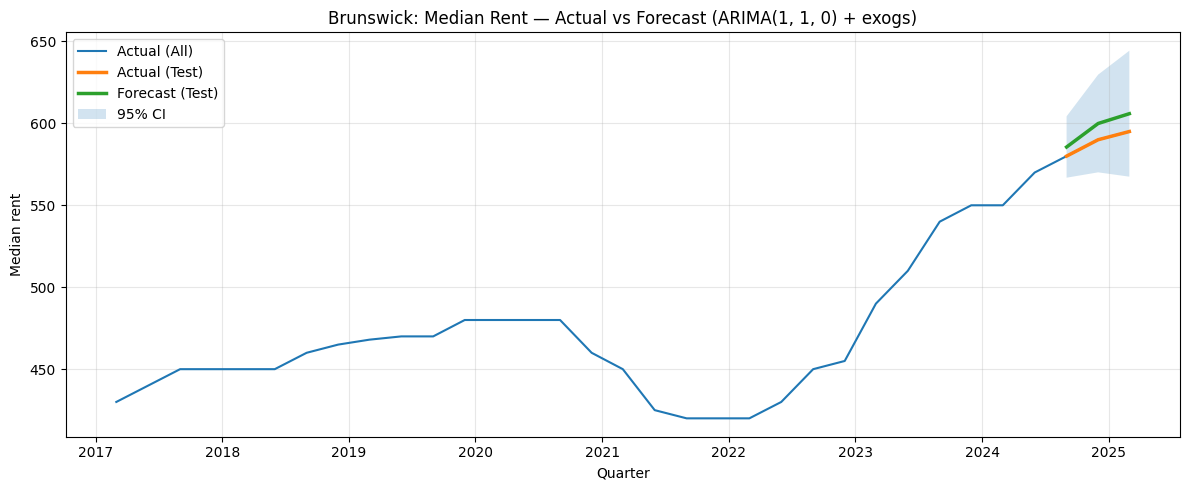

In [153]:

# === Plot Actual vs Predicted for a single suburb (Brunswick) ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

SUBURB_NAME = "Brunswick"
SPLIT_DATE  = pd.Timestamp("2024-09-01")
EXOG_COLS   = ("ERP_quarterly", "Income_quarterly_med")
ORDER       = (1,1,0)
SEASONAL    = (0,0,0,0)

# 1) Slice + prep
g = merged_df.loc[merged_df["Suburb"].astype(str).str.strip() == SUBURB_NAME].copy()
if g.empty:
    raise ValueError(f"No rows found for suburb: {SUBURB_NAME}")

g["date"] = pd.to_datetime(g["date"])
g = g.set_index("date").asfreq("3MS").sort_index()

# ensure required columns
missing = [c for c in ["Median", *EXOG_COLS] if c not in g.columns]
if missing:
    raise ValueError(f"Missing columns for modeling: {missing}")

# fill small gaps
y = pd.to_numeric(g["Median"], errors="coerce").ffill().bfill()
X = g[list(EXOG_COLS)].apply(pd.to_numeric, errors="coerce").ffill().bfill()

# 2) Train/Test
y_train, y_test = y.loc[y.index < SPLIT_DATE], y.loc[y.index >= SPLIT_DATE]
X_train, X_test = X.loc[X.index < SPLIT_DATE], X.loc[X.index >= SPLIT_DATE]

if len(y_train) < 12 or len(y_test) < 1:
    raise ValueError("Not enough train/test points after split for Brunswick.")

# 3) Fit non-seasonal SARIMAX
mdl = sm.tsa.SARIMAX(
    endog=y_train, exog=X_train,
    order=ORDER, seasonal_order=SEASONAL,
    trend="c",
    enforce_stationarity=False, enforce_invertibility=False
)
fit = mdl.fit(method="lbfgs", disp=False, maxiter=1000)

# 4) Forecast on test window w/ aligned exog
fc = fit.get_forecast(steps=len(y_test), exog=X_test)
y_pred = pd.Series(fc.predicted_mean.values, index=y_test.index)
ci = fc.conf_int(alpha=0.05)  # DataFrame with cols like 'lower Median', 'upper Median'
# Handle column names across statsmodels versions:
lower_col = [c for c in ci.columns if "lower" in c.lower()][0]
upper_col = [c for c in ci.columns if "upper" in c.lower()][0]
ci_lower = pd.Series(ci[lower_col].values, index=y_test.index)
ci_upper = pd.Series(ci[upper_col].values, index=y_test.index)

# 5) Metrics
rmse = float(np.sqrt(mean_squared_error(y_test, y_pred)))
r2   = r2_score(y_test, y_pred) if len(y_test) > 1 else np.nan
print(f"{SUBURB_NAME} — Test RMSE: {rmse:.3f}, R²: {r2:.3f}, AIC: {fit.aic:.1f}")

# 6) Plot
plt.figure(figsize=(12,5))
plt.plot(y.index, y.values, label="Actual (All)", linewidth=1.5)

# highlight the test segment actuals
plt.plot(y_test.index, y_test.values, label="Actual (Test)", linewidth=2.5)

# predictions + CI on test
plt.plot(y_pred.index, y_pred.values, label="Forecast (Test)", linewidth=2.5)
plt.fill_between(y_pred.index, ci_lower.values, ci_upper.values, alpha=0.2, label="95% CI")

plt.title(f"{SUBURB_NAME}: Median Rent — Actual vs Forecast (ARIMA{ORDER} + exogs)")
plt.xlabel("Quarter")
plt.ylabel("Median rent")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



=== Portfolio summary (all suburbs & models) ===
           count     mean     std      min      25%      50%      75%      max
RMSE_Test  146.0   13.728   8.945    1.848    7.220   11.672   18.287   56.987
R2_Test    146.0  -10.272  40.029 -356.843   -5.058   -0.818    0.000    0.889
AIC        146.0  195.903  21.764  155.099  179.952  192.243  211.195  260.277

=== Best model per suburb by RMSE ===
                                      best_model_by_RMSE
Suburb                                                  
Albert Park-Middle Park-West St Kilda          (1, 1, 0)
Altona                                         (1, 1, 0)
Armadale                                       (1, 1, 0)
Aspendale-Chelsea-Carrum                       (1, 1, 0)
Bairnsdale                                     (1, 1, 0)
Ballarat                                       (1, 1, 0)
Balwyn                                         (1, 1, 0)
Bayswater                                      (1, 1, 0)
Belmont-Grovedale        

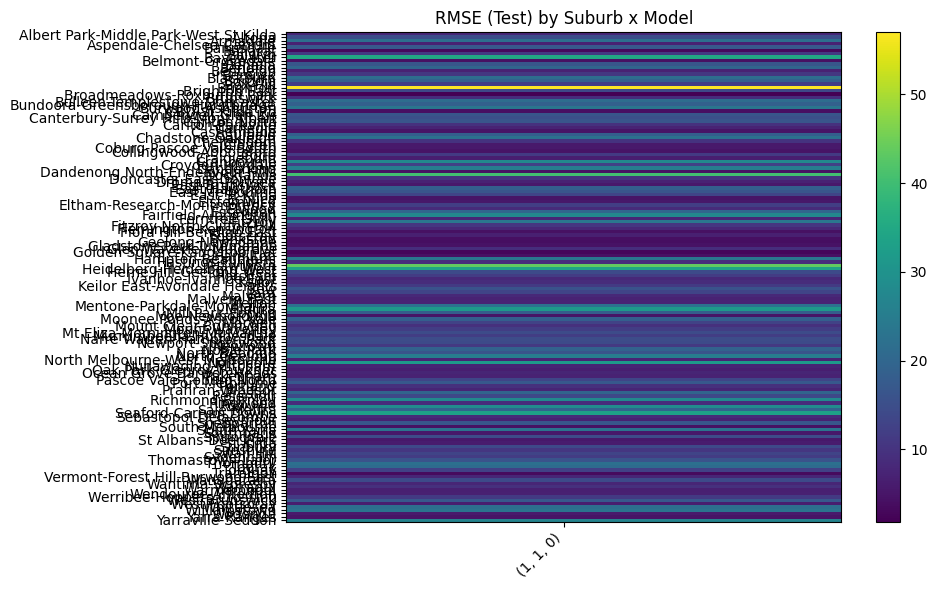

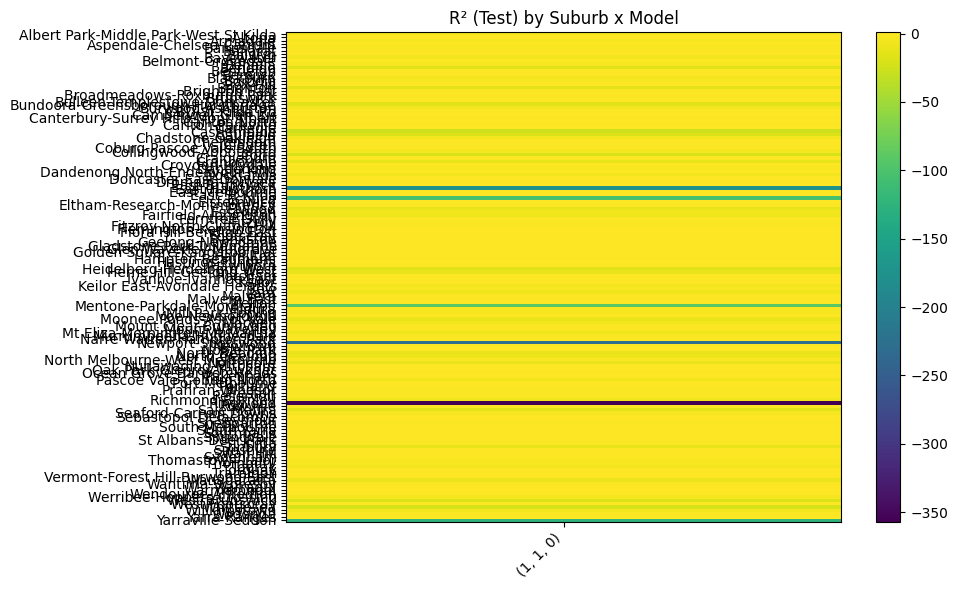

In [94]:
# ===============================
# EVALUATION MATRIX & SUMMARIES
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def build_eval_matrices(metrics_df):
    """
    Given the tall metrics_df (one row per suburb x model),
    return wide matrices for each metric and a 'best model per suburb' table.
    """
    if metrics_df is None or metrics_df.empty:
        print("metrics_df is empty.")
        return {}, pd.DataFrame()

    # Ensure model label exists
    if "model" not in metrics_df.columns:
        metrics_df = metrics_df.copy()
        metrics_df["model"] = metrics_df["Order"].astype(str)

    metric_names = ["RMSE_Test", "MAE_Test", "sMAPE_%", "WAPE_%", "R2_Test"]
    pivots = {}
    for m in metric_names:
        if m in metrics_df.columns:
            piv = (metrics_df
                   .pivot_table(index="Suburb", columns="model", values=m, aggfunc="mean")
                   .sort_index())
            pivots[m] = piv

    # Best model per suburb by RMSE (lower is better)
    if "RMSE_Test" in pivots:
        best_by_rmse = pivots["RMSE_Test"].idxmin(axis=1).to_frame("best_model_by_RMSE")
    else:
        best_by_rmse = pd.DataFrame(index=metrics_df["Suburb"].unique(),
                                    data={"best_model_by_RMSE": np.nan})

    return pivots, best_by_rmse

def print_portfolio_summaries(metrics_df):
    """
    Portfolio-level summaries across all suburbs/models: mean/median of key metrics.
    """
    if metrics_df is None or metrics_df.empty:
        print("metrics_df is empty.")
        return

    keep = ["MAE_Test","RMSE_Test","sMAPE_%","WAPE_%","R2_Test","AIC"]
    available = [c for c in keep if c in metrics_df.columns]
    summ = metrics_df[available].describe(percentiles=[0.25,0.5,0.75]).T
    print("\n=== Portfolio summary (all suburbs & models) ===")
    print(summ.round(3))

def choose_best_per_suburb(metrics_df, criterion="RMSE_Test"):
    """
    Return one row per suburb: the model (p,d,q) with the best (lowest) criterion.
    """
    if metrics_df is None or metrics_df.empty:
        return pd.DataFrame()
    if criterion not in metrics_df.columns:
        raise KeyError(f"{criterion} not in metrics_df columns")

    metrics_df = metrics_df.copy()
    metrics_df["model"] = metrics_df["Order"].astype(str)
    # lower is better for RMSE/MAE/sMAPE/WAPE; higher is better for R2
    ascending = True if criterion in ["RMSE_Test","MAE_Test","sMAPE_%","WAPE_%","AIC"] else False
    best = (metrics_df
            .sort_values(["Suburb", criterion], ascending=[True, ascending])
            .groupby("Suburb", as_index=False)
            .first()[["Suburb","Order","model",criterion,"AIC"]])
    return best

def plot_metric_heatmap(pivot_df, title="Metric heatmap", figsize=(10,6)):
    """
    Simple matplotlib heatmap for a wide pivot (Suburb x model).
    NaNs are shown as blanks.
    """
    if pivot_df is None or pivot_df.empty:
        print("Nothing to plot.")
        return

    Z = pivot_df.values.astype(float)
    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(Z, aspect='auto', interpolation='nearest')
    ax.set_xticks(np.arange(len(pivot_df.columns)))
    ax.set_yticks(np.arange(len(pivot_df.index)))
    ax.set_xticklabels(pivot_df.columns, rotation=45, ha='right')
    ax.set_yticklabels(pivot_df.index)
    ax.set_title(title)
    fig.colorbar(im, ax=ax)
    plt.tight_layout()
    plt.show()

# ===============================
# HOW TO RUN (after your metrics_df)
# ===============================
# metrics_df, r2_wide_df = run_arima4_by_suburb_noseason(...)

pivots, best_by_rmse = build_eval_matrices(metrics_df)
print_portfolio_summaries(metrics_df)

print("\n=== Best model per suburb by RMSE ===")
print(best_by_rmse.head(20))

# Plot heatmaps (pick any pivot):
if "RMSE_Test" in pivots:
    plot_metric_heatmap(pivots["RMSE_Test"], title="RMSE (Test) by Suburb x Model")
if "sMAPE_%" in pivots:
    plot_metric_heatmap(pivots["sMAPE_%"], title="sMAPE% (Test) by Suburb x Model")
if "R2_Test" in pivots:
    plot_metric_heatmap(pivots["R2_Test"], title="R² (Test) by Suburb x Model")



In [88]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def compare_plot_suburb_test(
    merged_df,
    suburb,
    split_date="2024-09-01",
    exog_cols=("ERP_quarterly", "Income_quarterly_med"),
    order=(1,1,0),
    figsize=(10,5),
    ci_alpha=0.2
):
    """
    Fit SARIMAX(endog=Median, exog=exog_cols) on TRAIN (< split_date),
    forecast TEST (>= split_date), return comparison DF and plot
    test actual vs test forecast with 95% CI.

    Returns: comparison DataFrame with columns:
        ['Suburb','date','Actual','Predicted','Error','AbsError','PctError']
    """

    # ---- slice suburb & prep quarterly freq ----
    g = merged_df.loc[merged_df["Suburb"] == suburb,
                      ["date","Median"] + list(exog_cols)].copy()
    if g.empty:
        print(f"No rows for suburb: {suburb}")
        return pd.DataFrame()

    g["date"] = pd.to_datetime(g["date"])
    g = g.set_index("date").asfreq("3MS").sort_index()

    # endog/exog
    missing = [c for c in exog_cols if c not in g.columns]
    if missing:
        print(f"Missing exog columns for {suburb}: {missing}")
        return pd.DataFrame()

    y = g["Median"].ffill().bfill()
    X = g[list(exog_cols)].ffill().bfill()

    # ---- split ----
    split_date = pd.Timestamp(split_date)
    y_train, y_test = y.loc[y.index < split_date],  y.loc[y.index >= split_date]
    X_train, X_test = X.loc[X.index < split_date],  X.loc[X.index >= split_date]

    if len(y_test) == 0:
        print(f"No test rows for {suburb} on/after {split_date.date()}.")
        return pd.DataFrame()

    # ---- fit & forecast ----
    mdl = sm.tsa.SARIMAX(
        endog=y_train, exog=X_train,
        order=order, seasonal_order=(0,0,0,0),
        trend="c", enforce_stationarity=False, enforce_invertibility=False
    )
    fit = mdl.fit(method="lbfgs", disp=False, maxiter=1000)

    fc = fit.get_forecast(steps=len(y_test), exog=X_test)
    y_pred = pd.Series(fc.predicted_mean.values, index=y_test.index)
    ci = fc.conf_int(alpha=0.05)  # 95% CI
    ci.index = y_test.index

    # ---- comparison table ----
    cmp = pd.DataFrame({
        "Suburb": suburb,
        "date": y_test.index,
        "Actual": y_test.values,
        "Predicted": y_pred.values
    })
    cmp["Error"]    = cmp["Predicted"] - cmp["Actual"]
    cmp["AbsError"] = cmp["Error"].abs()
    cmp["PctError"] = np.where(cmp["Actual"] != 0, cmp["Error"] / cmp["Actual"], np.nan)

    # quick metrics
    mae  = mean_absolute_error(cmp["Actual"], cmp["Predicted"])
    rmse = mean_squared_error(cmp["Actual"], cmp["Predicted"], squared=False)
    r2   = r2_score(cmp["Actual"], cmp["Predicted"]) if len(cmp) > 1 else np.nan
    print(f"{suburb} — Test MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.3f}")

    # ---- plot test actual vs forecast ----
    plt.figure(figsize=figsize)
    plt.plot(y_test.index, y_test.values, label="Test (actual)", lw=1.8)
    plt.plot(y_pred.index, y_pred.values, label="Forecast", lw=2, linestyle="--")
    plt.fill_between(y_pred.index, ci.iloc[:,0], ci.iloc[:,1], alpha=ci_alpha, label="95% CI")
    plt.title(f"{suburb} — ARIMA{order} | Test actual vs forecast")
    plt.xlabel("Quarter")
    plt.ylabel("Median rent")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # also print the table so you can eyeball errors
    with pd.option_context("display.max_rows", None, "display.width", 120):
        print("\nTest window comparison (first 20 rows):")
        print(cmp.head(20).round(2).to_string(index=False))

    return cmp



In [95]:
compare_plot_suburb_test

<function __main__.compare_plot_suburb_test(merged_df, suburb, split_date='2024-09-01', exog_cols=('ERP_quarterly', 'Income_quarterly_med'), order=(1, 1, 0), figsize=(10, 5), ci_alpha=0.2)>

In [97]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def compare_plot_suburb_test(
    merged_df,
    suburb,
    split_date="2024-09-01",
    exog_cols=("ERP_quarterly", "Income_quarterly_med"),
    order=(1,1,0),
    figsize=(10,5),
    ci_alpha=0.2
):
    """
    Fit SARIMAX(endog=Median, exog=exog_cols) on TRAIN (< split_date),
    forecast TEST (>= split_date), return comparison DF and plot
    test actual vs test forecast with 95% CI.

    Returns: comparison DataFrame with columns:
        ['Suburb','date','Actual','Predicted','Error','AbsError','PctError']
    """

    # ---- slice suburb & prep quarterly freq ----
    g = merged_df.loc[merged_df["Suburb"] == suburb,
                      ["date","Median"] + list(exog_cols)].copy()
    if g.empty:
        print(f"No rows for suburb: {suburb}")
        return pd.DataFrame()

    g["date"] = pd.to_datetime(g["date"])
    g = g.set_index("date").asfreq("3MS").sort_index()

    # endog/exog
    missing = [c for c in exog_cols if c not in g.columns]
    if missing:
        print(f"Missing exog columns for {suburb}: {missing}")
        return pd.DataFrame()

    y = g["Median"].ffill().bfill()
    X = g[list(exog_cols)].ffill().bfill()

    # ---- split ----
    split_date = pd.Timestamp(split_date)
    y_train, y_test = y.loc[y.index < split_date],  y.loc[y.index >= split_date]
    X_train, X_test = X.loc[X.index < split_date],  X.loc[X.index >= split_date]

    if len(y_test) == 0:
        print(f"No test rows for {suburb} on/after {split_date.date()}.")
        return pd.DataFrame()

    # ---- fit & forecast ----
    mdl = sm.tsa.SARIMAX(
        endog=y_train, exog=X_train,
        order=order, seasonal_order=(0,0,0,0),
        trend="c", enforce_stationarity=False, enforce_invertibility=False
    )
    fit = mdl.fit(method="lbfgs", disp=False, maxiter=1000)

    fc = fit.get_forecast(steps=len(y_test), exog=X_test)
    y_pred = pd.Series(fc.predicted_mean.values, index=y_test.index)
    ci = fc.conf_int(alpha=0.05)  # 95% CI
    ci.index = y_test.index

    # ---- comparison table ----
    cmp = pd.DataFrame({
        "Suburb": suburb,
        "date": y_test.index,
        "Actual": y_test.values,
        "Predicted": y_pred.values
    })
    cmp["Error"]    = cmp["Predicted"] - cmp["Actual"]
    cmp["AbsError"] = cmp["Error"].abs()
    cmp["PctError"] = np.where(cmp["Actual"] != 0, cmp["Error"] / cmp["Actual"], np.nan)

    # quick metrics (version-agnostic RMSE)
    mae  = mean_absolute_error(cmp["Actual"], cmp["Predicted"])
    mse  = mean_squared_error(cmp["Actual"], cmp["Predicted"])
    rmse = float(np.sqrt(mse))
    r2   = r2_score(cmp["Actual"], cmp["Predicted"]) if len(cmp) > 1 else np.nan
    print(f"{suburb} — Test MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.3f}")

    # ---- plot test actual vs forecast ----
    plt.figure(figsize=figsize)
    plt.plot(y_test.index, y_test.values, label="Test (actual)", lw=1.8)
    plt.plot(y_pred.index, y_pred.values, label="Forecast", lw=2, linestyle="--")
    plt.fill_between(y_pred.index, ci.iloc[:,0], ci.iloc[:,1], alpha=ci_alpha, label="95% CI")
    plt.title(f"{suburb} — ARIMA{order} | Test actual vs forecast")
    plt.xlabel("Quarter")
    plt.ylabel("Median rent")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # also print the table so you can eyeball errors
    with pd.option_context("display.max_rows", None, "display.width", 120):
        print("\nTest window comparison (first 20 rows):")
        print(cmp.head(20).round(2).to_string(index=False))

    return cmp


Brunswick — Test MAE: 8.78 | RMSE: 9.08 | R²: -1.122


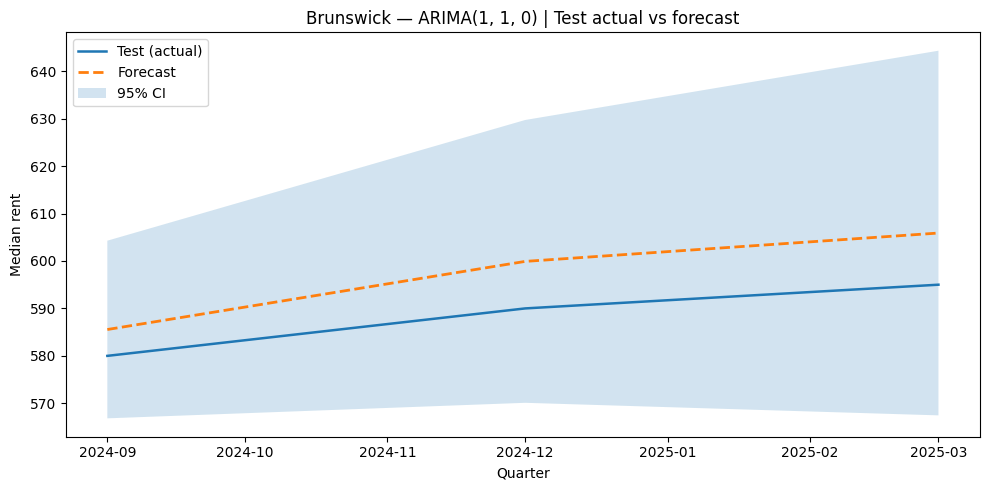


Test window comparison (first 20 rows):
   Suburb       date  Actual  Predicted  Error  AbsError  PctError
Brunswick 2024-09-01     580     585.55   5.55      5.55      0.01
Brunswick 2024-12-01     590     599.91   9.91      9.91      0.02
Brunswick 2025-03-01     595     605.89  10.89     10.89      0.02


In [98]:
# Pick a suburb and (optionally) the best order you found for it
sub = "Brunswick"            # <- change to any suburb name
best_order = (1,1,0)         # <- or pick from your metrics_df

cmp_df = compare_plot_suburb_test(
    merged_df,
    suburb=sub,
    split_date="2024-09-01",
    exog_cols=("ERP_quarterly","Income_quarterly_med"),
    order=best_order
)

# Save the table if you want
# cmp_df.to_csv(f"cmp_{sub.replace(' ','_')}.csv", index=False)



We can see that the best model is when (1, 1, 0)   -10.270683

In [99]:
df = pd.read_csv("/Users/rajaa/Desktop/Applied Data Science MAST30034/project-2-group-real-estate-industry-project-7-2025/Raja-workspace/notebooks/landing/raw/cleaned/10. data for modeling suburb growth 2/merged_df_complete.csv")

In [100]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# ===============================
# Helpers
# ===============================
def _qfreq_and_fill(df, exog_cols):
    """Set to quarterly freq (3MS) and forward/back-fill endog+exog."""
    df = df.set_index("date").asfreq("3MS").sort_index()
    # fill
    df["Median"] = df["Median"].ffill().bfill()
    for c in exog_cols:
        if c in df.columns:
            df[c] = df[c].ffill().bfill()
    return df

def _metrics(y_true, y_pred):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2   = r2_score(y_true, y_pred) if len(y_true) > 1 else np.nan
    return mae, rmse, r2

# ===============================
# Main runner (per suburb, two models)
# ===============================
def evaluate_suburbs_arima_sarimax(
    merged_df,
    split_date="2024-09-01",
    exog_cols=("ERP_quarterly", "Income_quarterly_med"),
    use_exog=True,
    order_sarimax=(1,1,1),
    seasonal_order=(0,1,1,4),  # set to (0,0,0,0) to disable seasonality
    arima_baseline_order=(4,1,3),
    log_target=True,
    min_train=12,
    min_test=2,
):
    """
    For each suburb:
      - Prepare quarterly series, fill gaps.
      - Split into train/test by date.
      - Fit SARIMAX with optional exog + seasonality (Model='SARIMAX')  [if use_exog=True or seasonal_order != (0,0,0,0)]
      - Fit plain ARIMA(p,d,q) baseline (Model='ARIMA_413')              [no exog, no seasonal]
      - Evaluate both on test; return metrics and predictions (wide).

    Returns:
      metrics_df: one row per suburb x model with MAE/RMSE/R2 and bookkeeping
      preds_df  : long table of test predictions (Suburb, date, Actual, Predicted, Model)
    """
    split_date = pd.Timestamp(split_date)

    all_metrics = []
    all_preds   = []

    for suburb, g in merged_df.groupby("Suburb"):
        g = g[["date", "Median"] + list(exog_cols)]
        if g.empty:
            continue

        g = g.copy()
        g["date"] = pd.to_datetime(g["date"])
        g = _qfreq_and_fill(g, exog_cols)

        # train/test split
        y      = g["Median"]
        X_full = g[list(exog_cols)] if use_exog else None

        y_tr, y_te = y.loc[y.index < split_date],  y.loc[y.index >= split_date]
        if X_full is not None:
            X_tr, X_te = X_full.loc[y_tr.index], X_full.loc[y_te.index]
        else:
            X_tr = X_te = None

        if len(y_tr) < min_train or len(y_te) < min_test:
            continue

        # ---------- LOG transform if requested ----------
        if log_target:
            y_tr_fit = np.log(y_tr.clip(lower=1.0))
            y_te_true = y_te.values  # keep original-level truth
        else:
            y_tr_fit = y_tr
            y_te_true = y_te.values

        # ========== Model 1: SARIMAX (exog + optional seasonality) ==========
        # Only run if exog requested OR seasonality enabled
        run_sarimax = (use_exog and X_tr is not None) or (seasonal_order != (0,0,0,0))
        if run_sarimax:
            try:
                mdl = sm.tsa.SARIMAX(
                    endog=y_tr_fit,
                    exog=X_tr if (use_exog and X_tr is not None) else None,
                    order=order_sarimax,
                    seasonal_order=seasonal_order,
                    trend="c",
                    enforce_stationarity=False,
                    enforce_invertibility=False,
                )
                fit = mdl.fit(method="lbfgs", disp=False, maxiter=1000)

                fc  = fit.get_forecast(steps=len(y_te), exog=X_te if (use_exog and X_te is not None) else None)
                y_pred_tr = pd.Series(fc.predicted_mean.values, index=y_te.index)

                # back-transform if needed
                y_pred = np.exp(y_pred_tr.values) if log_target else y_pred_tr.values
                mae, rmse, r2 = _metrics(y_te_true, y_pred)

                all_metrics.append({
                    "Suburb": suburb,
                    "Model": f"SARIMAX{order_sarimax}_x_{seasonal_order}" + ("+exog" if use_exog else ""),
                    "MAE_Test": mae, "RMSE_Test": rmse, "R2_Test": r2,
                    "Train_n": len(y_tr), "Test_n": len(y_te)
                })
                all_preds.append(pd.DataFrame({
                    "Suburb": suburb,
                    "date": y_te.index,
                    "Actual": y_te_true,
                    "Predicted": y_pred,
                    "Model": f"SARIMAX{order_sarimax}_x_{seasonal_order}" + ("+exog" if use_exog else ""),
                }))
            except Exception as e:
                all_metrics.append({
                    "Suburb": suburb,
                    "Model": f"SARIMAX{order_sarimax}_x_{seasonal_order} (+exog={use_exog})",
                    "MAE_Test": np.nan, "RMSE_Test": np.nan, "R2_Test": np.nan,
                    "Train_n": len(y_tr), "Test_n": len(y_te),
                    "Error": str(e)
                })

        # ========== Model 2: Plain ARIMA baseline (like your snippet) ==========
        try:
            # Fit on same *scale* as SARIMAX fit (log or level)
            y_tr_base = y_tr_fit if log_target else y_tr
            arima = ARIMA(y_tr_base, order=arima_baseline_order)  # no exog, no seasonal
            ar_fit = arima.fit()

            y_pred_base = ar_fit.forecast(steps=len(y_te))
            # back-transform if needed
            y_pred_base = np.exp(y_pred_base.values) if log_target else y_pred_base.values

            mae_b, rmse_b, r2_b = _metrics(y_te_true, y_pred_base)

            all_metrics.append({
                "Suburb": suburb,
                "Model": f"ARIMA{arima_baseline_order}",
                "MAE_Test": mae_b, "RMSE_Test": rmse_b, "R2_Test": r2_b,
                "Train_n": len(y_tr), "Test_n": len(y_te)
            })
            all_preds.append(pd.DataFrame({
                "Suburb": suburb,
                "date": y_te.index,
                "Actual": y_te_true,
                "Predicted": y_pred_base,
                "Model": f"ARIMA{arima_baseline_order}",
            }))
        except Exception as e:
            all_metrics.append({
                "Suburb": suburb,
                "Model": f"ARIMA{arima_baseline_order}",
                "MAE_Test": np.nan, "RMSE_Test": np.nan, "R2_Test": np.nan,
                "Train_n": len(y_tr), "Test_n": len(y_te),
                "Error": str(e)
            })

    metrics_df = pd.DataFrame(all_metrics)
    preds_df   = pd.concat(all_preds, ignore_index=True) if all_preds else pd.DataFrame()
    return metrics_df, preds_df


In [101]:
def _metrics(y_true, y_pred):
    # ensure numeric arrays
    y_true = pd.to_numeric(pd.Series(y_true), errors="coerce")
    y_pred = pd.to_numeric(pd.Series(y_pred), errors="coerce")

    mae = mean_absolute_error(y_true, y_pred)

    # Version-agnostic RMSE: compute MSE then sqrt (no 'squared' kwarg)
    mse = mean_squared_error(y_true, y_pred)
    rmse = float(np.sqrt(mse))

    r2  = r2_score(y_true, y_pred) if len(y_true) > 1 else np.nan
    return mae, rmse, r2


In [102]:
metrics_df, preds_df = evaluate_suburbs_arima_sarimax(
    merged_df,
    split_date="2024-09-01",
    exog_cols=("ERP_quarterly", "Income_quarterly_med"),
    use_exog=True,
    order_sarimax=(1,1,1),
    seasonal_order=(0,1,1,4),
    arima_baseline_order=(4,1,3),
    log_target=True,
    min_train=12,
    min_test=2,
)
print(metrics_df.head())


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA paramet

                                  Suburb  \
0  Albert Park-Middle Park-West St Kilda   
1  Albert Park-Middle Park-West St Kilda   
2                                 Altona   
3                                 Altona   
4                               Armadale   

                                  Model    MAE_Test   RMSE_Test      R2_Test  \
0  SARIMAX(1, 1, 1)_x_(0, 1, 1, 4)+exog  201.495859  276.822229 -7036.499188   
1                        ARIMA(4, 1, 3)    9.438295   10.562146    -9.245207   
2  SARIMAX(1, 1, 1)_x_(0, 1, 1, 4)+exog   62.859864   73.368356     0.000000   
3                        ARIMA(4, 1, 3)   10.730702   12.769572     0.000000   
4  SARIMAX(1, 1, 1)_x_(0, 1, 1, 4)+exog   55.407060   59.621741   -24.594214   

   Train_n  Test_n Error  
0       30       3   NaN  
1       30       3   NaN  
2       30       3   NaN  
3       30       3   NaN  
4       30       3   NaN  


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible st

In [103]:
import numpy as np
import pandas as pd

def summarize_metrics(metrics_df):
    """
    Print overall & per-model averages for MAE/RMSE/R2.
    Includes:
      - simple mean & median
      - weighted mean by Test_n (if present)
      - share of positive R2
    Returns two DataFrames: overall_summary, by_model_summary
    """
    if metrics_df is None or metrics_df.empty:
        print("metrics_df is empty.")
        return pd.DataFrame(), pd.DataFrame()

    df = metrics_df.copy()
    keep = ["Model", "MAE_Test", "RMSE_Test", "R2_Test", "Train_n", "Test_n"]
    df = df[[c for c in keep if c in df.columns]].copy()

    # Helper: weighted mean by Test_n
    def wmean(series, weights):
        s = series.astype(float)
        w = weights.astype(float).clip(lower=0)
        num = np.nansum(s * w)
        den = np.nansum(w[~s.isna()])  # use weights where s is not NaN
        return np.nan if den == 0 else num / den

    # -------- Overall summary --------
    overall = {}
    for m in ["MAE_Test", "RMSE_Test", "R2_Test"]:
        if m in df.columns:
            overall[f"{m}_mean"]   = df[m].mean()
            overall[f"{m}_median"] = df[m].median()
            if "Test_n" in df.columns:
                overall[f"{m}_wmean"] = wmean(df[m], df["Test_n"])
    if "R2_Test" in df.columns:
        overall["R2_pos_share"] = (df["R2_Test"] > 0).mean()

    overall_summary = pd.DataFrame([overall]).T.rename(columns={0: "value"}).round(4)

    print("\n=== Overall metrics (all suburbs & models) ===")
    print(overall_summary)

    # -------- By-model summary --------
    by_model_rows = []
    for model, g in df.groupby("Model"):
        row = {"Model": model, "n_rows": len(g)}
        for m in ["MAE_Test", "RMSE_Test", "R2_Test"]:
            if m in g.columns:
                row[f"{m}_mean"]   = g[m].mean()
                row[f"{m}_median"] = g[m].median()
                if "Test_n" in g.columns:
                    row[f"{m}_wmean"] = wmean(g[m], g["Test_n"])
        if "R2_Test" in g.columns:
            row["R2_pos_share"] = (g["R2_Test"] > 0).mean()
        by_model_rows.append(row)

    by_model_summary = (
        pd.DataFrame(by_model_rows)
        .sort_values(["RMSE_Test_wmean","RMSE_Test_mean","MAE_Test_wmean","MAE_Test_mean"], ascending=True)
        .reset_index(drop=True)
        .round(4)
    )

    print("\n=== By-model metrics (averages across suburbs) ===")
    print(by_model_summary)

    return overall_summary, by_model_summary



In [104]:

overall_summary, by_model_summary = summarize_metrics(metrics_df)


=== Overall metrics (all suburbs & models) ===
                    value
MAE_Test_mean     23.9718
MAE_Test_median   16.5532
MAE_Test_wmean    23.9718
RMSE_Test_mean    27.3708
RMSE_Test_median  17.8149
RMSE_Test_wmean   27.3708
R2_Test_mean     -93.6108
R2_Test_median    -3.2047
R2_Test_wmean    -93.6108
R2_pos_share       0.1404

=== By-model metrics (averages across suburbs) ===
                                          Model  n_rows  MAE_Test_mean  \
0                                ARIMA(4, 1, 3)     146        16.5225   
1          SARIMAX(1, 1, 1)_x_(0, 1, 1, 4)+exog     145        31.4726   
2  SARIMAX(1, 1, 1)_x_(0, 1, 1, 4) (+exog=True)       1            NaN   

   MAE_Test_median  MAE_Test_wmean  RMSE_Test_mean  RMSE_Test_median  \
0          12.5704         16.5225         18.2676           14.2924   
1          19.9443         31.4726         36.5367           21.5484   
2              NaN             NaN             NaN               NaN   

   RMSE_Test_wmean  R2_Test_

## use ARIMA model to retrain all of the dataset and then use that model to predict the income until 2030 because currently our model is split to train n test ##

In [114]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

# =============== Helpers ===============

def _to_quarterly_income(df, date_col="date", value_col="Income_quarterly_med"):
    """
    Per-suburb quarterly alignment (3MS), ffill/bfill, mild outlier clipping.
    Returns the same columns as input + normalized date; rows outside observed span are not added.
    """
    need = ["Suburb", date_col, value_col]
    missing = [c for c in need if c not in df.columns]
    if missing:
        raise KeyError(f"merged_df is missing columns: {missing}")

    out = df.copy()
    out[date_col] = pd.to_datetime(out[date_col], errors="coerce")
    out = out.sort_values(["Suburb", date_col]).reset_index(drop=True)

    def _qfill(g):
        g = g.set_index(date_col).asfreq("3MS").sort_index()
        g[value_col] = g[value_col].ffill().bfill()
        # mild clipping to avoid numeric explosions
        q01, q99 = g[value_col].quantile([0.01, 0.99])
        g[value_col] = g[value_col].clip(lower=q01, upper=q99)
        return g.reset_index()

    out = (out.groupby("Suburb", group_keys=False)
               .apply(_qfill)
               .sort_values(["Suburb", date_col])
               .reset_index(drop=True))
    return out

def _choose_d_adf(y, max_d=2, alpha=0.05):
    """
    Increment d until ADF rejects unit root or max_d is reached.
    """
    series = y.copy()
    for d in range(0, max_d+1):
        try:
            _, pval, *_ = adfuller(series.dropna(), autolag="AIC")
        except Exception:
            pval = 1.0
        if pval < alpha:
            return d
        series = series.diff()
    return max_d

def _aicc(llf, k, n):
    # AICc = 2k - 2lnL + (2k(k+1))/(n-k-1)
    if n - k - 1 <= 0:
        return np.inf
    return 2*k - 2*llf + (2*k*(k+1))/(n - k - 1)

def _fit_best_arima(y, p_grid=(0,1,2,3), q_grid=(0,1,2,3), auto_d=True, use_log=True):
    """
    Pick (p,d,q) by AICc on full history.
    Returns dict with keys: order, model (fit result), yhat_in_sample (level scale), aicc.
    """
    y = pd.Series(y).astype(float)
    n = len(y.dropna())
    if n < 8:  # too short; skip
        return None

    d = _choose_d_adf(y, max_d=2, alpha=0.05) if auto_d else 1

    best = {"aicc": np.inf, "order": None, "res": None}
    for p in p_grid:
        for q in q_grid:
            try:
                y_fit = np.log(y.clip(lower=1.0)) if use_log else y
                res = ARIMA(endog=y_fit, order=(p, d, q)).fit()
                k = res.params.size
                aicc_val = _aicc(res.llf, k, len(y_fit.dropna()))
                if aicc_val < best["aicc"]:
                    best = {"aicc": aicc_val, "order": (p,d,q), "res": res}
            except Exception:
                continue

    if best["res"] is None:
        return None

    # In-sample fitted values back to level scale
    yhat_tr = pd.Series(best["res"].fittedvalues, index=y.index)
    yhat = np.exp(yhat_tr) if use_log else yhat_tr

    return {"order": best["order"], "res": best["res"], "yhat_in_sample": yhat, "aicc": best["aicc"]}

def _forecast_until(res, start_date, end_date, use_log=True, steps_freq="3MS"):
    """
    Forecast from the *next* quarter after start_date up to end_date (inclusive),
    returning index at 3MS (quarter starts).
    """
    # build the forecast index (quarterly 3MS)
    f_idx = pd.date_range(pd.Timestamp(start_date) + pd.offsets.QuarterBegin(startingMonth=3),
                          pd.Timestamp(end_date), freq=steps_freq)
    if len(f_idx) == 0:
        return pd.Series([], dtype=float)

    # number of steps to forecast
    steps = len(f_idx)

    # forecast
    fc = res.forecast(steps=steps)
    yhat = np.exp(fc) if use_log else fc
    return pd.Series(yhat.values, index=f_idx)


In [116]:
merged_df

Suburb        date  Median        Lat  \
0     Albert Park-Middle Park-West St Kilda  2017-03-01     520 -37.853484   
1     Albert Park-Middle Park-West St Kilda  2017-06-01     532 -37.853484   
2     Albert Park-Middle Park-West St Kilda  2017-09-01     530 -37.853484   
3     Albert Park-Middle Park-West St Kilda  2017-12-01     530 -37.853484   
4     Albert Park-Middle Park-West St Kilda  2018-03-01     550 -37.853484   
...                                     ...         ...     ...        ...   
4813                      Yarraville-Seddon  2024-03-01     570 -37.812809   
4814                      Yarraville-Seddon  2024-06-01     590 -37.812809   
4815                      Yarraville-Seddon  2024-09-01     595 -37.812809   
4816                      Yarraville-Seddon  2024-12-01     600 -37.812809   
4817                      Yarraville-Seddon  2025-03-01     600 -37.812809   

             Lng  SA2_CODE21   SA2_NAME21   t  ERP_quarterly  \
0     144.970161   206051128  Albert Park   0   16536.854795   
1     144.970161   206051128  Albert Park   1   16594.323288   
2     144.970161   206051128  Albert Park   2   16651.791781   
3     144.970161   206051128  Albert Park   3   16708.635616   
4     144.970161   206051128  Albert Park   4   16785.060274   
...          ...         ...          ...  ..            ...   
4813  144.884163   213031352   Yarraville  28   16280.121038   
4814  144.884163   213031352   Yarraville  29   16337.039963   
4815  144.884163   213031352   Yarraville  30   16393.958888   
4816  144.884163   213031352   Yarraville  31   16450.259129   
4817  144.884163   213031352   Yarraville  32   16469.438332   

      Income_quarterly_med  
0             62618.808219  
1             62804.068493  
2             62989.328767  
3             63172.575342  
4             63400.523288  
...                    ...  
4813          84590.600000  
4814          84590.600000  
4815          84590.600000  
4816          84590.600000  
4817          84590.600000  

[4818 rows x 10 columns]

In [115]:

# =============== Main runner ===============

def forecast_income_to_2030(
    merged_df,
    value_col="Income_quarterly_med",
    end_date="2030-12-01",
    p_grid=(0,1,2,3),
    q_grid=(0,1,2,3),
    auto_d=True,
    use_log=True,
    attach_sa2=True
):
    """
    - Rebuild quarterly income panel per suburb
    - Fit ARIMA on the full history per suburb
    - Forecast quarterly to 'end_date'
    Returns: income_forecast_df with columns:
      ['Suburb','date','Predicted_Income', 'Order','AICc', 'SA2_CODE21'(opt)]
    """
    # 1) Quarterly tidy panel for income only
    qdf = _to_quarterly_income(merged_df, date_col="date", value_col=value_col)

    # stash SA2_CODE21 (if present)
    sa2_map = None
    if attach_sa2 and "SA2_CODE21" in merged_df.columns:
        sa2_map = (merged_df[["Suburb", "SA2_CODE21"]]
                   .dropna()
                   .drop_duplicates("Suburb"))

    # 2) Fit + forecast per suburb
    out_rows = []
    for suburb, g in qdf.groupby("Suburb"):
        g = g.sort_values("date")
        y = g[value_col].astype(float)
        last_obs = g["date"].max()

        # fit best ARIMA on full y
        best = _fit_best_arima(y, p_grid=p_grid, q_grid=q_grid, auto_d=auto_d, use_log=use_log)
        if best is None:
            continue

        # forecast from *after* last_obs until end_date
        fcast = _forecast_until(best["res"], start_date=last_obs, end_date=end_date, use_log=use_log)
        if fcast.empty:
            continue

        tmp = pd.DataFrame({
            "Suburb": suburb,
            "date": fcast.index,
            "Predicted_Income": fcast.values,
            "Order": [best["order"]]*len(fcast),
            "AICc": [best["aicc"]]*len(fcast)
        })
        out_rows.append(tmp)

    if not out_rows:
        return pd.DataFrame()

    income_forecast_df = pd.concat(out_rows, ignore_index=True)

    # attach SA2 if available
    if sa2_map is not None:
        income_forecast_df = income_forecast_df.merge(sa2_map, on="Suburb", how="left")

    # nice ordering
    cols = ["Suburb", "SA2_CODE21", "date", "Predicted_Income", "Order", "AICc"] \
           if "SA2_CODE21" in income_forecast_df.columns else \
           ["Suburb", "date", "Predicted_Income", "Order", "AICc"]
    income_forecast_df = income_forecast_df[cols].sort_values(["Suburb", "date"]).reset_index(drop=True)
    return income_forecast_df

# =============== Run it ===============

# Train on ALL history and forecast income to 2030-12-01 (quarterly)
income_forecast_df = forecast_income_to_2030(
    merged_df,
    value_col="Income_quarterly_med",
    end_date="2030-12-01",
    p_grid=(0,1,2,3),   # you can widen these, but keep small for speed
    q_grid=(0,1,2,3),
    auto_d=True,        # pick differencing per suburb via ADF
    use_log=True,       # log stabilizes levels; back-transformed in forecast
    attach_sa2=True
)

# Inspect and save
print(income_forecast_df.head(10))
income_forecast_df.to_csv("income_forecast_to_2030.csv", index=False)


                                  Suburb  SA2_CODE21       date  \
0  Albert Park-Middle Park-West St Kilda   206051128 2025-06-01   
1  Albert Park-Middle Park-West St Kilda   206051128 2025-09-01   
2  Albert Park-Middle Park-West St Kilda   206051128 2025-12-01   
3  Albert Park-Middle Park-West St Kilda   206051128 2026-03-01   
4  Albert Park-Middle Park-West St Kilda   206051128 2026-06-01   
5  Albert Park-Middle Park-West St Kilda   206051128 2026-09-01   
6  Albert Park-Middle Park-West St Kilda   206051128 2026-12-01   
7  Albert Park-Middle Park-West St Kilda   206051128 2027-03-01   
8  Albert Park-Middle Park-West St Kilda   206051128 2027-06-01   
9  Albert Park-Middle Park-West St Kilda   206051128 2027-09-01   

   Predicted_Income      Order        AICc  
0      77160.307738  (0, 2, 1) -264.601657  
1      77160.910720  (0, 2, 1) -264.601657  
2      77161.513706  (0, 2, 1) -264.601657  
3      77162.116696  (0, 2, 1) -264.601657  
4      77162.719692  (0, 2, 1) -264.6

## NEW MODEL ##

In [109]:
# =========================
# 0) Imports & setup
# =========================
import numpy as np
import pandas as pd
import warnings

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.tsa.statespace.structural import UnobservedComponents
from statsmodels.tools.sm_exceptions import ConvergenceWarning, ValueWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=ValueWarning)

# -------------------------
# Helper: robust RMSE/R2
# -------------------------
def _metrics(y_true, y_pred):
    y_true = pd.to_numeric(pd.Series(y_true), errors="coerce")
    y_pred = pd.to_numeric(pd.Series(y_pred), errors="coerce")
    # drop any rows where either is NaN
    m = ~(y_true.isna() | y_pred.isna())
    if m.sum() == 0:
        return np.nan, np.nan, np.nan
    y_true = y_true[m]
    y_pred = y_pred[m]
    mae  = mean_absolute_error(y_true, y_pred)
    mse  = mean_squared_error(y_true, y_pred)   # no squared=False (compat-safe)
    rmse = float(np.sqrt(mse))
    r2   = r2_score(y_true, y_pred) if len(y_true) > 1 else np.nan
    return mae, rmse, r2

# -------------------------
# 1) Data prep (quarterly)
# -------------------------
def to_quarterly_panel(df, exog_cols=("ERP_quarterly","Income_quarterly_med")):
    """
    Ensure per-suburb quarterly index (3MS) and ffill/bfill Median + exogs.
    Returns a clean DataFrame sorted by Suburb/date.
    """
    need = ["Suburb", "date", "Median"] + list(exog_cols)
    missing = [c for c in need if c not in df.columns]
    if missing:
        raise KeyError(f"merged_df is missing columns: {missing}")

    out = df.copy()
    out["date"] = pd.to_datetime(out["date"], errors="coerce")
    out = out.sort_values(["Suburb","date"]).reset_index(drop=True)

    def _qfill(g):
        g = g.set_index("date").asfreq("3MS").sort_index()
        cols = ["Median"] + list(exog_cols)
        for c in cols:
            g[c] = g[c].ffill().bfill()
        return g.reset_index()

    out = (out.groupby("Suburb", group_keys=False)
               .apply(_qfill)
               .sort_values(["Suburb","date"])
               .reset_index(drop=True))
    return out

# -------------------------
# 2) UCM per suburb (with exog)
# -------------------------
def evaluate_ucm_per_suburb(merged_df,
                            split_date="2024-09-01",
                            exog_cols=("ERP_quarterly","Income_quarterly_med"),
                            seasonal_periods=4,
                            min_train=8,
                            min_test=2):
    """
    Fits Unobserved Components model per suburb:
      level='local linear trend', seasonal=seasonal_periods, exog=X
    Evaluates on test window >= split_date.
    Returns: metrics_df (one row per suburb), preds_df (long).
    """
    df = to_quarterly_panel(merged_df, exog_cols)
    split_date = pd.Timestamp(split_date)

    metrics, preds = [], []
    for suburb, g in df.groupby("Suburb"):
        g = g[["date","Median"] + list(exog_cols)].copy()
        y = g.set_index("date")["Median"]
        X = g.set_index("date")[list(exog_cols)]

        y_tr, y_te = y[y.index < split_date], y[y.index >= split_date]
        X_tr, X_te = X.loc[y_tr.index], X.loc[y_te.index]

        if len(y_tr) < min_train or len(y_te) < min_test:
            continue

        try:
            mdl = UnobservedComponents(
                endog=y_tr,
                level="local linear trend",
                seasonal=seasonal_periods,
                exog=X_tr
            )
            res = mdl.fit(disp=False)
            fc  = res.get_forecast(steps=len(y_te), exog=X_te)
            yhat = fc.predicted_mean

            mae, rmse, r2 = _metrics(y_te, yhat)
            metrics.append({
                "Suburb": suburb, "Model": f"UCM_LLtrend+Season{seasonal_periods}+exog",
                "MAE_Test": mae, "RMSE_Test": rmse, "R2_Test": r2,
                "Train_n": len(y_tr), "Test_n": len(y_te)
            })
            preds.append(pd.DataFrame({
                "Suburb": suburb, "date": y_te.index, "Actual": y_te.values,
                "Predicted": yhat.values, "Model": "UCM"
            }))
        except Exception as e:
            metrics.append({
                "Suburb": suburb, "Model": f"UCM_LLtrend+Season{seasonal_periods}+exog",
                "MAE_Test": np.nan, "RMSE_Test": np.nan, "R2_Test": np.nan,
                "Train_n": len(y_tr), "Test_n": len(y_te), "Error": str(e)
            })

    metrics_df = pd.DataFrame(metrics)
    preds_df   = pd.concat(preds, ignore_index=True) if preds else pd.DataFrame()
    return metrics_df, preds_df

# -------------------------
# 3) SARIMAX per suburb (your baseline)
# -------------------------
def evaluate_sarimax_per_suburb(merged_df,
                                split_date="2024-09-01",
                                exog_cols=("ERP_quarterly","Income_quarterly_med"),
                                order=(1,1,1),
                                seasonal_order=(0,1,1,4),
                                min_train=12,
                                min_test=2):
    """
    Fits SARIMAX(endog=Median, exog=X, order, seasonal_order) per suburb.
    Evaluates on test window >= split_date.
    Returns: metrics_df, preds_df.
    """
    df = to_quarterly_panel(merged_df, exog_cols)
    split_date = pd.Timestamp(split_date)

    metrics, preds = [], []
    for suburb, g in df.groupby("Suburb"):
        g = g[["date","Median"] + list(exog_cols)].copy()
        g = g.set_index("date").sort_index().ffill().bfill()

        y = g["Median"]
        X = g[list(exog_cols)]

        y_tr, y_te = y[y.index < split_date], y[y.index >= split_date]
        X_tr, X_te = X.loc[y_tr.index], X.loc[y_te.index]

        if len(y_tr) < min_train or len(y_te) < min_test:
            continue

        try:
            mdl = sm.tsa.SARIMAX(
                endog=y_tr, exog=X_tr,
                order=order, seasonal_order=seasonal_order,
                trend="c",
                enforce_stationarity=False, enforce_invertibility=False
            )
            res = mdl.fit(method="lbfgs", disp=False, maxiter=1000)
            fc  = res.get_forecast(steps=len(y_te), exog=X_te)
            yhat = pd.Series(fc.predicted_mean.values, index=y_te.index)

            mae, rmse, r2 = _metrics(y_te, yhat)
            metrics.append({
                "Suburb": suburb, "Model": f"SARIMAX{order}_x_{seasonal_order}+exog",
                "MAE_Test": mae, "RMSE_Test": rmse, "R2_Test": r2,
                "Train_n": len(y_tr), "Test_n": len(y_te)
            })
            preds.append(pd.DataFrame({
                "Suburb": suburb, "date": y_te.index, "Actual": y_te.values,
                "Predicted": yhat.values, "Model": "SARIMAX"
            }))
        except Exception as e:
            metrics.append({
                "Suburb": suburb, "Model": f"SARIMAX{order}_x_{seasonal_order}+exog",
                "MAE_Test": np.nan, "RMSE_Test": np.nan, "R2_Test": np.nan,
                "Train_n": len(y_tr), "Test_n": len(y_te), "Error": str(e)
            })

    metrics_df = pd.DataFrame(metrics)
    preds_df   = pd.concat(preds, ignore_index=True) if preds else pd.DataFrame()
    return metrics_df, preds_df

# -------------------------
# 4) Run both + compare
# -------------------------
SPLIT = "2024-09-01"
EXOGS = ("ERP_quarterly","Income_quarterly_med")

ucm_metrics, ucm_preds = evaluate_ucm_per_suburb(
    merged_df,
    split_date=SPLIT,
    exog_cols=EXOGS,
    seasonal_periods=4,   # quarterly seasonality
    min_train=8,
    min_test=2
)

sar_metrics, sar_preds = evaluate_sarimax_per_suburb(
    merged_df,
    split_date=SPLIT,
    exog_cols=EXOGS,
    order=(1,1,1),             # your typical baseline
    seasonal_order=(0,1,1,4),  # quarterly seasonality
    min_train=12,
    min_test=2
)

print("UCM rows:", len(ucm_metrics), "| SARIMAX rows:", len(sar_metrics))

# -------------------------
# 5) Side-by-side table
# -------------------------
def compare_tables(ucm_df, sar_df):
    keep = ["Suburb","MAE_Test","RMSE_Test","R2_Test","Train_n","Test_n","Model"]
    u = ucm_df[keep].copy()
    s = sar_df[keep].copy()

    u = u.rename(columns={
        "MAE_Test":"UCM_MAE","RMSE_Test":"UCM_RMSE","R2_Test":"UCM_R2","Model":"UCM_Model"
    })
    s = s.rename(columns={
        "MAE_Test":"SAR_MAE","RMSE_Test":"SAR_RMSE","R2_Test":"SAR_R2","Model":"SAR_Model"
    })

    comp = pd.merge(u.drop(columns=["UCM_Model"]),
                    s.drop(columns=["SAR_Model"]),
                    on=["Suburb","Train_n","Test_n"],
                    how="outer")

    # who wins (lower is better for MAE/RMSE; higher for R²)
    comp["RMSE_winner"] = np.where(comp["UCM_RMSE"] < comp["SAR_RMSE"], "UCM",
                               np.where(comp["SAR_RMSE"] < comp["UCM_RMSE"], "SARIMAX", "Tie"))
    comp["MAE_winner"]  = np.where(comp["UCM_MAE"]  < comp["SAR_MAE"],  "UCM",
                               np.where(comp["SAR_MAE"]  < comp["UCM_MAE"],  "SARIMAX", "Tie"))
    comp["R2_winner"]   = np.where(comp["UCM_R2"]   > comp["SAR_R2"],   "UCM",
                               np.where(comp["SAR_R2"]   > comp["UCM_R2"],   "SARIMAX", "Tie"))
    return comp

comparison_df = compare_tables(ucm_metrics, sar_metrics)

# -------------------------
# 6) Portfolio summaries
# -------------------------
def portfolio_summary(df, prefix):
    sub = df[[f"{prefix}_MAE", f"{prefix}_RMSE", f"{prefix}_R2"]].dropna(how="all")
    if sub.empty:
        return {"count": 0}
    return {
        "count": len(sub),
        "MAE_mean": sub[f"{prefix}_MAE"].mean(),
        "RMSE_mean": sub[f"{prefix}_RMSE"].mean(),
        "R2_mean": sub[f"{prefix}_R2"].mean()
    }

ucm_summ = portfolio_summary(comparison_df.rename(columns={"UCM_MAE":"UCM_MAE","UCM_RMSE":"UCM_RMSE","UCM_R2":"UCM_R2"}), "UCM")
sar_summ = portfolio_summary(comparison_df.rename(columns={"SAR_MAE":"SAR_MAE","SAR_RMSE":"SAR_RMSE","SAR_R2":"SAR_R2"}), "SAR")

print("\n=== Portfolio (means over suburbs with results) ===")
print("UCM :", ucm_summ)
print("SAR :", sar_summ)

print("\n=== Head-to-head (first 10) ===")
display(comparison_df.sort_values(["SAR_RMSE","UCM_RMSE"]).head(10))

# Optional: save
# ucm_metrics.to_csv("ucm_metrics.csv", index=False)
# sar_metrics.to_csv("sarimax_metrics.csv", index=False)
# comparison_df.to_csv("ucm_vs_sarimax.csv", index=False)


UCM rows: 146 | SARIMAX rows: 146

=== Portfolio (means over suburbs with results) ===
UCM : {'count': 146, 'MAE_mean': np.float64(16.926441461392915), 'RMSE_mean': np.float64(18.920763262772855), 'R2_mean': np.float64(-33.18928268188232)}
SAR : {'count': 146, 'MAE_mean': np.float64(21.780071968049604), 'RMSE_mean': np.float64(24.42496894783652), 'R2_mean': np.float64(-53.033162614649)}

=== Head-to-head (first 10) ===


Suburb    UCM_MAE   UCM_RMSE    UCM_R2  Train_n  \
66                          Hamilton   2.387155   2.581953  0.600011       30   
59           Flora Hill-Bendigo East   4.146818   4.251938  0.728815       30   
131                        Traralgon   5.801394   6.893277 -1.138277       30   
84                    Moe-Newborough   7.118487   8.390126 -0.055913       30   
41   Dandenong North-Endeavour Hills  14.271308  16.466133 -3.067003       30   
12                           Berwick   5.779056   5.987731  0.660341       30   
67                 Hampton-Beaumaris  12.138190  15.509384 -0.170199       30   
5                           Ballarat   7.316019   7.696066 -9.661298       30   
62                  Geelong-Newcombe   3.343296   3.922511  0.000000       30   
99                Nunawading-Mitcham   4.513081   5.924131  0.774387       30   

     Test_n   SAR_MAE  SAR_RMSE    SAR_R2 RMSE_winner MAE_winner R2_winner  
66        3  1.245169  1.546792  0.856446     SARIMAX    SARIMAX   SARIMAX  
59        3  2.569760  2.746474  0.886853     SARIMAX    SARIMAX   SARIMAX  
131       3  4.003892  4.308092  0.164816     SARIMAX    SARIMAX   SARIMAX  
84        3  3.589152  4.333755  0.718278     SARIMAX    SARIMAX   SARIMAX  
41        3  4.220157  4.401074  0.709458     SARIMAX    SARIMAX   SARIMAX  
12        3  4.174789  4.579911  0.801284     SARIMAX    SARIMAX   SARIMAX  
67        3  3.920302  5.039018  0.876473     SARIMAX    SARIMAX   SARIMAX  
5         3  5.237654  5.605638 -4.656172     SARIMAX    SARIMAX   SARIMAX  
62        3  4.977741  5.703469  0.000000         UCM        UCM       Tie  
99        3  6.190414  6.984104  0.686429         UCM        UCM       UCM

In [ ]:
# =========================================================
# SARIMAX baseline vs SARIMAX-new (auto-tuned) — FULL CODE
# =========================================================

import numpy as np
import pandas as pd
import warnings
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.tools.sm_exceptions import ConvergenceWarning, ValueWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=ValueWarning)

# ---------------------------------------------------------
# Robust metrics (version-agnostic RMSE)
# ---------------------------------------------------------
def _metrics(y_true, y_pred):
    y_true = pd.to_numeric(pd.Series(y_true), errors="coerce")
    y_pred = pd.to_numeric(pd.Series(y_pred), errors="coerce")
    m = ~(y_true.isna() | y_pred.isna())
    if m.sum() == 0:
        return np.nan, np.nan, np.nan
    y_true = y_true[m]
    y_pred = y_pred[m]
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)  # compute MSE then sqrt
    rmse = float(np.sqrt(mse))
    r2 = r2_score(y_true, y_pred) if len(y_true) > 1 else np.nan
    return mae, rmse, r2

# ---------------------------------------------------------
# Step 0 — Quarterly panel builder with exog + interactions
# ---------------------------------------------------------
def to_quarterly_panel(df, exog_cols=("ERP_quarterly","Income_quarterly_med")):
    """
    Ensures per-suburb quarterly index (3MS), sorted, with ffill/bfill.
    Adds interaction term ERP*Income to help capture non-linear exog effects.
    """
    need = ["Suburb", "date", "Median"] + list(exog_cols)
    missing = [c for c in need if c not in df.columns]
    if missing:
        raise KeyError(f"merged_df is missing columns: {missing}")

    out = df.copy()
    out["date"] = pd.to_datetime(out["date"], errors="coerce")
    out = out.sort_values(["Suburb","date"]).reset_index(drop=True)

    def _qfill(g):
        g = g.set_index("date").asfreq("3MS").sort_index()
        cols = ["Median"] + list(exog_cols)
        for c in cols:
            g[c] = g[c].ffill().bfill()
        # add interaction after fills (so it's not NaN)
        if set(exog_cols).issuperset({"ERP_quarterly","Income_quarterly_med"}):
            g["ERPxIncome"] = g["ERP_quarterly"] * g["Income_quarterly_med"]
        else:
            # if custom exogs used, still create a generic interaction of the first two where possible
            ex = list(exog_cols)
            if len(ex) >= 2:
                g["ERPxIncome"] = g[ex[0]] * g[ex[1]]
            else:
                g["ERPxIncome"] = np.nan
        return g.reset_index()

    out = (out.groupby("Suburb", group_keys=False)
               .apply(_qfill)
               .sort_values(["Suburb","date"])
               .reset_index(drop=True))
    return out

# ---------------------------------------------------------
# Step 1 — Baseline SARIMAX (your current approach)
# ---------------------------------------------------------
def evaluate_sarimax_baseline(
    merged_df,
    split_date="2024-09-01",
    exog_cols=("ERP_quarterly","Income_quarterly_med","ERPxIncome"),
    order=(1,1,1),
    seasonal_order=(0,1,1,4),
    min_train=12, min_test=2,
    use_log=False
):
    """
    Per-suburb SARIMAX baseline.
    If use_log=True, fit on log(y) and back-transform predictions.
    """
    df = to_quarterly_panel(merged_df, exog_cols=tuple(c for c in exog_cols if c != "ERPxIncome"))
    # ensure interaction exists
    if "ERPxIncome" not in df.columns and set(exog_cols).issuperset({"ERP_quarterly","Income_quarterly_med"}):
        df["ERPxIncome"] = df["ERP_quarterly"] * df["Income_quarterly_med"]

    split_date = pd.Timestamp(split_date)
    metrics, preds = [], []

    for suburb, g in df.groupby("Suburb"):
        g = g[["date","Median"] + list(exog_cols)].copy()
        g = g.set_index("date").sort_index().ffill().bfill()

        y = g["Median"]
        X = g[list(exog_cols)]

        y_tr, y_te = y[y.index < split_date], y[y.index >= split_date]
        X_tr, X_te = X.loc[y_tr.index], X.loc[y_te.index]

        if len(y_tr) < min_train or len(y_te) < min_test:
            continue

        try:
            if use_log:
                y_tr_fit = np.log(y_tr.clip(lower=1.0))
            else:
                y_tr_fit = y_tr

            mdl = sm.tsa.SARIMAX(
                endog=y_tr_fit, exog=X_tr,
                order=order, seasonal_order=seasonal_order,
                trend="c",
                enforce_stationarity=False, enforce_invertibility=False
            )
            res = mdl.fit(method="lbfgs", disp=False, maxiter=1000)
            fc = res.get_forecast(steps=len(y_te), exog=X_te)
            yhat_tr = pd.Series(fc.predicted_mean.values, index=y_te.index)

            # back-transform if needed
            yhat = np.exp(yhat_tr.values) if use_log else yhat_tr.values
            mae, rmse, r2 = _metrics(y_te, yhat)

            metrics.append({
                "Suburb": suburb, "Model": "SARIMAX",  # baseline label
                "MAE_Test": mae, "RMSE_Test": rmse, "R2_Test": r2,
                "Train_n": len(y_tr), "Test_n": len(y_te),
                "AIC": res.aic
            })
            preds.append(pd.DataFrame({
                "Suburb": suburb, "date": y_te.index, "Actual": y_te.values,
                "Predicted": yhat, "Model": "SARIMAX"
            }))
        except Exception as e:
            metrics.append({
                "Suburb": suburb, "Model": "SARIMAX",
                "MAE_Test": np.nan, "RMSE_Test": np.nan, "R2_Test": np.nan,
                "Train_n": len(y_tr), "Test_n": len(y_te),
                "AIC": np.inf, "Error": str(e)
            })

    metrics_df = pd.DataFrame(metrics)
    preds_df = pd.concat(preds, ignore_index=True) if preds else pd.DataFrame()
    return metrics_df, preds_df

# ---------------------------------------------------------
# Step 2 — SARIMAX-new: per-suburb order search + log + interaction
# ---------------------------------------------------------
def sarimax_new_best_for_suburb(y_tr, X_tr, seasonal_candidates):
    """
    Try a small grid of ARIMA (p,d,q) & seasonal orders; return the best by AIC.
    """
    p_grid = [0,1,2]
    d_grid = [0,1]
    q_grid = [0,1,2]

    best = {"aic": np.inf, "order": None, "sorder": None, "res": None}
    for p in p_grid:
        for d in d_grid:
            for q in q_grid:
                for sorder in seasonal_candidates:
                    try:
                        mdl = sm.tsa.SARIMAX(
                            endog=y_tr, exog=X_tr,
                            order=(p,d,q),
                            seasonal_order=sorder,
                            trend="c",
                            enforce_stationarity=False,
                            enforce_invertibility=False,
                        )
                        res = mdl.fit(method="lbfgs", disp=False, maxiter=1000)
                        if res.aic < best["aic"]:
                            best.update({"aic": res.aic, "order": (p,d,q), "sorder": sorder, "res": res})
                    except Exception:
                        continue
    return best

def evaluate_sarimax_new(
    merged_df,
    split_date="2024-09-01",
    exog_cols=("ERP_quarterly","Income_quarterly_med","ERPxIncome"),
    seasonal_candidates=((0,1,1,4), (0,0,1,4), (1,0,1,4)),
    min_train=12, min_test=2,
    use_log=True
):
    """
    SARIMAX-new:
      - log transform (default)
      - exog + interaction term
      - per-suburb grid over (p,d,q) in {0..2}x{0,1}x{0..2}
      - seasonal candidates: (0,1,1,4), (0,0,1,4), (1,0,1,4)
      - choose by AIC on train, then forecast test
    """
    df = to_quarterly_panel(merged_df, exog_cols=tuple(c for c in exog_cols if c != "ERPxIncome"))
    if "ERPxIncome" not in df.columns and set(exog_cols).issuperset({"ERP_quarterly","Income_quarterly_med"}):
        df["ERPxIncome"] = df["ERP_quarterly"] * df["Income_quarterly_med"]

    split_date = pd.Timestamp(split_date)
    metrics, preds = [], []

    for suburb, g in df.groupby("Suburb"):
        g = g[["date","Median"] + list(exog_cols)].copy()
        g = g.set_index("date").sort_index().ffill().bfill()

        y = g["Median"]
        X = g[list(exog_cols)]

        y_tr, y_te = y[y.index < split_date], y[y.index >= split_date]
        X_tr, X_te = X.loc[y_tr.index], X.loc[y_te.index]

        if len(y_tr) < min_train or len(y_te) < min_test:
            continue

        try:
            # log-scale training if requested
            y_tr_fit = np.log(y_tr.clip(lower=1.0)) if use_log else y_tr

            # choose best orders
            best = sarimax_new_best_for_suburb(y_tr_fit, X_tr, seasonal_candidates)
            if best["res"] is None:
                raise RuntimeError("No converged SARIMAX-new model for this suburb.")

            # forecast on test
            fc = best["res"].get_forecast(steps=len(y_te), exog=X_te)
            yhat_tr = pd.Series(fc.predicted_mean.values, index=y_te.index)
            yhat = np.exp(yhat_tr.values) if use_log else yhat_tr.values

            mae, rmse, r2 = _metrics(y_te, yhat)
            metrics.append({
                "Suburb": suburb,
                "Model": "SARIMAX-new",  # <----- label requested
                "MAE_Test": mae, "RMSE_Test": rmse, "R2_Test": r2,
                "Train_n": len(y_tr), "Test_n": len(y_te),
                "AIC": best["aic"],
                "Order": best["order"],
                "Seasonal": best["sorder"]
            })
            preds.append(pd.DataFrame({
                "Suburb": suburb, "date": y_te.index, "Actual": y_te.values,
                "Predicted": yhat, "Model": "SARIMAX-new"
            }))
        except Exception as e:
            metrics.append({
                "Suburb": suburb,
                "Model": "SARIMAX-new",
                "MAE_Test": np.nan, "RMSE_Test": np.nan, "R2_Test": np.nan,
                "Train_n": len(y_tr), "Test_n": len(y_te),
                "AIC": np.inf,
                "Error": str(e)
            })

    metrics_df = pd.DataFrame(metrics)
    preds_df = pd.concat(preds, ignore_index=True) if preds else pd.DataFrame()
    return metrics_df, preds_df

# ---------------------------------------------------------
# Step 3 — Run both models
# ---------------------------------------------------------
SPLIT = "2024-09-01"
EXOGS = ("ERP_quarterly","Income_quarterly_med","ERPxIncome")

# Baseline (no log). If you want to compare "baseline-log" too, set use_log=True.
base_metrics, base_preds = evaluate_sarimax_baseline(
    merged_df,
    split_date=SPLIT,
    exog_cols=EXOGS,
    order=(1,1,1),
    seasonal_order=(0,1,1,4),
    min_train=12, min_test=2,
    use_log=False
)

# SARIMAX-new (log + interaction + auto orders)
new_metrics, new_preds = evaluate_sarimax_new(
    merged_df,
    split_date=SPLIT,
    exog_cols=EXOGS,
    seasonal_candidates=((0,1,1,4), (0,0,1,4), (1,0,1,4)),
    min_train=12, min_test=2,
    use_log=True
)

print("Rows — baseline:", len(base_metrics), "| SARIMAX-new:", len(new_metrics))

# ---------------------------------------------------------
# Step 4 — Side-by-side comparison
# ---------------------------------------------------------
def compare_models_table(base_df, new_df):
    keep = ["Suburb","MAE_Test","RMSE_Test","R2_Test","Train_n","Test_n","Model"]
    b = base_df[keep].rename(columns={
        "MAE_Test":"BASE_MAE","RMSE_Test":"BASE_RMSE","R2_Test":"BASE_R2"
    })
    n = new_df[keep + ["Model"]].rename(columns={
        "MAE_Test":"NEW_MAE","RMSE_Test":"NEW_RMSE","R2_Test":"NEW_R2"
    })
    comp = pd.merge(b.drop(columns=["Model"]), n.drop(columns=["Model"]),
                    on=["Suburb","Train_n","Test_n"], how="outer")

    comp["RMSE_winner"] = np.where(comp["NEW_RMSE"] < comp["BASE_RMSE"], "SARIMAX-new",
                               np.where(comp["BASE_RMSE"] < comp["NEW_RMSE"], "SARIMAX", "Tie"))
    comp["MAE_winner"]  = np.where(comp["NEW_MAE"]  < comp["BASE_MAE"],  "SARIMAX-new",
                               np.where(comp["BASE_MAE"]  < comp["NEW_MAE"],  "SARIMAX", "Tie"))
    comp["R2_winner"]   = np.where(comp["NEW_R2"]   > comp["BASE_R2"],   "SARIMAX-new",
                               np.where(comp["BASE_R2"]   > comp["NEW_R2"],   "SARIMAX", "Tie"))
    return comp

comparison_df = compare_models_table(base_metrics, new_metrics)

# Portfolio means over suburbs with results
def portfolio_means(df, prefix):
    sub = df[[f"{prefix}_MAE", f"{prefix}_RMSE", f"{prefix}_R2"]].dropna(how="all")
    if sub.empty:
        return {"count": 0}
    return {
        "count": len(sub),
        "MAE_mean": float(sub[f"{prefix}_MAE"].mean()),
        "RMSE_mean": float(sub[f"{prefix}_RMSE"].mean()),
        "R2_mean": float(sub[f"{prefix}_R2"].mean())
    }

base_summ = portfolio_means(comparison_df.rename(columns={"BASE_MAE":"BASE_MAE","BASE_RMSE":"BASE_RMSE","BASE_R2":"BASE_R2"}), "BASE")
new_summ  = portfolio_means(comparison_df.rename(columns={"NEW_MAE":"NEW_MAE","NEW_RMSE":"NEW_RMSE","NEW_R2":"NEW_R2"}), "NEW")

print("\n=== Portfolio means (across suburbs with results) ===")
print("Baseline (SARIMAX):   ", base_summ)
print("SARIMAX-new (auto):   ", new_summ)

print("\n=== Head-to-head (first 15 suburbs) ===")
display(comparison_df.sort_values(["BASE_RMSE","NEW_RMSE"]).head(15))

# Optional: persist
# base_metrics.to_csv("sarimax_baseline_metrics.csv", index=False)
# new_metrics.to_csv("sarimax_new_metrics.csv", index=False)
# comparison_df.to_csv("sarimax_vs_sarimax_new.csv", index=False)


Rows — baseline: 146 | SARIMAX-new: 146

=== Portfolio means (across suburbs with results) ===
Baseline (SARIMAX):    {'count': 146, 'MAE_mean': 67.2798302610621, 'RMSE_mean': 92.71275037407803, 'R2_mean': -2420.5727136915757}
SARIMAX-new (auto):    {'count': 146, 'MAE_mean': 19.403652470965405, 'RMSE_mean': 20.924683176948708, 'R2_mean': -25.65677546944998}

=== Head-to-head (first 15 suburbs) ===


Suburb  BASE_MAE  BASE_RMSE   BASE_R2  \
131                           Traralgon  2.110816   3.339645  0.498105   
5                              Ballarat  4.315906   4.376419 -2.447548   
102                            Pakenham  3.597406   4.633615  0.677944   
99                   Nunawading-Mitcham  3.599793   4.676441  0.859413   
84                       Moe-Newborough  4.190261   4.943734  0.633392   
97       North Melbourne-West Melbourne  5.470614   5.842477 -0.409224   
9                               Benalla  5.228179   6.032580  0.496110   
62                     Geelong-Newcombe  5.630509   6.296002  0.000000   
130                             Torquay  5.294555   6.973076  0.000000   
41      Dandenong North-Endeavour Hills  7.071486   7.151431  0.232855   
106                     Prahran-Windsor  7.178446   7.218144 -1.344572   
75         Keilor East-Avondale Heights  6.563904   7.227135 -1.350416   
50                          Elsternwick  6.535893   7.304463  0.542670   
108                           Reservoir  5.262139   8.012205  0.277802   
21   Bundoora-Greensborough-Hurstbridge  6.899360   8.251492 -2.063920   

     Train_n  Test_n    NEW_MAE   NEW_RMSE     NEW_R2  RMSE_winner  \
131       30       3   3.812278   4.012802   0.275384      SARIMAX   
5         30       3   7.752064   8.597342 -12.304571      SARIMAX   
102       30       3   2.164562   2.824530   0.880330  SARIMAX-new   
99        30       3  32.641110  40.098757  -9.336566      SARIMAX   
84        30       3   7.824184   9.604688  -0.383751      SARIMAX   
97        30       3  10.099929  11.392601  -4.358359      SARIMAX   
9         30       3  24.898664  26.048693  -8.395092      SARIMAX   
62        30       3   5.939559   6.311460   0.000000      SARIMAX   
130       30       3  17.667460  18.514271   0.000000      SARIMAX   
41        30       3   8.928657   9.585939  -0.378353      SARIMAX   
106       30       3  38.006190  40.718414 -73.609515      SARIMAX   
75        30       3  15.982621  16.115234 -10.686534      SARIMAX   
50        30       3  14.773946  18.068649  -1.798367      SARIMAX   
108       30       3  15.600142  17.166159  -2.315117      SARIMAX   
21        30       3  34.492485  35.204457 -54.770919      SARIMAX   

      MAE_winner    R2_winner  
131      SARIMAX      SARIMAX  
5        SARIMAX      SARIMAX  
102  SARIMAX-new  SARIMAX-new  
99       SARIMAX      SARIMAX  
84       SARIMAX      SARIMAX  
97       SARIMAX      SARIMAX  
9        SARIMAX      SARIMAX  
62       SARIMAX          Tie  
130      SARIMAX          Tie  
41       SARIMAX      SARIMAX  
106      SARIMAX      SARIMAX  
75       SARIMAX      SARIMAX  
50       SARIMAX      SARIMAX  
108      SARIMAX      SARIMAX  
21       SARIMAX      SARIMAX

In [112]:
# =========================================================
# SARIMAX baseline vs ARMA-new (auto-tuned, with exog) — FULL CODE (fixed)
# =========================================================

import numpy as np
import pandas as pd
import warnings
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.sm_exceptions import ConvergenceWarning, ValueWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=ValueWarning)

# ---------------------------------------------------------
# Robust metrics (version-agnostic RMSE)
# ---------------------------------------------------------
def _metrics(y_true, y_pred):
    y_true = pd.to_numeric(pd.Series(y_true), errors="coerce")
    y_pred = pd.to_numeric(pd.Series(y_pred), errors="coerce")
    m = ~(y_true.isna() | y_pred.isna())
    if m.sum() == 0:
        return np.nan, np.nan, np.nan
    y_true = y_true[m]
    y_pred = y_pred[m]
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)        # compute MSE then sqrt (no 'squared' kwarg)
    rmse = float(np.sqrt(mse))
    r2 = r2_score(y_true, y_pred) if len(y_true) > 1 else np.nan
    return mae, rmse, r2

# ---------------------------------------------------------
# Step 0 — Quarterly panel builder with exog + interactions
# ---------------------------------------------------------
def to_quarterly_panel(df, exog_cols=("ERP_quarterly","Income_quarterly_med")):
    """
    Ensures per-suburb quarterly index (3MS), sorted, with ffill/bfill.
    Adds interaction term ERP*Income to help capture non-linear exog effects.
    """
    need = ["Suburb", "date", "Median"] + list(exog_cols)
    missing = [c for c in need if c not in df.columns]
    if missing:
        raise KeyError(f"merged_df is missing columns: {missing}")

    out = df.copy()
    out["date"] = pd.to_datetime(out["date"], errors="coerce")
    out = out.sort_values(["Suburb","date"]).reset_index(drop=True)

    def _qfill(g):
        g = g.set_index("date").asfreq("3MS").sort_index()
        cols = ["Median"] + list(exog_cols)
        for c in cols:
            g[c] = g[c].ffill().bfill()
        # Add interaction (or generic interaction of the first two exogs)
        if set(exog_cols).issuperset({"ERP_quarterly","Income_quarterly_med"}):
            g["ERPxIncome"] = g["ERP_quarterly"] * g["Income_quarterly_med"]
        else:
            ex = list(exog_cols)
            if len(ex) >= 2:
                g["ERPxIncome"] = g[ex[0]] * g[ex[1]]
            else:
                g["ERPxIncome"] = np.nan
        return g.reset_index()

    out = (out.groupby("Suburb", group_keys=False)
               .apply(_qfill)
               .sort_values(["Suburb","date"])
               .reset_index(drop=True))
    return out

# ---------------------------------------------------------
# Step 1 — Baseline SARIMAX (your current approach, unchanged)
# ---------------------------------------------------------
def evaluate_sarimax_baseline(
    merged_df,
    split_date="2024-09-01",
    exog_cols=("ERP_quarterly","Income_quarterly_med","ERPxIncome"),
    order=(1,1,1),
    seasonal_order=(0,1,1,4),
    min_train=12, min_test=2,
    use_log=False
):
    """
    Per-suburb SARIMAX baseline.
    If use_log=True, fit on log(y) and back-transform predictions.
    """
    df = to_quarterly_panel(merged_df, exog_cols=tuple(c for c in exog_cols if c != "ERPxIncome"))
    if "ERPxIncome" not in df.columns and set(exog_cols).issuperset({"ERP_quarterly","Income_quarterly_med"}):
        df["ERPxIncome"] = df["ERP_quarterly"] * df["Income_quarterly_med"]

    split_date = pd.Timestamp(split_date)
    metrics, preds = [], []

    for suburb, g in df.groupby("Suburb"):
        g = g[["date","Median"] + list(exog_cols)].copy()
        # FIX: use sort_index()
        g = g.set_index("date").sort_index().ffill().bfill()

        y = g["Median"]
        X = g[list(exog_cols)]

        y_tr, y_te = y[y.index < split_date], y[y.index >= split_date]
        X_tr, X_te = X.loc[y_tr.index], X.loc[y_te.index]

        if len(y_tr) < min_train or len(y_te) < min_test:
            continue

        try:
            y_tr_fit = np.log(y_tr.clip(lower=1.0)) if use_log else y_tr

            mdl = sm.tsa.SARIMAX(
                endog=y_tr_fit, exog=X_tr,
                order=order, seasonal_order=seasonal_order,
                trend="c", enforce_stationarity=False, enforce_invertibility=False
            )
            res = mdl.fit(method="lbfgs", disp=False, maxiter=1000)
            fc = res.get_forecast(steps=len(y_te), exog=X_te)
            yhat_tr = pd.Series(fc.predicted_mean.values, index=y_te.index)

            yhat = np.exp(yhat_tr.values) if use_log else yhat_tr.values
            mae, rmse, r2 = _metrics(y_te, yhat)

            metrics.append({
                "Suburb": suburb, "Model": "SARIMAX",
                "MAE_Test": mae, "RMSE_Test": rmse, "R2_Test": r2,
                "Train_n": len(y_tr), "Test_n": len(y_te),
                "AIC": res.aic
            })
            preds.append(pd.DataFrame({
                "Suburb": suburb, "date": y_te.index, "Actual": y_te.values,
                "Predicted": yhat, "Model": "SARIMAX"
            }))
        except Exception as e:
            metrics.append({
                "Suburb": suburb, "Model": "SARIMAX",
                "MAE_Test": np.nan, "RMSE_Test": np.nan, "R2_Test": np.nan,
                "Train_n": len(y_tr), "Test_n": len(y_te),
                "AIC": np.inf, "Error": str(e)
            })

    metrics_df = pd.DataFrame(metrics)
    preds_df = pd.concat(preds, ignore_index=True) if preds else pd.DataFrame()
    return metrics_df, preds_df

# ---------------------------------------------------------
# Step 2 — ARMA-new: per-suburb ARMA(p,0,q) + exog + log + interaction
# ---------------------------------------------------------
def arma_new_best_for_suburb(y_tr, X_tr, p_grid=(0,1,2,3), q_grid=(0,1,2,3)):
    """
    Try a small grid of ARMA(p,0,q) using ARIMA with d=0.
    Select by AIC.
    """
    best = {"aic": np.inf, "order": None, "res": None}
    for p in p_grid:
        for q in q_grid:
            try:
                mdl = ARIMA(endog=y_tr, exog=X_tr, order=(p,0,q))  # d=0 => ARMA
                res = mdl.fit()
                if np.isfinite(res.aic) and res.aic < best["aic"]:
                    best.update({"aic": res.aic, "order": (p,0,q), "res": res})
            except Exception:
                continue
    return best

def evaluate_arma_new(
    merged_df,
    split_date="2024-09-01",
    exog_cols=("ERP_quarterly","Income_quarterly_med","ERPxIncome"),
    p_grid=(0,1,2,3), q_grid=(0,1,2,3),
    min_train=12, min_test=2,
    use_log=True
):
    """
    ARMA-new:
      - ARMA(p,0,q) via ARIMA with d=0 (no seasonality)
      - log transform (default)
      - exog + interaction term
      - per-suburb grid over p,q and choose by AIC on train
    """
    df = to_quarterly_panel(merged_df, exog_cols=tuple(c for c in exog_cols if c != "ERPxIncome"))
    if "ERPxIncome" not in df.columns and set(exog_cols).issuperset({"ERP_quarterly","Income_quarterly_med"}):
        df["ERPxIncome"] = df["ERP_quarterly"] * df["Income_quarterly_med"]

    split_date = pd.Timestamp(split_date)
    metrics, preds = [], []

    for suburb, g in df.groupby("Suburb"):
        g = g[["date","Median"] + list(exog_cols)].copy()
        # FIX: use sort_index()
        g = g.set_index("date").sort_index().ffill().bfill()

        y = g["Median"]
        X = g[list(exog_cols)]

        y_tr, y_te = y[y.index < split_date], y[y.index >= split_date]
        X_tr, X_te = X.loc[y_tr.index], X.loc[y_te.index]

        if len(y_tr) < min_train or len(y_te) < min_test:
            continue

        try:
            y_tr_fit = np.log(y_tr.clip(lower=1.0)) if use_log else y_tr

            best = arma_new_best_for_suburb(y_tr_fit, X_tr, p_grid=p_grid, q_grid=q_grid)
            if best["res"] is None:
                raise RuntimeError("No converged ARMA-new model for this suburb.")

            fc = best["res"].forecast(steps=len(y_te), exog=X_te)  # ARIMA.forecast accepts exog
            yhat_tr = pd.Series(fc, index=y_te.index)

            yhat = np.exp(yhat_tr.values) if use_log else yhat_tr.values
            mae, rmse, r2 = _metrics(y_te, yhat)

            metrics.append({
                "Suburb": suburb,
                "Model": "ARMA-new",
                "MAE_Test": mae, "RMSE_Test": rmse, "R2_Test": r2,
                "Train_n": len(y_tr), "Test_n": len(y_te),
                "AIC": best["aic"],
                "Order": best["order"]
            })
            preds.append(pd.DataFrame({
                "Suburb": suburb, "date": y_te.index, "Actual": y_te.values,
                "Predicted": yhat, "Model": "ARMA-new"
            }))
        except Exception as e:
            metrics.append({
                "Suburb": suburb,
                "Model": "ARMA-new",
                "MAE_Test": np.nan, "RMSE_Test": np.nan, "R2_Test": np.nan,
                "Train_n": len(y_tr), "Test_n": len(y_te),
                "AIC": np.inf, "Error": str(e)
            })

    metrics_df = pd.DataFrame(metrics)
    preds_df = pd.concat(preds, ignore_index=True) if preds else pd.DataFrame()
    return metrics_df, preds_df

# ---------------------------------------------------------
# Step 3 — Run both models
# ---------------------------------------------------------
SPLIT = "2024-09-01"
EXOGS = ("ERP_quarterly","Income_quarterly_med","ERPxIncome")

# Baseline SARIMAX (no log) — unchanged
base_metrics, base_preds = evaluate_sarimax_baseline(
    merged_df,
    split_date=SPLIT,
    exog_cols=EXOGS,
    order=(1,1,1),
    seasonal_order=(0,1,1,4),
    min_train=12, min_test=2,
    use_log=False
)

# ARMA-new (log + interaction + auto p,q with exog)
arma_metrics, arma_preds = evaluate_arma_new(
    merged_df,
    split_date=SPLIT,
    exog_cols=EXOGS,
    p_grid=(0,1,2,3), q_grid=(0,1,2,3),
    min_train=12, min_test=2,
    use_log=True
)

print("Rows — baseline:", len(base_metrics), " | ARMA-new:", len(arma_metrics))

# ---------------------------------------------------------
# Step 4 — Side-by-side comparison
# ---------------------------------------------------------
def compare_models_table(base_df, new_df, new_label="ARMA-new"):
    keep = ["Suburb","MAE_Test","RMSE_Test","R2_Test","Train_n","Test_n","Model"]
    b = base_df[keep].rename(columns={
        "MAE_Test":"BASE_MAE","RMSE_Test":"BASE_RMSE","R2_Test":"BASE_R2"
    })
    n = new_df[keep + ["Model"]].rename(columns={
        "MAE_Test":"NEW_MAE","RMSE_Test":"NEW_RMSE","R2_Test":"NEW_R2"
    })
    comp = pd.merge(b.drop(columns=["Model"]), n.drop(columns=["Model"]),
                    on=["Suburb","Train_n","Test_n"], how="outer")

    comp["RMSE_winner"] = np.where(comp["NEW_RMSE"] < comp["BASE_RMSE"], new_label,
                               np.where(comp["BASE_RMSE"] < comp["NEW_RMSE"], "SARIMAX", "Tie"))
    comp["MAE_winner"]  = np.where(comp["NEW_MAE"]  < comp["BASE_MAE"],  new_label,
                               np.where(comp["BASE_MAE"]  < comp["NEW_MAE"],  "SARIMAX", "Tie"))
    comp["R2_winner"]   = np.where(comp["NEW_R2"]   > comp["BASE_R2"],   new_label,
                               np.where(comp["BASE_R2"]   > comp["NEW_R2"],   "SARIMAX", "Tie"))
    return comp

comparison_df = compare_models_table(base_metrics, arma_metrics, new_label="ARMA-new")

def portfolio_means(df, prefix):
    sub = df[[f"{prefix}_MAE", f"{prefix}_RMSE", f"{prefix}_R2"]].dropna(how="all")
    if sub.empty:
        return {"count": 0}
    return {
        "count": len(sub),
        "MAE_mean": float(sub[f"{prefix}_MAE"].mean()),
        "RMSE_mean": float(sub[f"{prefix}_RMSE"].mean()),
        "R2_mean": float(sub[f"{prefix}_R2"].mean())
    }

base_summ = portfolio_means(comparison_df.rename(columns={"BASE_MAE":"BASE_MAE","BASE_RMSE":"BASE_RMSE","BASE_R2":"BASE_R2"}), "BASE")
new_summ  = portfolio_means(comparison_df.rename(columns={"NEW_MAE":"NEW_MAE","NEW_RMSE":"NEW_RMSE","NEW_R2":"NEW_R2"}), "NEW")

print("\n=== Portfolio means (across suburbs with results) ===")
print("Baseline (SARIMAX):   ", base_summ)
print("ARMA-new (auto):      ", new_summ)

print("\n=== Head-to-head (first 15 suburbs) ===")
try:
    display(comparison_df.sort_values(["BASE_RMSE","NEW_RMSE"]).head(15))
except NameError:
    print(comparison_df.sort_values(["BASE_RMSE","NEW_RMSE"]).head(15).to_string(index=False))


Rows — baseline: 146  | ARMA-new: 146

=== Portfolio means (across suburbs with results) ===
Baseline (SARIMAX):    {'count': 146, 'MAE_mean': 67.2798302610621, 'RMSE_mean': 92.71275037407803, 'R2_mean': -2420.5727136915757}
ARMA-new (auto):       {'count': 146, 'MAE_mean': 26.27789352635148, 'RMSE_mean': 28.640906645262177, 'R2_mean': -79.1174255249944}

=== Head-to-head (first 15 suburbs) ===


Suburb  BASE_MAE  BASE_RMSE   BASE_R2  \
131                           Traralgon  2.110816   3.339645  0.498105   
5                              Ballarat  4.315906   4.376419 -2.447548   
102                            Pakenham  3.597406   4.633615  0.677944   
99                   Nunawading-Mitcham  3.599793   4.676441  0.859413   
84                       Moe-Newborough  4.190261   4.943734  0.633392   
97       North Melbourne-West Melbourne  5.470614   5.842477 -0.409224   
9                               Benalla  5.228179   6.032580  0.496110   
62                     Geelong-Newcombe  5.630509   6.296002  0.000000   
130                             Torquay  5.294555   6.973076  0.000000   
41      Dandenong North-Endeavour Hills  7.071486   7.151431  0.232855   
106                     Prahran-Windsor  7.178446   7.218144 -1.344572   
75         Keilor East-Avondale Heights  6.563904   7.227135 -1.350416   
50                          Elsternwick  6.535893   7.304463  0.542670   
108                           Reservoir  5.262139   8.012205  0.277802   
21   Bundoora-Greensborough-Hurstbridge  6.899360   8.251492 -2.063920   

     Train_n  Test_n    NEW_MAE   NEW_RMSE      NEW_R2 RMSE_winner MAE_winner  \
131       30       3   3.335948   3.472881    0.457260     SARIMAX    SARIMAX   
5         30       3   7.406074   8.232607  -11.199646     SARIMAX    SARIMAX   
102       30       3   8.948181   9.868621   -0.460845     SARIMAX    SARIMAX   
99        30       3  29.299891  34.979692   -6.865864     SARIMAX    SARIMAX   
84        30       3   4.681600   5.713470    0.510344     SARIMAX    SARIMAX   
97        30       3  44.992157  51.322721 -107.744013     SARIMAX    SARIMAX   
9         30       3  23.304884  23.901139   -6.909816     SARIMAX    SARIMAX   
62        30       3   3.193511   3.290168    0.000000    ARMA-new   ARMA-new   
130       30       3   5.331159   6.211437    0.000000    ARMA-new    SARIMAX   
41        30       3  29.574683  33.322731  -15.656066     SARIMAX    SARIMAX   
106       30       3  45.070573  49.614294 -109.771019     SARIMAX    SARIMAX   
75        30       3  13.592108  13.655994   -7.391878     SARIMAX    SARIMAX   
50        30       3  27.153470  30.141579   -6.787269     SARIMAX    SARIMAX   
108       30       3  23.202204  25.211493   -6.150718     SARIMAX    SARIMAX   
21        30       3  35.018728  35.625304  -56.112302     SARIMAX    SARIMAX   

    R2_winner  
131   SARIMAX  
5     SARIMAX  
102   SARIMAX  
99    SARIMAX  
84    SARIMAX  
97    SARIMAX  
9     SARIMAX  
62        Tie  
130       Tie  
41    SARIMAX  
106   SARIMAX  
75    SARIMAX  
50    SARIMAX  
108   SARIMAX  
21    SARIMAX

In [173]:
# One row per suburb with the chosen ARMA order and AIC
arma_orders = (
    arma_metrics.loc[arma_metrics["Order"].notna(), ["Suburb","Order","AIC","RMSE_Test","MAE_Test","R2_Test"]]
    .sort_values(["Suburb"])
)
arma_orders.head(20)


Suburb      Order         AIC  RMSE_Test  \
0   Albert Park-Middle Park-West St Kilda  (1, 0, 0) -110.502382  55.589576   
1                                  Altona  (2, 0, 2) -171.252968  31.636443   
2                                Armadale  (3, 0, 0) -119.761146  29.440658   
3                Aspendale-Chelsea-Carrum  (2, 0, 1) -167.780107   7.717819   
4                              Bairnsdale  (2, 0, 0) -132.726069  56.872461   
5                                Ballarat  (2, 0, 2) -166.201138   8.232607   
6                                  Balwyn  (2, 0, 0) -136.807846  55.125944   
7                               Bayswater  (3, 0, 0) -189.760974  40.784627   
8                       Belmont-Grovedale  (2, 0, 0) -193.205871   3.825415   
9                                 Benalla  (2, 0, 1) -138.061045  23.901139   
10                                Bendigo  (0, 0, 1) -171.518505  35.381597   
11                              Bentleigh  (2, 0, 0) -146.373111  66.989031   
12                                Berwick  (2, 0, 0) -170.964374  45.467384   
13                              Blackburn  (2, 0, 0) -157.293531  56.972244   
14                                Boronia  (1, 0, 0) -178.912370  30.067027   
15                               Box Hill  (2, 0, 0) -141.155677  14.127907   
16                               Brighton  (0, 0, 1) -124.757915  31.306391   
17                          Brighton East  (1, 0, 0) -136.784595  38.092405   
18             Broadmeadows-Roxburgh Park  (2, 0, 0) -120.619958  10.525473   
19                              Brunswick  (3, 0, 0) -146.734359  19.901080   

     MAE_Test     R2_Test  
0   54.091857 -282.793964  
1   30.484753    0.000000  
2   24.749284   -5.240617  
3    7.104620    0.000000  
4   52.153074  -35.387865  
5    7.406074  -11.199646  
6   53.793958    0.000000  
7   38.296845   -7.316929  
8    3.372462    0.341479  
9   23.304884   -6.909816  
10  34.804328  -55.333584  
11  59.256597  -25.056627  
12  41.051850  -18.584787  
13  54.003018  -39.127101  
14  29.156655   -9.170294  
15  13.094064    0.000000  
16  26.327379   -3.257148  
17  37.315818  -12.922475  
18  10.223812   -5.559673  
19  17.731636   -9.184220

## PLOTS ##

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ========= 1) Portfolio comparison (BASE vs NEW) =========
def plot_portfolio_comparison(comparison_df, title_suffix="", model_a="SARIMAX", model_b="NEW"):
    """
    Expects columns: BASE_MAE, BASE_RMSE, BASE_R2, NEW_MAE, NEW_RMSE, NEW_R2.
    Draws:
      (a) Scatter NEW_RMSE vs BASE_RMSE with 45° line
      (b) Boxplots of RMSE by model
      (c) Boxplots of R² by model
      (d) Win counts by metric (RMSE, MAE, R²)
    """
    df = comparison_df.copy()

    # Keep rows with both RMSEs to make plots fair
    rm = df[["BASE_RMSE","NEW_RMSE"]].dropna()
    r2 = df[["BASE_R2","NEW_R2"]].dropna()
    mae_df = df[["BASE_MAE","NEW_MAE"]].dropna()

    # (a) Scatter NEW_RMSE vs BASE_RMSE
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.scatter(rm["BASE_RMSE"], rm["NEW_RMSE"], alpha=0.6)
    lim = [np.nanmin(rm.values)*0.95, np.nanmax(rm.values)*1.05]
    ax.plot(lim, lim, ls="--")  # 45° line
    ax.set_xlim(lim); ax.set_ylim(lim)
    ax.set_xlabel(f"{model_a} RMSE")
    ax.set_ylabel(f"{model_b} RMSE")
    ax.set_title(f"RMSE: {model_b} vs {model_a} {title_suffix}")
    plt.tight_layout()
    plt.show()

    # (b) Boxplots RMSE
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    ax.boxplot([rm["BASE_RMSE"].dropna(), rm["NEW_RMSE"].dropna()], labels=[model_a, model_b])
    ax.set_ylabel("RMSE")
    ax.set_title(f"RMSE distribution by model {title_suffix}")
    plt.tight_layout()
    plt.show()

    # (c) Boxplots R²
    if not r2.empty:
        fig, ax = plt.subplots(1, 1, figsize=(6, 4))
        ax.boxplot([r2["BASE_R2"].dropna(), r2["NEW_R2"].dropna()], labels=[model_a, model_b])
        ax.set_ylabel("R²")
        ax.set_title(f"R² distribution by model {title_suffix}")
        plt.tight_layout()
        plt.show()

    # (d) Win counts
    def count_wins(a, b, lower_is_better=True):
        mask = ~(a.isna() | b.isna())
        a = a[mask]; b = b[mask]
        if lower_is_better:
            a_w = (a < b).sum(); b_w = (b < a).sum()
        else:
            a_w = (a > b).sum(); b_w = (b > a).sum()
        ties = (a == b).sum()
        return a_w, b_w, ties

    rmse_a, rmse_b, rmse_tie = count_wins(df["BASE_RMSE"], df["NEW_RMSE"], lower_is_better=True)
    mae_a , mae_b , mae_tie  = count_wins(df["BASE_MAE"],  df["NEW_MAE"],  lower_is_better=True)
    r2_a  , r2_b  , r2_tie   = count_wins(df["BASE_R2"],   df["NEW_R2"],   lower_is_better=False)

    labels = ["RMSE", "MAE", "R²"]
    base_counts = [rmse_a, mae_a, r2_a]
    new_counts  = [rmse_b, mae_b, r2_b]

    x = np.arange(len(labels))
    width = 0.35
    fig, ax = plt.subplots(1, 1, figsize=(7, 4))
    ax.bar(x - width/2, base_counts, width, label=model_a)
    ax.bar(x + width/2, new_counts,  width, label=model_b)
    ax.set_xticks(x); ax.set_xticklabels(labels)
    ax.set_ylabel("Win count")
    ax.set_title(f"Head-to-head wins {title_suffix}")
    ax.legend()
    plt.tight_layout()
    plt.show()

# ========= 2) Per-suburb test window plot =========
def plot_suburb_test_series(suburb, base_preds, new_preds, label_a="SARIMAX", label_b="NEW"):
    """
    Overlays Actual + two model predictions for a single suburb (test window only).
    Expects each preds df: ['Suburb','date','Actual','Predicted','Model'].
    """
    a = base_preds[base_preds["Suburb"] == suburb].copy()
    b = new_preds[new_preds["Suburb"] == suburb].copy()
    if a.empty and b.empty:
        print(f"No predictions for suburb: {suburb}")
        return

    # prefer the 'Actual' series from the one that has it
    actual = a if not a.empty else b
    actual = actual[["date","Actual"]].dropna().drop_duplicates().sort_values("date")

    import matplotlib.pyplot as plt
    plt.figure(figsize=(9,4))
    plt.plot(actual["date"], actual["Actual"], lw=2, label="Actual")

    if not a.empty:
        a = a.sort_values("date")
        plt.plot(a["date"], a["Predicted"], ls="--", lw=2, label=label_a)
    if not b.empty:
        b = b.sort_values("date")
        plt.plot(b["date"], b["Predicted"], ls="--", lw=2, label=label_b)

    plt.title(f"{suburb} — Test window: actual vs predictions")
    plt.xlabel("Quarter")
    plt.ylabel("Median rent")
    plt.legend()
    plt.tight_layout()
    plt.show()


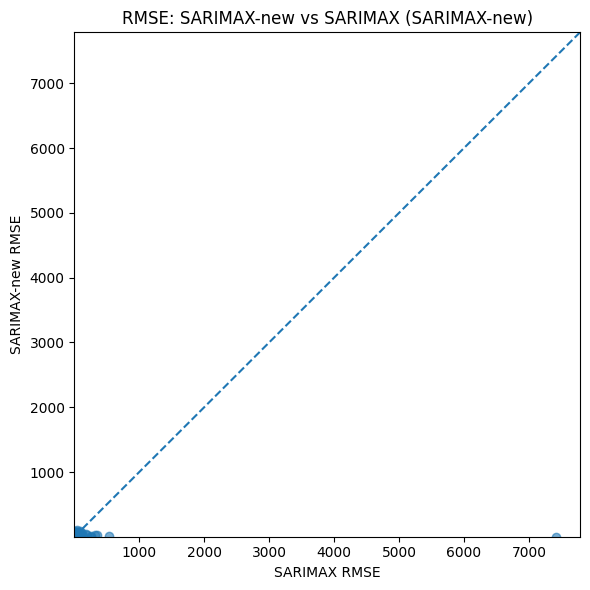

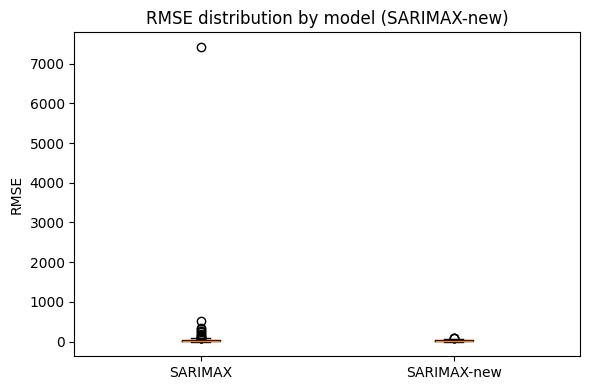

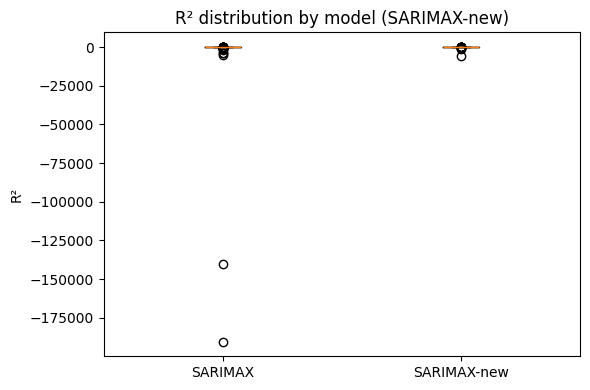

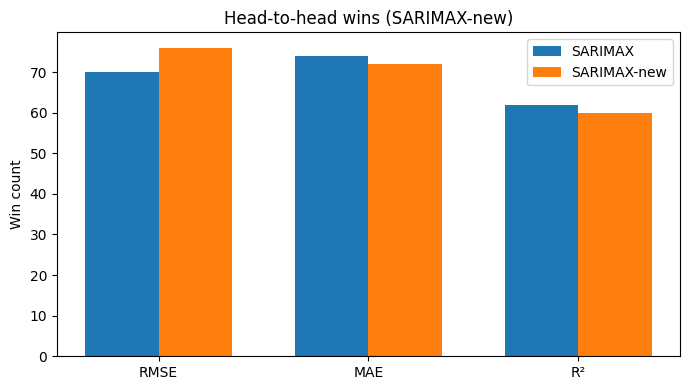

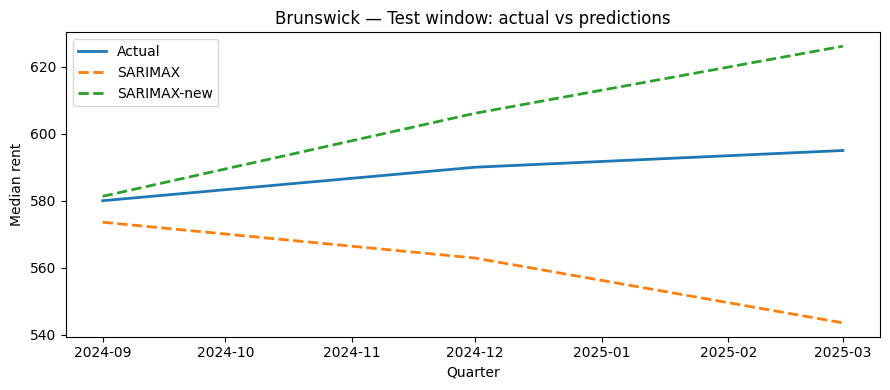

In [ ]:
# you already produced: comparison_df, base_preds, new_preds
plot_portfolio_comparison(comparison_df, title_suffix="(SARIMAX-new)", model_a="SARIMAX", model_b="SARIMAX-new")

# per-suburb time-series:
plot_suburb_test_series("Brunswick", base_preds, new_preds, label_a="SARIMAX", label_b="SARIMAX-new")


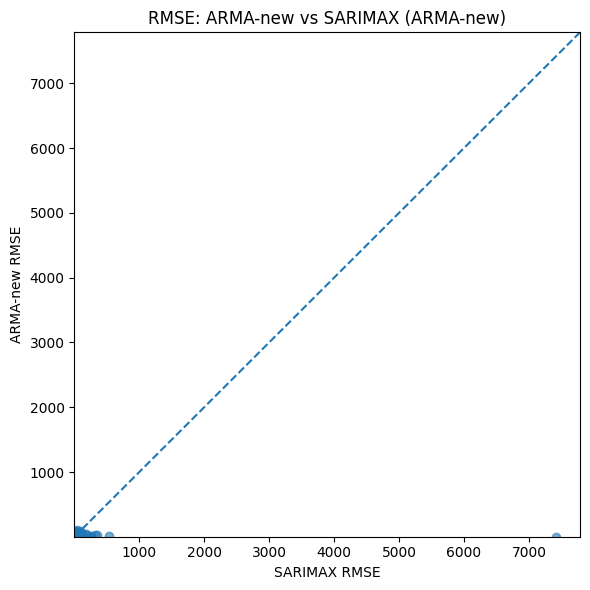

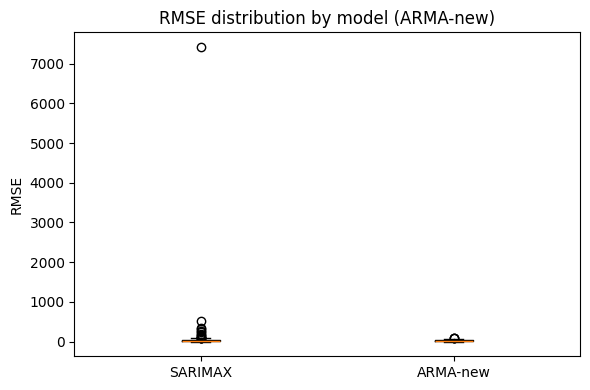

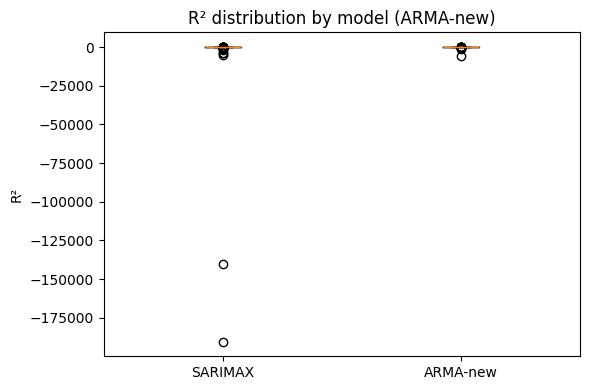

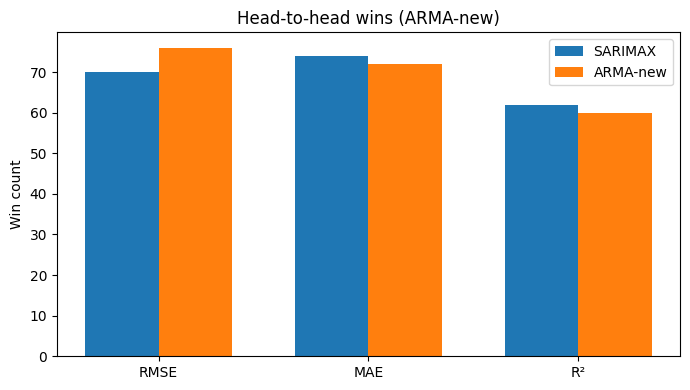

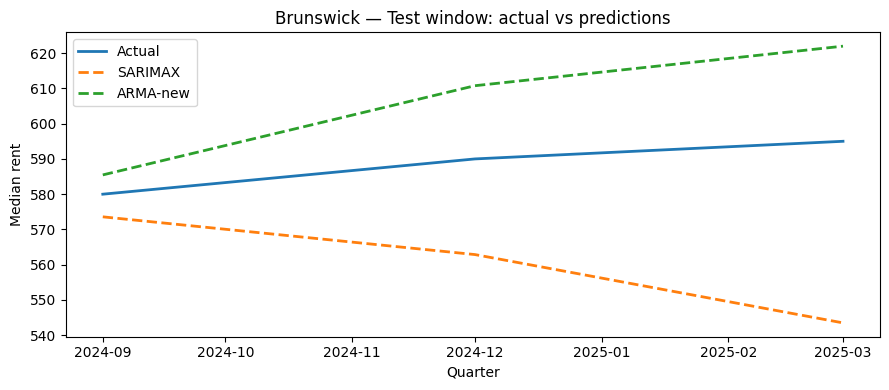

In [119]:
plot_portfolio_comparison(comparison_df, title_suffix="(ARMA-new)", model_a="SARIMAX", model_b="ARMA-new")

plot_suburb_test_series("Brunswick", base_preds, arma_preds, label_a="SARIMAX", label_b="ARMA-new")


In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def _model_pair_labels(pair):
    """Return labels shown on plots for a pair ('BASE','NEW') style."""
    return pair.get("a_name","Model A"), pair.get("b_name","Model B"), pair.get("title","")

def _require_cols(df, cols, name="DataFrame"):
    missing = [c for c in cols if c not in df.columns]
    if missing:
        raise KeyError(f"{name} is missing columns: {missing}")


In [122]:
def plot_portfolio_comparison(comparison_df, pair=dict(a_name="Baseline", b_name="New", title="")):
    """
    Expects a table with columns:
      BASE_MAE, BASE_RMSE, BASE_R2,
      NEW_MAE,  NEW_RMSE,  NEW_R2
    (Your notebook already builds these as `comparison_df`.)
    """
    _require_cols(
        comparison_df,
        ["BASE_MAE","BASE_RMSE","BASE_R2","NEW_MAE","NEW_RMSE","NEW_R2"],
        "comparison_df"
    )
    A, B, title_suffix = _model_pair_labels(pair)

    df = comparison_df.copy()
    rm = df[["BASE_RMSE","NEW_RMSE"]].dropna()
    r2 = df[["BASE_R2","NEW_R2"]].dropna()
    mae= df[["BASE_MAE","NEW_MAE"]].dropna()

    # (a) Scatter NEW_RMSE vs BASE_RMSE
    fig, ax = plt.subplots(figsize=(6,6))
    ax.scatter(rm["BASE_RMSE"], rm["NEW_RMSE"], alpha=0.55)
    lo = np.nanmin(rm.values); hi = np.nanmax(rm.values)
    lo, hi = lo*0.95, hi*1.05
    ax.plot([lo,hi],[lo,hi],"--")
    ax.set_xlim(lo,hi); ax.set_ylim(lo,hi)
    ax.set_xlabel(f"{A} RMSE"); ax.set_ylabel(f"{B} RMSE")
    ax.set_title(f"RMSE: {B} vs {A} {title_suffix}")
    plt.tight_layout(); plt.show()

    # (b) Boxplots RMSE
    fig, ax = plt.subplots(figsize=(6,4))
    ax.boxplot([rm["BASE_RMSE"], rm["NEW_RMSE"]], labels=[A,B])
    ax.set_ylabel("RMSE"); ax.set_title(f"RMSE distribution {title_suffix}")
    plt.tight_layout(); plt.show()

    # (c) Boxplots R²
    if not r2.empty:
        fig, ax = plt.subplots(figsize=(6,4))
        ax.boxplot([r2["BASE_R2"], r2["NEW_R2"]], labels=[A,B])
        ax.set_ylabel("R²"); ax.set_title(f"R² distribution {title_suffix}")
        plt.tight_layout(); plt.show()

    # (d) “Gain” bar chart (how many suburbs each model wins)
    def win_counts(a, b, lower_is_better=True):
        m = ~(a.isna() | b.isna()); a, b = a[m], b[m]
        if lower_is_better:
            return (a < b).sum(), (b < a).sum(), (a == b).sum()
        return (a > b).sum(), (b > a).sum(), (a == b).sum()

    rmse_A, rmse_B, _ = win_counts(df["BASE_RMSE"], df["NEW_RMSE"], True)
    mae_A , mae_B , _ = win_counts(df["BASE_MAE"],  df["NEW_MAE"],  True)
    r2_A  , r2_B  , _ = win_counts(df["BASE_R2"],   df["NEW_R2"],   False)

    labels = ["RMSE","MAE","R²"]
    base_counts = [rmse_A, mae_A, r2_A]
    new_counts  = [rmse_B, mae_B, r2_B]

    x = np.arange(len(labels)); width=0.35
    fig, ax = plt.subplots(figsize=(7,4))
    ax.bar(x-width/2, base_counts, width, label=A)
    ax.bar(x+width/2, new_counts, width, label=B)
    ax.set_xticks(x); ax.set_xticklabels(labels)
    ax.set_ylabel("Win count"); ax.set_title(f"Head-to-head wins {title_suffix}")
    ax.legend(); plt.tight_layout(); plt.show()

    # (e) Top-20 improvement leaderboard (ΔRMSE = BASE - NEW; higher = better NEW)
    if not rm.empty:
        df["delta_RMSE"] = df["BASE_RMSE"] - df["NEW_RMSE"]
        top = df.sort_values("delta_RMSE", ascending=False).head(20)
        fig, ax = plt.subplots(figsize=(8,8))
        ax.barh(top["Suburb"], top["delta_RMSE"])
        ax.invert_yaxis()
        ax.set_xlabel("ΔRMSE (baseline − new)")
        ax.set_title(f"Top-20 suburbs improved by {B}")
        plt.tight_layout(); plt.show()


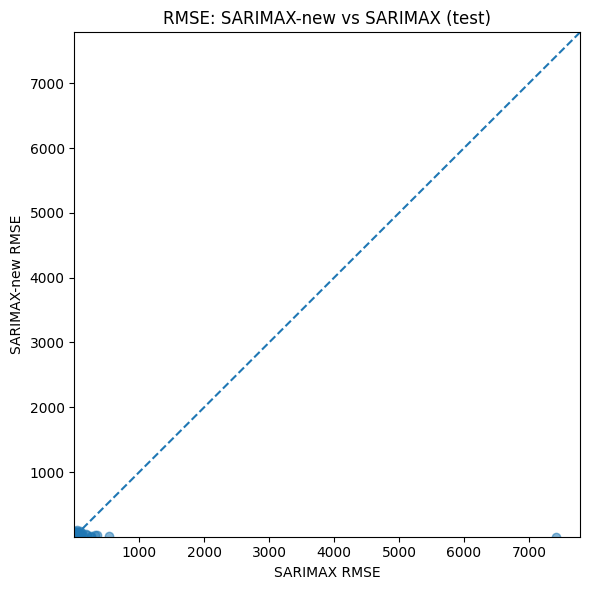

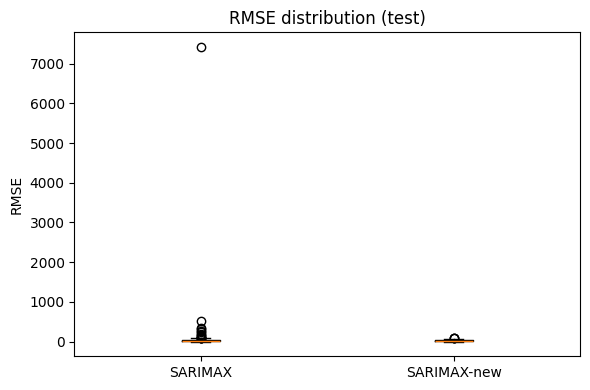

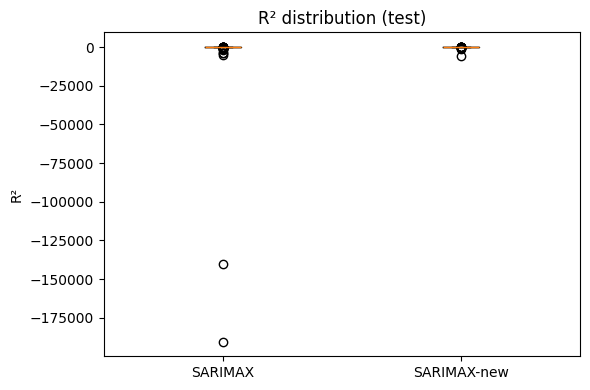

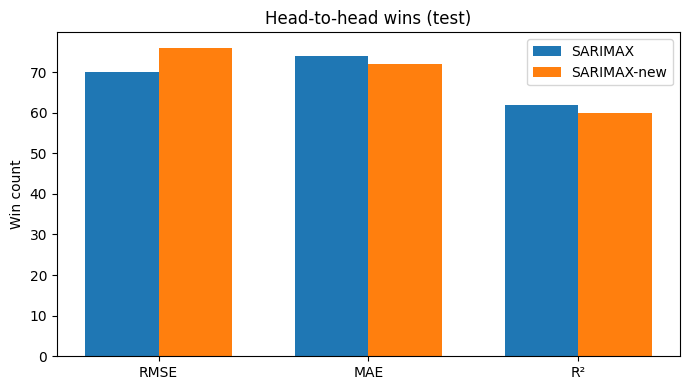

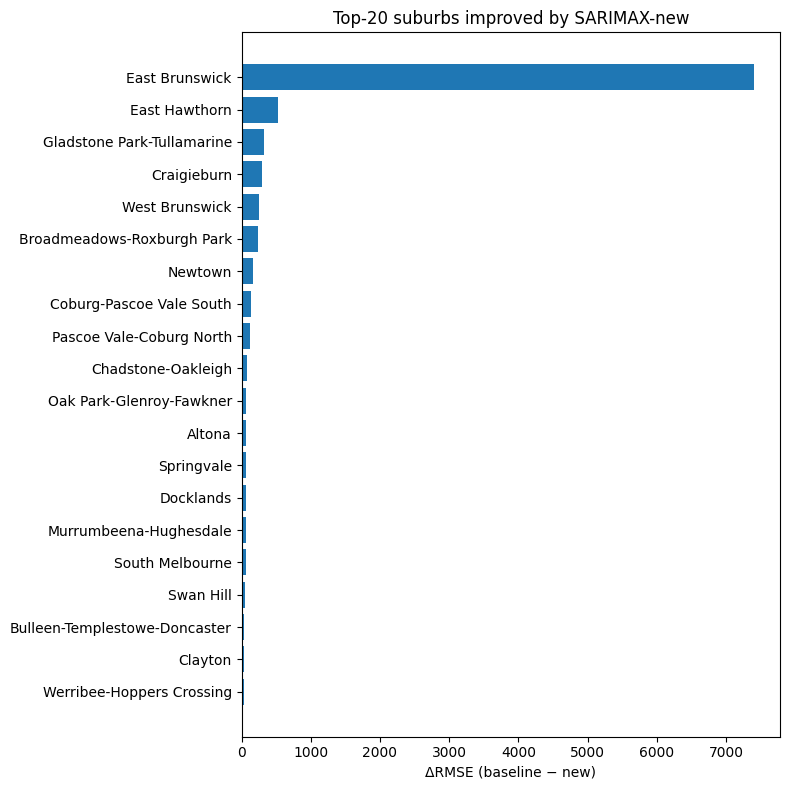

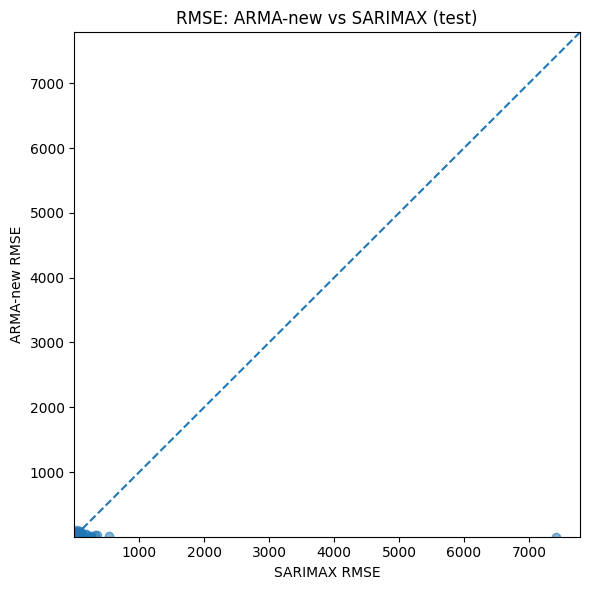

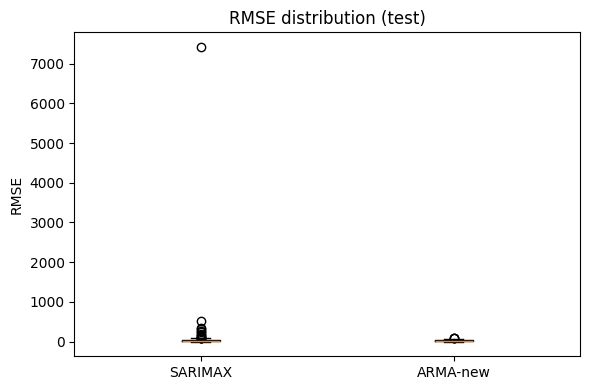

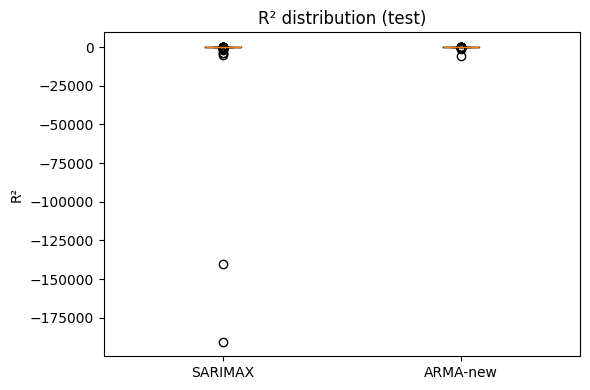

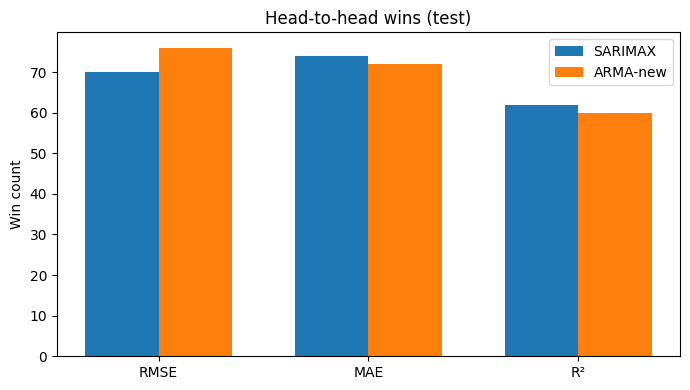

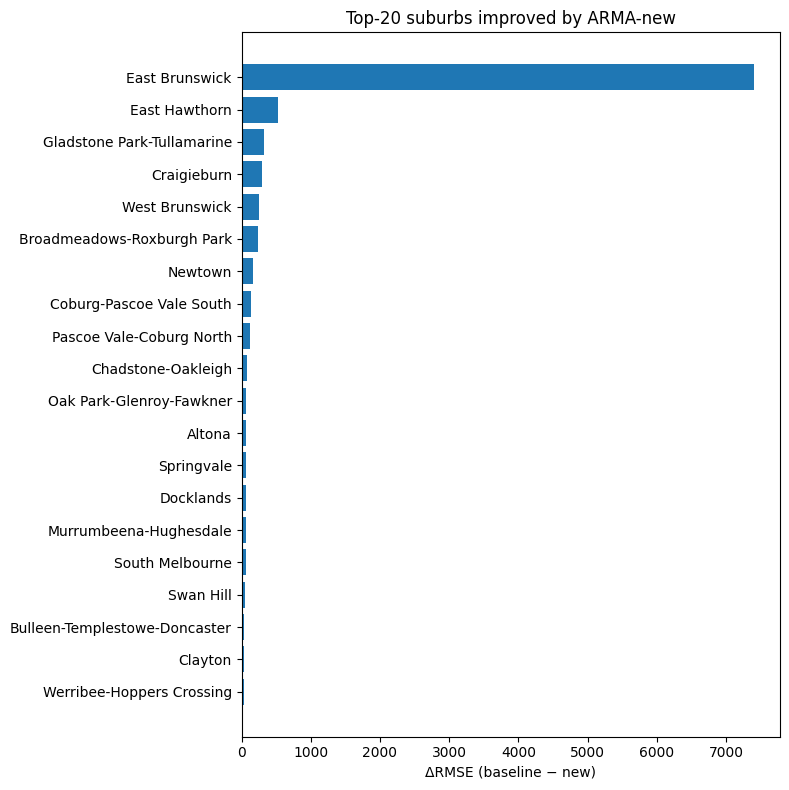

KeyError: "comparison_df is missing columns: ['BASE_MAE', 'BASE_RMSE', 'BASE_R2', 'NEW_MAE', 'NEW_RMSE', 'NEW_R2']"

In [123]:
# SARIMAX vs SARIMAX-new
plot_portfolio_comparison(comparison_df, dict(a_name="SARIMAX", b_name="SARIMAX-new", title="(test)"))

# SARIMAX vs ARMA-new  (use the other comparison_df you created there)
plot_portfolio_comparison(comparison_df, dict(a_name="SARIMAX", b_name="ARMA-new", title="(test)"))

# UCM vs SARIMAX
plot_portfolio_comparison(
    compare_tables(ucm_metrics, sar_metrics),   # you already built this
    dict(a_name="UCM", b_name="SARIMAX", title="(test)")
)


In [ ]:
def plot_suburb_overlay(suburb, *pred_dfs, labels=None, title_suffix=""):
    """
    pred_dfs: any number of long tables with columns
      ['Suburb','date','Actual','Predicted','Model']
    labels: optional list of legend labels to override each df's Model
    """
    series = []
    for i, dfp in enumerate(pred_dfs):
        if dfp is None or dfp.empty: 
            continue
        d = dfp[dfp["Suburb"]==suburb].copy()
        if d.empty: 
            continue
        d = d.sort_values("date")
        lab = labels[i] if labels and i < len(labels) else (d["Model"].iloc[0] if "Model" in d.columns else f"Model {i+1}")
        series.append((d, lab))

    if not series:
        print(f"No predictions found for {suburb}.")
        return

    # pick Actual from the first available df
    actual = series[0][0][["date","Actual"]].dropna().drop_duplicates()

    plt.figure(figsize=(9,4))
    plt.plot(actual["date"], actual["Actual"], lw=2, label="Actual")
    for d, lab in series:
        plt.plot(d["date"], d["Predicted"], lw=2, ls="--", label=lab)
    plt.title(f"{suburb} — Test window {title_suffix}")
    plt.xlabel("Quarter"); plt.ylabel("Median rent")
    plt.legend(); plt.tight_layout(); plt.show()


In [ ]:
# SARIMAX vs SARIMAX-new
plot_suburb_overlay("Brunswick", base_preds, new_preds, labels=["SARIMAX","SARIMAX-new"])

# SARIMAX vs ARMA-new
plot_suburb_overlay("Brunswick", base_preds, arma_preds, labels=["SARIMAX","ARMA-new"])

# UCM vs SARIMAX
plot_suburb_overlay("Brunswick", sar_preds, ucm_preds, labels=["SARIMAX","UCM"])


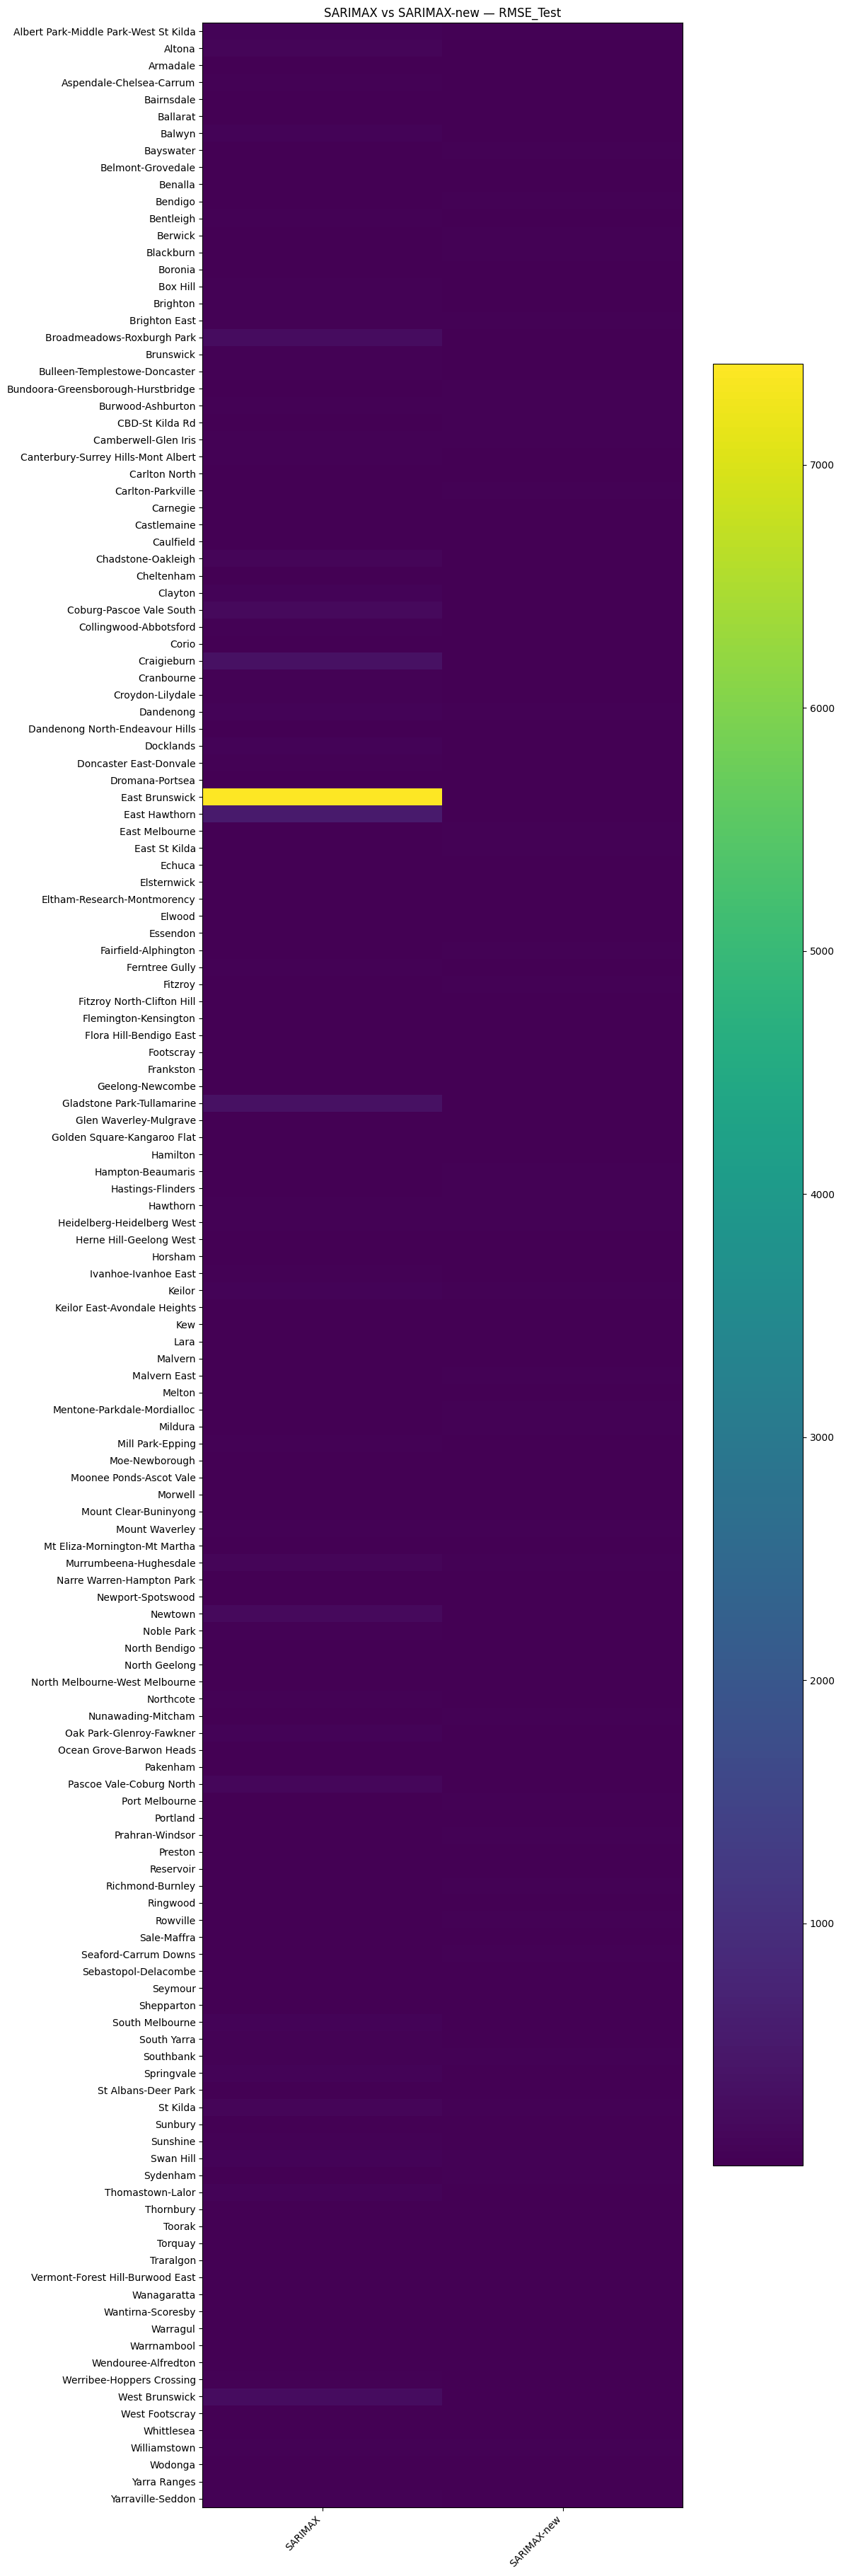

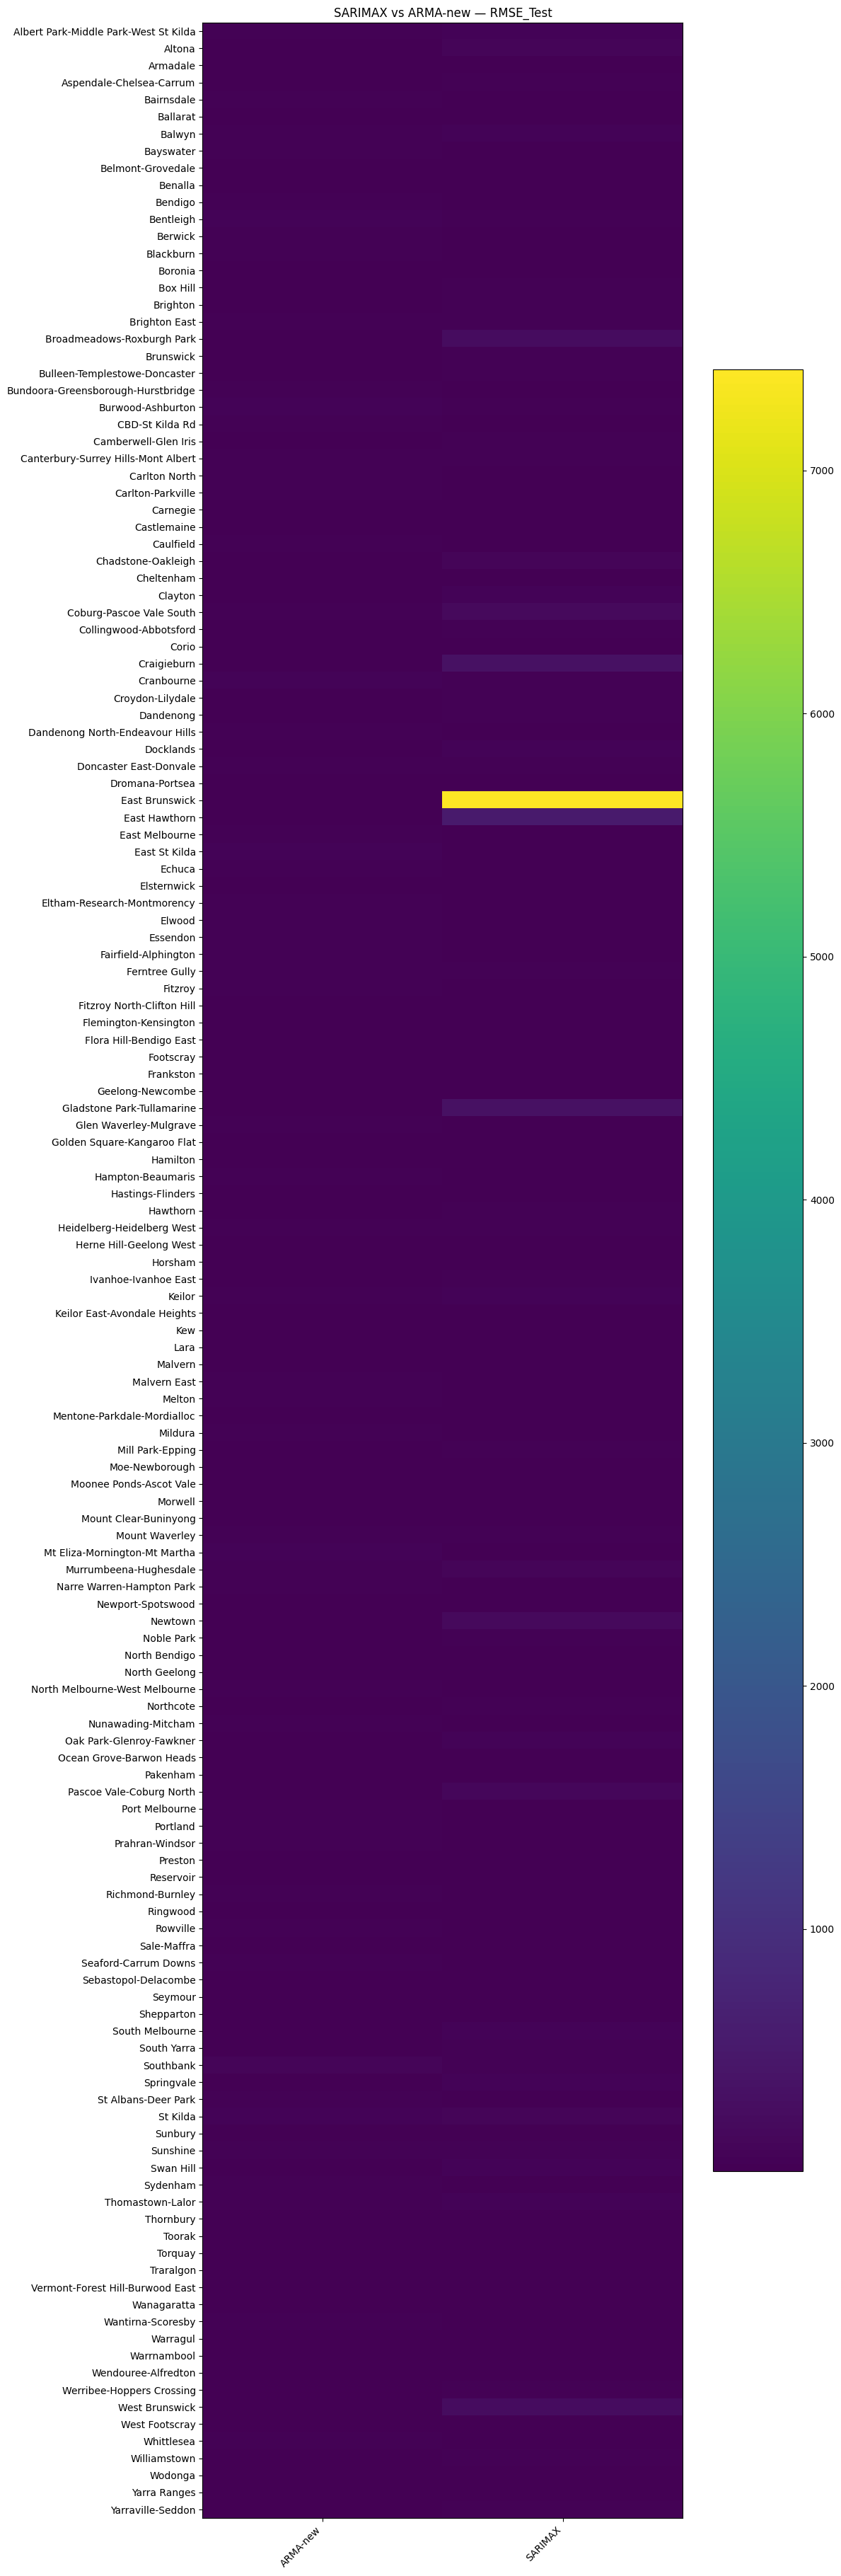

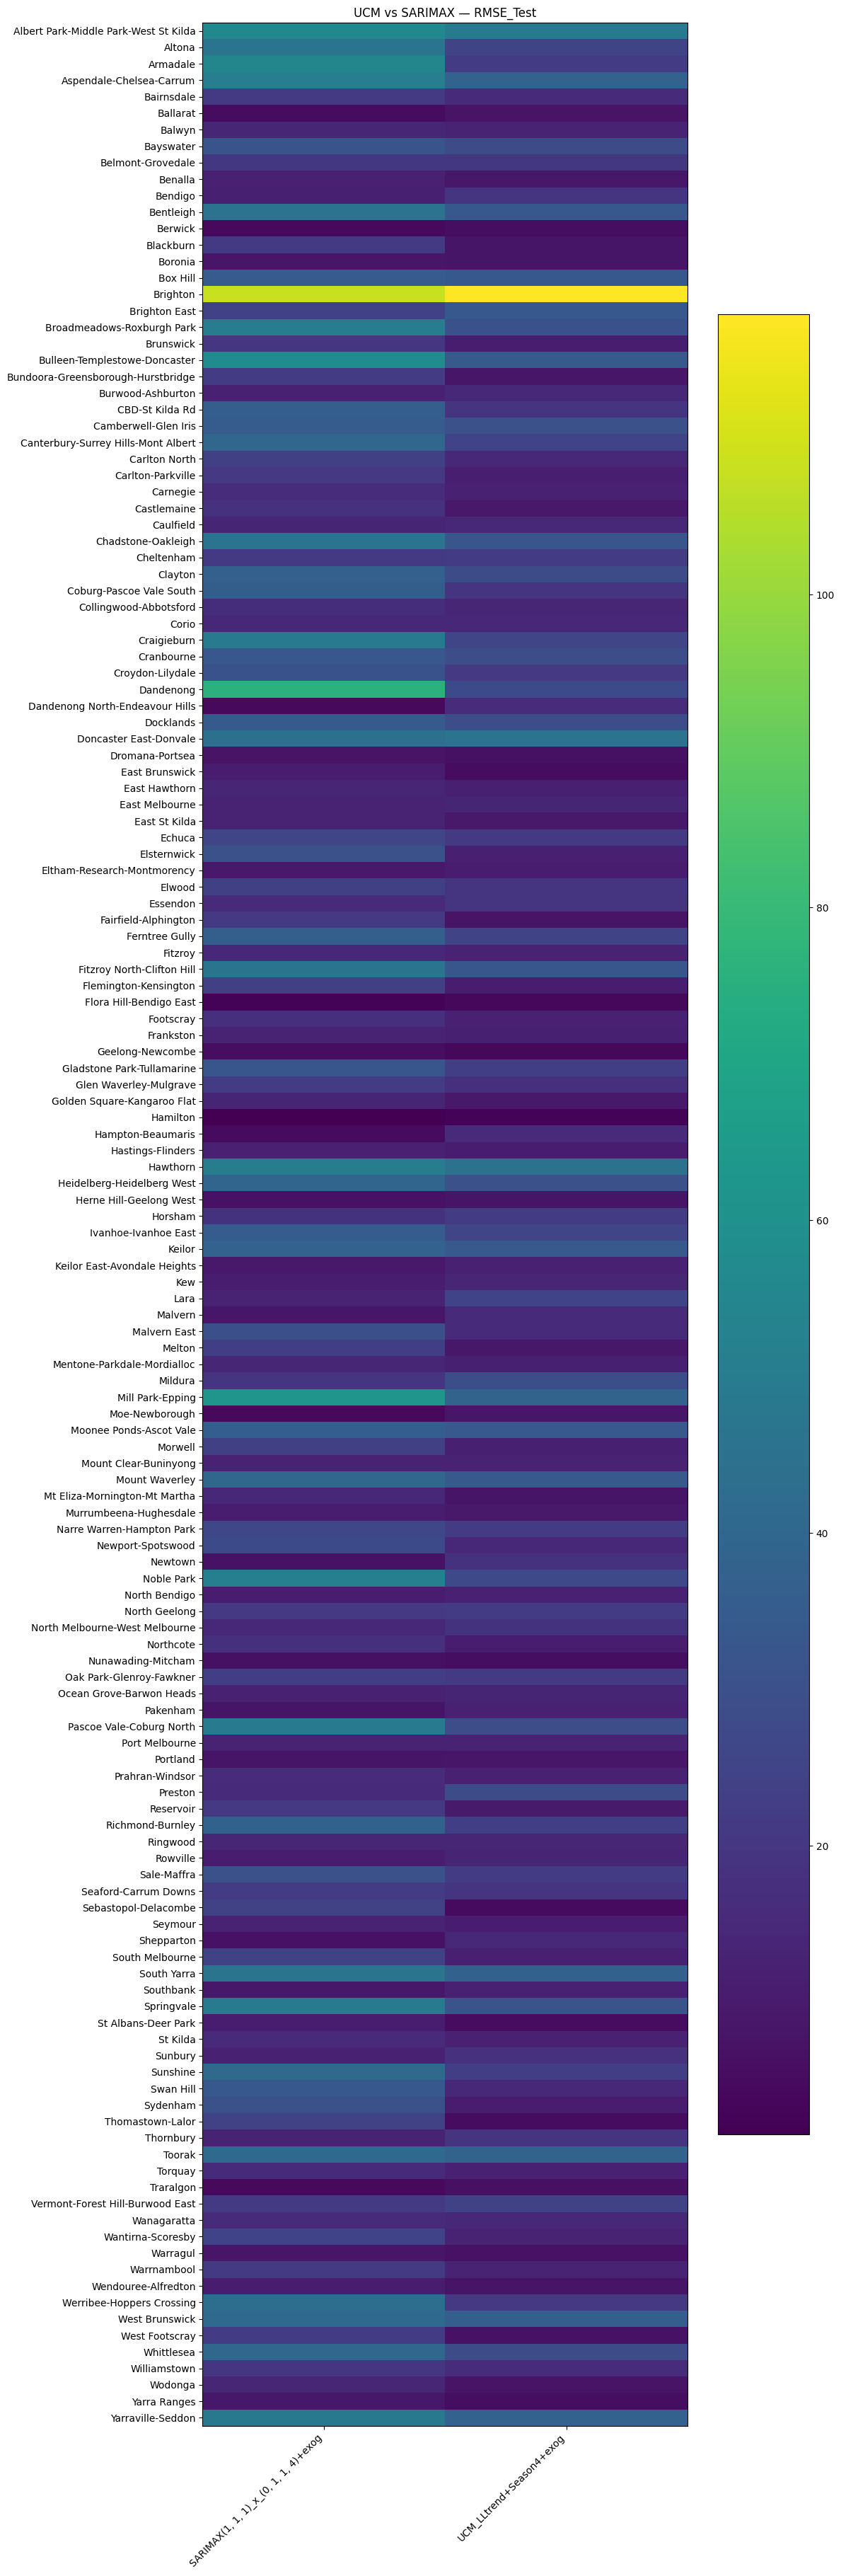

In [124]:
def plot_metric_heatmap_from_metrics(*metrics_tables, metric="RMSE_Test", title="Heatmap"):
    """
    Accepts any number of metrics tables with columns ['Suburb','Model', metric].
    Stacks them and pivots into a Suburb x Model matrix for a heatmap.
    """
    mats = []
    for m in metrics_tables:
        if m is None or m.empty: 
            continue
        sub = m[["Suburb","Model",metric]].dropna()
        mats.append(sub)
    if not mats:
        print("No data for heatmap.")
        return
    mat = pd.concat(mats, ignore_index=True)
    wide = mat.pivot_table(index="Suburb", columns="Model", values=metric, aggfunc="mean")

    Z = wide.values.astype(float)
    fig, ax = plt.subplots(figsize=(12, max(6, len(wide)*0.25)))
    im = ax.imshow(Z, aspect='auto', interpolation='nearest')
    ax.set_xticks(np.arange(len(wide.columns)))
    ax.set_yticks(np.arange(len(wide.index)))
    ax.set_xticklabels(wide.columns, rotation=45, ha='right')
    ax.set_yticklabels(wide.index)
    ax.set_title(f"{title} — {metric}")
    fig.colorbar(im, ax=ax)
    plt.tight_layout(); plt.show()

# Examples:
plot_metric_heatmap_from_metrics(base_metrics, new_metrics, metric="RMSE_Test", title="SARIMAX vs SARIMAX-new")
plot_metric_heatmap_from_metrics(base_metrics, arma_metrics, metric="RMSE_Test", title="SARIMAX vs ARMA-new")
plot_metric_heatmap_from_metrics(sar_metrics, ucm_metrics, metric="RMSE_Test", title="UCM vs SARIMAX")


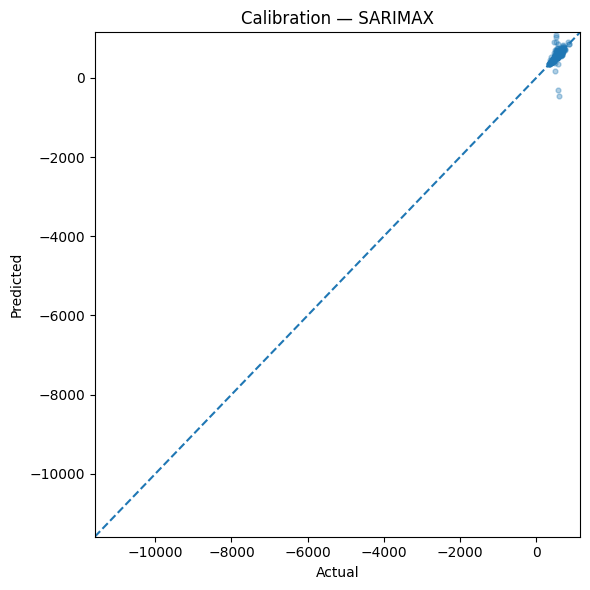

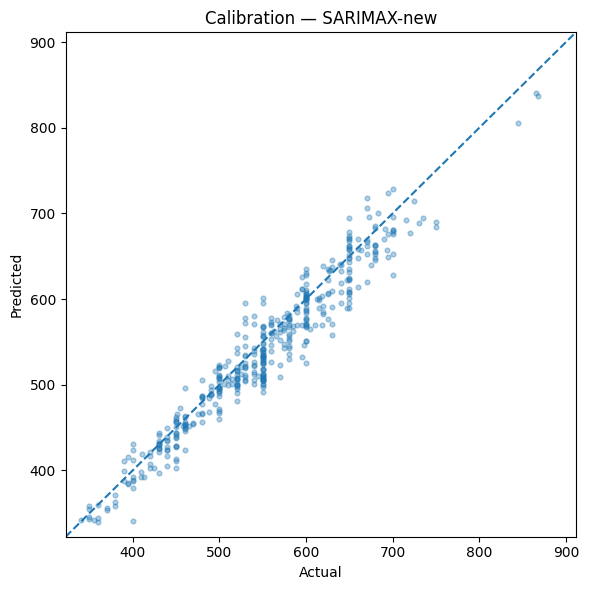

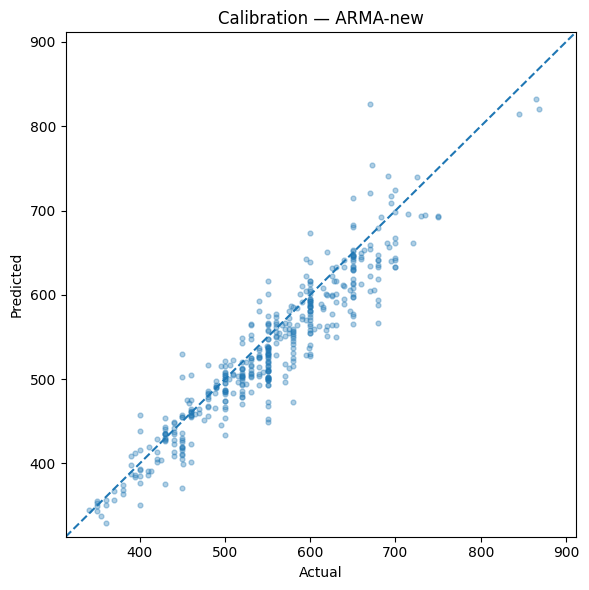

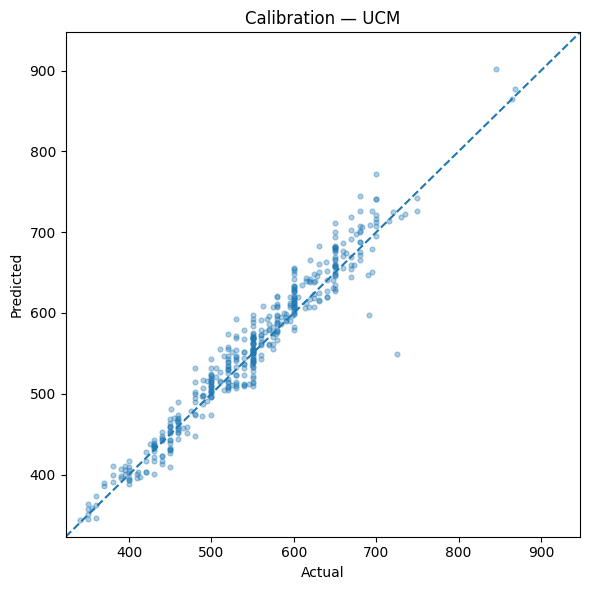

In [125]:
def plot_calibration(pred_df, label="Model"):
    """
    Expects long df with ['date','Actual','Predicted'] for test window.
    """
    if pred_df is None or pred_df.empty:
        print("No predictions to calibrate.")
        return
    d = pred_df.dropna(subset=["Actual","Predicted"])
    x = d["Actual"].values; y = d["Predicted"].values
    lo, hi = np.nanmin([x,y]), np.nanmax([x,y]); 
    lo, hi = lo*0.95, hi*1.05

    fig, ax = plt.subplots(figsize=(6,6))
    ax.scatter(x, y, alpha=0.35, s=12)
    ax.plot([lo,hi],[lo,hi],"--")
    ax.set_xlim(lo,hi); ax.set_ylim(lo,hi)
    ax.set_xlabel("Actual"); ax.set_ylabel("Predicted")
    ax.set_title(f"Calibration — {label}")
    plt.tight_layout(); plt.show()

# Examples:
plot_calibration(base_preds, "SARIMAX")
plot_calibration(new_preds,  "SARIMAX-new")
plot_calibration(arma_preds, "ARMA-new")
plot_calibration(ucm_preds,  "UCM")


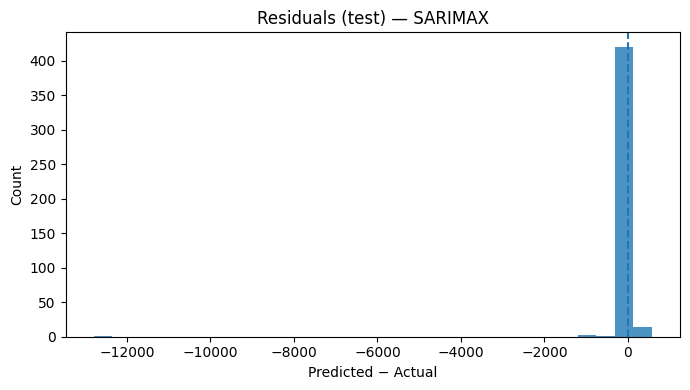

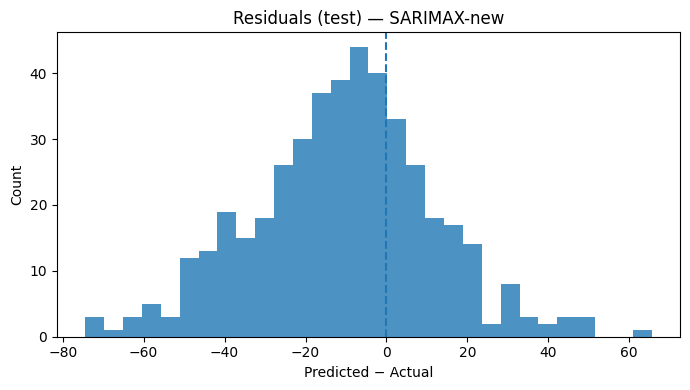

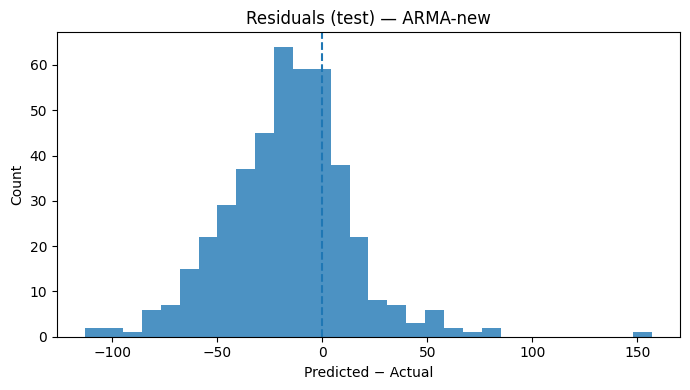

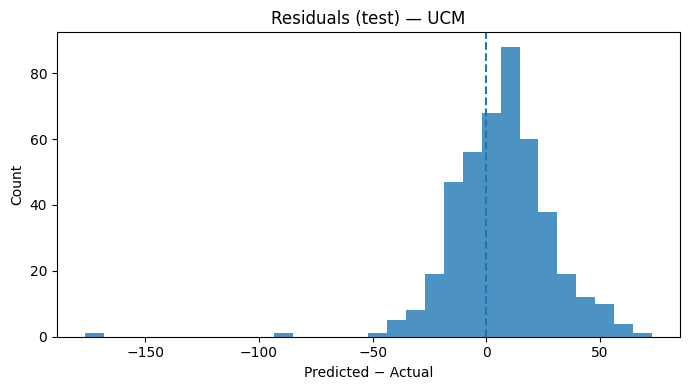

In [126]:
def plot_residual_hist(pred_df, label="Model"):
    if pred_df is None or pred_df.empty:
        print("No predictions.")
        return
    d = pred_df.copy()
    d["Residual"] = d["Predicted"] - d["Actual"]
    fig, ax = plt.subplots(figsize=(7,4))
    ax.hist(d["Residual"].dropna(), bins=30, alpha=0.8)
    ax.axvline(0, ls="--")
    ax.set_title(f"Residuals (test) — {label}")
    ax.set_xlabel("Predicted − Actual"); ax.set_ylabel("Count")
    plt.tight_layout(); plt.show()

# Examples:
plot_residual_hist(base_preds, "SARIMAX")
plot_residual_hist(new_preds,  "SARIMAX-new")
plot_residual_hist(arma_preds, "ARMA-new")
plot_residual_hist(ucm_preds,  "UCM")


In [128]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_suburb_overlay(suburb, *pred_dfs, labels=None, title_suffix=""):
    """
    Overlay Actual vs Predicted for a single suburb from one or more
    prediction DataFrames.

    Each pred_df should have columns: ['Suburb','date','Actual','Predicted']
    (a 'Model' column is optional). Use `labels=["name1","name2",...]`
    to control legend names.
    """
    series = []
    for i, dfp in enumerate(pred_dfs):
        if dfp is None or len(dfp)==0:
            continue
        d = dfp[dfp["Suburb"]==suburb].copy()
        if d.empty:
            continue
        d = d.sort_values("date")
        lab = (labels[i] if labels and i < len(labels)
               else (d["Model"].iloc[0] if "Model" in d.columns else f"Model {i+1}"))
        series.append((d, lab))

    if not series:
        print(f"No predictions found for {suburb}.")
        return

    # Actual from first source
    actual = series[0][0][["date","Actual"]].dropna().drop_duplicates()

    plt.figure(figsize=(9,4))
    plt.plot(actual["date"], actual["Actual"], lw=2, label="Actual")
    for d, lab in series:
        plt.plot(d["date"], d["Predicted"], lw=2, ls="--", label=lab)
    plt.title(f"{suburb} — Test window {title_suffix}")
    plt.xlabel("Quarter"); plt.ylabel("Median rent")
    plt.legend(); plt.tight_layout(); plt.show()


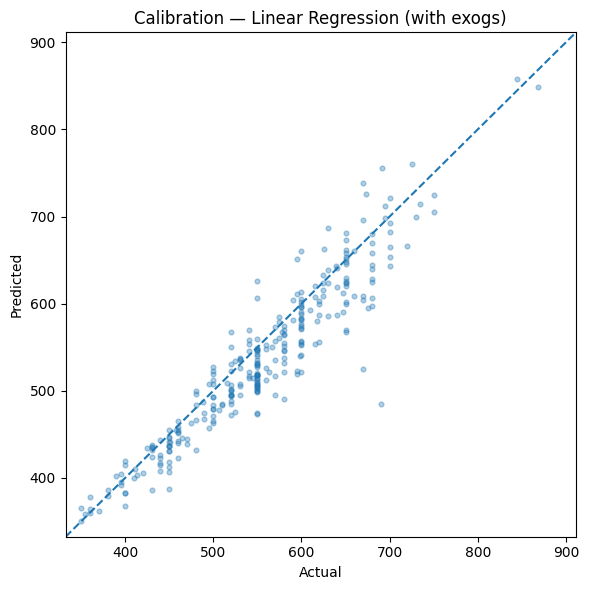

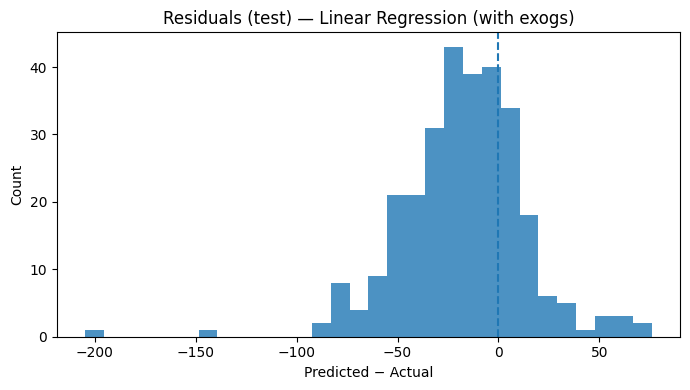

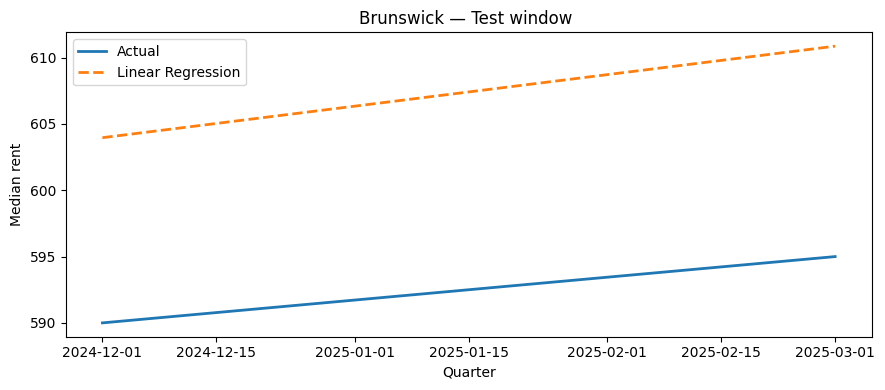

In [129]:
# Portfolio view
plot_calibration(test_preds_df, "Linear Regression (with exogs)")
plot_residual_hist(test_preds_df, "Linear Regression (with exogs)")

# Per suburb
plot_suburb_overlay("Brunswick", test_preds_df, labels=["Linear Regression"])


In [132]:
import geopandas as gpd
import matplotlib.pyplot as plt
SHP_PATH = "/Users/rajaa/Desktop/Applied Data Science MAST30034/project-2-group-real-estate-industry-project-7-2025/Raja-workspace/notebooks/landing/1. sa2_district_shape/SA2_GDA2020_SHAPEFILE/SA2_2021_AUST_GDA2020.shp"
def plot_rmse_map(comparison_df, shapefile_path, metric="NEW_RMSE", title="Model RMSE by SA2"):
    gdf = gpd.read_file(shapefile_path)
    df = comparison_df.copy()
    df["Suburb"] = df["Suburb"].str.upper()
    gdf["SA2_NAME21"] = gdf["SA2_NAME21"].str.upper()
    merged = gdf.merge(df, left_on="SA2_NAME21", right_on="Suburb", how="left")

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    merged.plot(column=metric, cmap="viridis_r", legend=True, ax=ax)
    ax.set_title(title)
    ax.axis("off")
    plt.show()


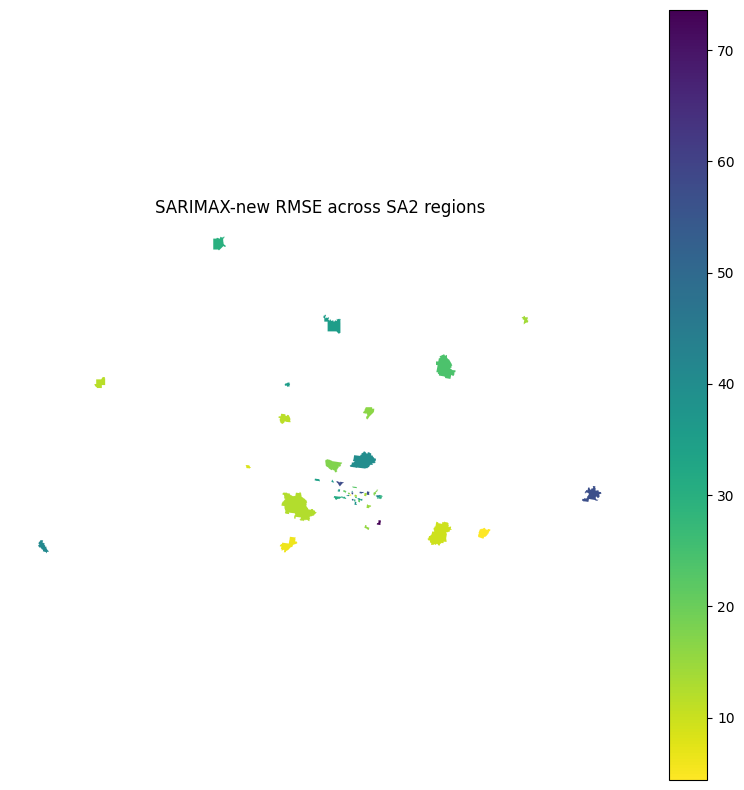

In [133]:
plot_rmse_map(comparison_df, SHP_PATH, metric="NEW_RMSE", title="SARIMAX-new RMSE across SA2 regions")


In [138]:
def plot_error_trend(pred_df, freq="Q"):
    df = pred_df.copy()
    df["date"] = pd.to_datetime(df["date"])
    df["error"] = df["Predicted"] - df["Actual"]
    agg = df.groupby(df["date"].dt.to_period(freq))["error"].mean().to_timestamp()
    plt.figure(figsize=(8,4))
    plt.plot(agg.index, agg.values, marker="o")
    plt.axhline(0, ls="--", color="grey")
    plt.title("Average prediction error over time")
    plt.ylabel("Mean error (Predicted − Actual)")
    plt.xlabel("Quarter")
    plt.tight_layout(); plt.show()


In [139]:
import seaborn as sns

def plot_feature_importance(model, feature_names):
    coefs = pd.Series(model.coef_, index=feature_names)
    coefs.sort_values().plot(kind="barh", figsize=(6,4))
    plt.title("Feature Importance (Linear Regression coefficients)")
    plt.xlabel("Weight")
    plt.tight_layout(); plt.show()


In [140]:
import seaborn as sns

def plot_density_comparison(pred_df, label="Model"):
    plt.figure(figsize=(6,4))
    sns.kdeplot(pred_df["Actual"], label="Actual", lw=2)
    sns.kdeplot(pred_df["Predicted"], label="Predicted", lw=2, ls="--")
    plt.title(f"Distribution of Actual vs Predicted — {label}")
    plt.xlabel("Median rent")
    plt.legend()
    plt.tight_layout(); plt.show()


In [141]:
def plot_error_correlation_heatmap(*pred_dfs, labels=None):
    merged = None
    for i, df in enumerate(pred_dfs):
        name = labels[i] if labels else f"Model{i+1}"
        d = df.copy(); d["Residual"] = d["Predicted"] - d["Actual"]
        d = d[["Suburb","date","Residual"]].rename(columns={"Residual": name})
        merged = d if merged is None else pd.merge(merged, d, on=["Suburb","date"], how="inner")

    if merged is None: return
    corr = merged.drop(columns=["Suburb","date"]).corr()
    plt.figure(figsize=(6,5))
    sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
    plt.title("Correlation of residuals across models")
    plt.tight_layout(); plt.show()


In [142]:
def plot_model_leaderboard(*metrics_dfs, metric="RMSE_Test"):
    records = []
    for m in metrics_dfs:
        if m.empty: continue
        name = m["Model"].iloc[0] if "Model" in m.columns else "Unknown"
        records.append({"Model": name, "Mean": m[metric].mean()})
    df = pd.DataFrame(records)
    df.sort_values("Mean", ascending=True).plot(
        x="Model", y="Mean", kind="barh", figsize=(6,3), legend=False)
    plt.title(f"Average {metric} by model")
    plt.xlabel(metric)
    plt.tight_layout(); plt.show()


In [143]:
def plot_residual_vs_fitted(pred_df, label="Model"):
    d = pred_df.copy()
    d["Residual"] = d["Predicted"] - d["Actual"]
    plt.figure(figsize=(6,4))
    plt.scatter(d["Predicted"], d["Residual"], alpha=0.5)
    plt.axhline(0, ls="--", color="grey")
    plt.title(f"Residual vs Fitted — {label}")
    plt.xlabel("Predicted Median rent")
    plt.ylabel("Residual (Pred − Act)")
    plt.tight_layout(); plt.show()


In [144]:
def plot_forecast_overlay(suburb, preds_df, horizon=4):
    d = preds_df[preds_df["Suburb"]==suburb].copy()
    d = d.sort_values("date").tail(horizon)
    plt.figure(figsize=(8,4))
    plt.plot(d["date"], d["Predicted"], 'o--', label="Forecast")
    plt.title(f"{suburb} — {horizon}-quarter forecast horizon")
    plt.xlabel("Quarter"); plt.ylabel("Predicted median rent")
    plt.legend(); plt.tight_layout(); plt.show()


In [145]:
def plot_improvement_map(comparison_df, shapefile_path, metric="RMSE", title="Model improvement map"):
    gdf = gpd.read_file(shapefile_path)
    df = comparison_df.copy()
    df["delta"] = df[f"BASE_{metric}"] - df[f"NEW_{metric}"]
    df["Suburb"] = df["Suburb"].str.upper()
    gdf["SA2_NAME21"] = gdf["SA2_NAME21"].str.upper()
    merged = gdf.merge(df, left_on="SA2_NAME21", right_on="Suburb", how="left")
    merged["Improved"] = merged["delta"] > 0
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    merged.plot(column="delta", cmap="RdYlGn", legend=True, ax=ax)
    ax.set_title(title)
    ax.axis("off")
    plt.show()


In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def plot_calibration(pred_df, model_label="Model"):
    """
    Plots Predicted vs Actual scatter with a perfect-fit 45° line.
    Works for any model's predictions dataframe with 'Actual' and 'Predicted'.
    """
    df = pred_df.copy()
    df = df.dropna(subset=["Actual","Predicted"])
    plt.figure(figsize=(6,6))
    sns.scatterplot(x="Actual", y="Predicted", data=df, alpha=0.6)
    lims = [df[["Actual","Predicted"]].min().min(), df[["Actual","Predicted"]].max().max()]
    plt.plot(lims, lims, "--", color="grey", lw=2)
    plt.title(f"Calibration plot — {model_label}")
    plt.xlabel("Actual Median rent")
    plt.ylabel("Predicted Median rent")
    plt.tight_layout()
    plt.show()

def plot_residual_hist(pred_df, model_label="Model"):
    """
    Shows residual distribution (Predicted − Actual).
    """
    df = pred_df.copy()
    df["Residual"] = df["Predicted"] - df["Actual"]
    plt.figure(figsize=(6,4))
    sns.histplot(df["Residual"], bins=20, kde=True, color="skyblue")
    plt.axvline(0, color="red", ls="--", lw=2)
    plt.title(f"Residual distribution — {model_label}")
    plt.xlabel("Residual (Pred − Act)")
    plt.tight_layout()
    plt.show()


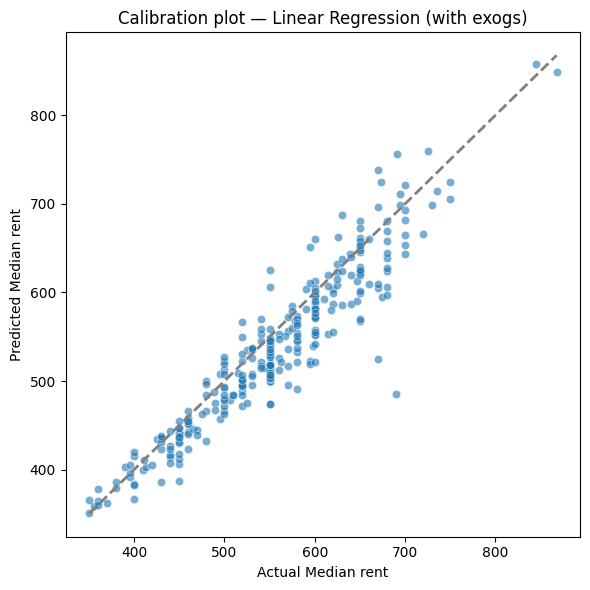

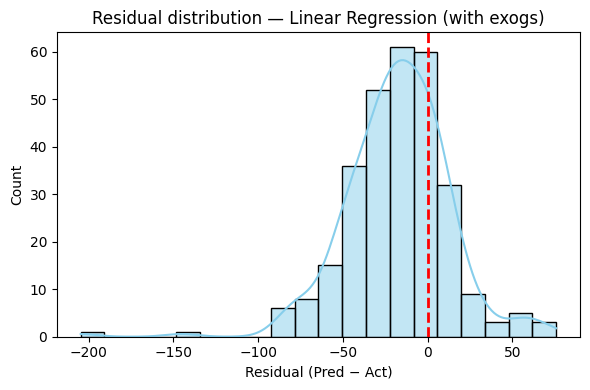

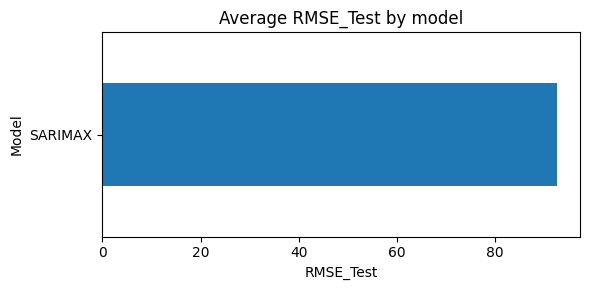

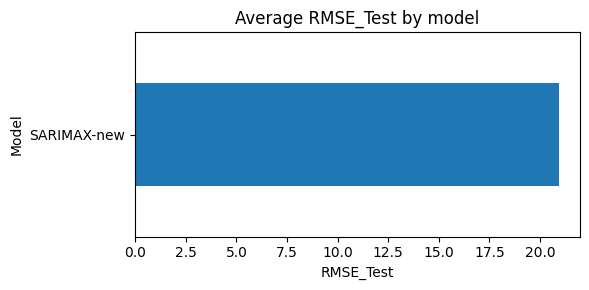

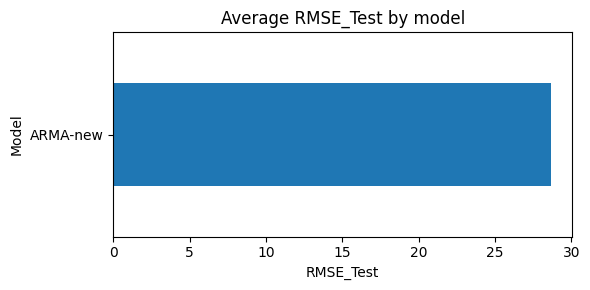

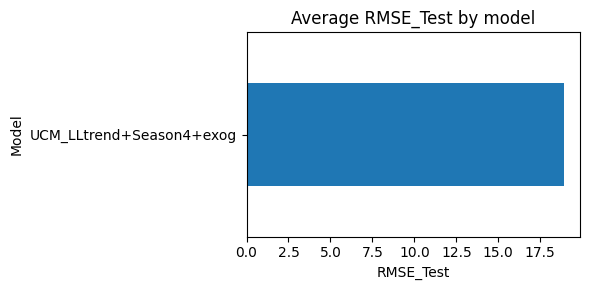

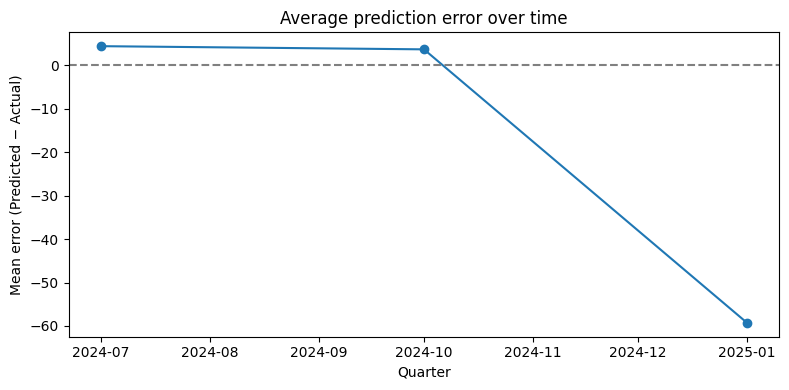

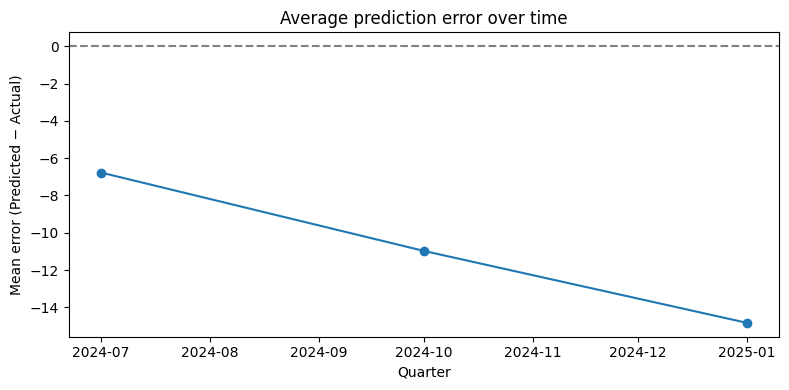

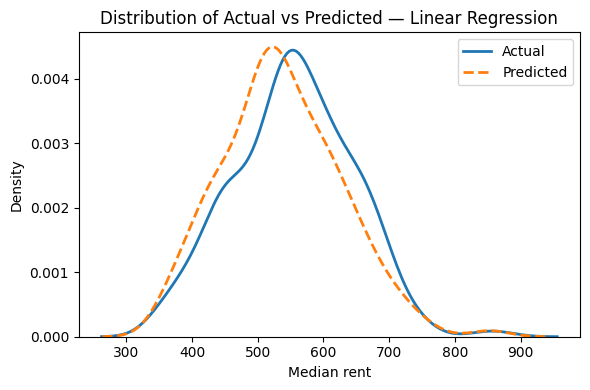

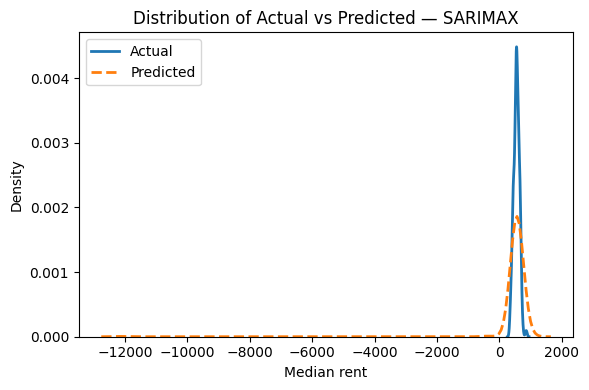

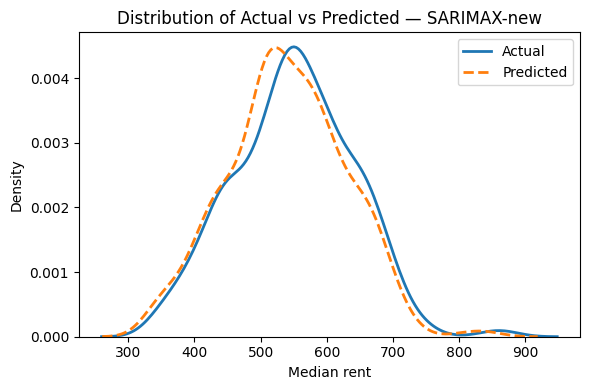

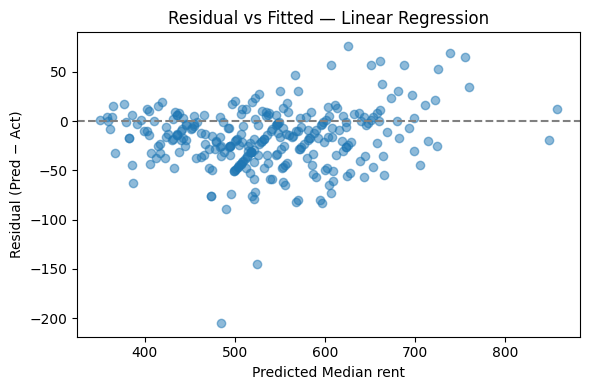

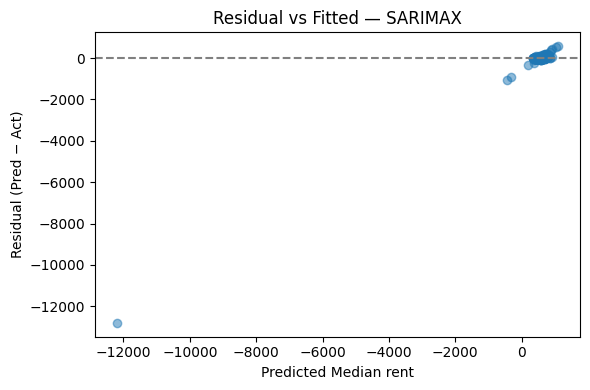

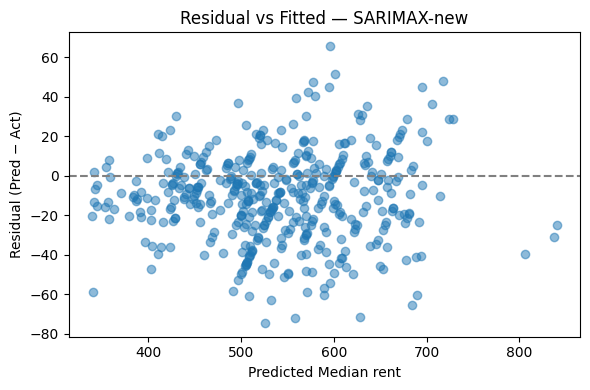

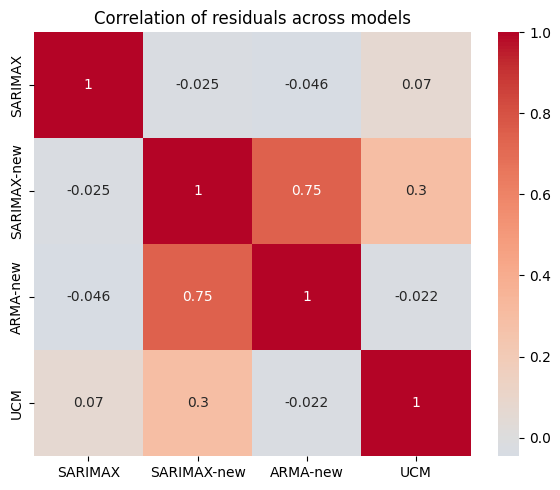

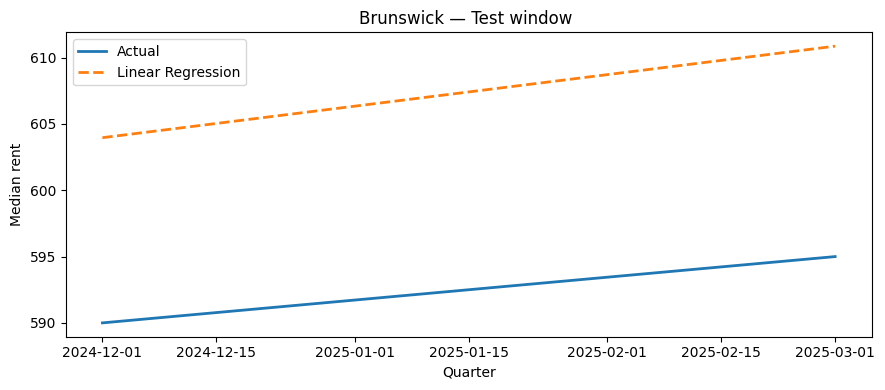

NameError: name 'plot_suburb_overlay_multi' is not defined

In [147]:
# 1) Calibration & residual distribution (Linear Regression portfolio)
# Portfolio-level calibration and residual plots
plot_calibration(test_preds_df, model_label="Linear Regression (with exogs)")
plot_residual_hist(test_preds_df, model_label="Linear Regression (with exogs)")

# 2) Model leaderboard (average RMSE/R² across suburbs)
#    (Pick any of the metric columns: "RMSE_Test", "MAE_Test", "R2_Test")
plot_model_leaderboard(base_metrics, metric="RMSE_Test")
plot_model_leaderboard(new_metrics,  metric="RMSE_Test")
plot_model_leaderboard(arma_metrics, metric="RMSE_Test")
plot_model_leaderboard(ucm_metrics,  metric="RMSE_Test")

# 3) Error trend over time (use one predictions DF at a time; you can loop)
plot_error_trend(base_preds, freq="Q")
plot_error_trend(new_preds,  freq="Q")

# 4) Density comparison (distribution of Actual vs Predicted)
plot_density_comparison(test_preds_df, label="Linear Regression")
plot_density_comparison(base_preds,     label="SARIMAX")
plot_density_comparison(new_preds,      label="SARIMAX-new")

# 5) Residual vs Fitted (heteroskedasticity)
plot_residual_vs_fitted(test_preds_df, label="Linear Regression")
plot_residual_vs_fitted(base_preds,    label="SARIMAX")
plot_residual_vs_fitted(new_preds,     label="SARIMAX-new")

# 6) Residual correlation across models (good for ensemble ideas)
#    Align on the same horizon (rows present in all) for clean correlation.
plot_error_correlation_heatmap(base_preds, new_preds, arma_preds, ucm_preds,
                               labels=["SARIMAX", "SARIMAX-new", "ARMA-new", "UCM"])

# =========================
# PER-SUBURB CALLS
# =========================



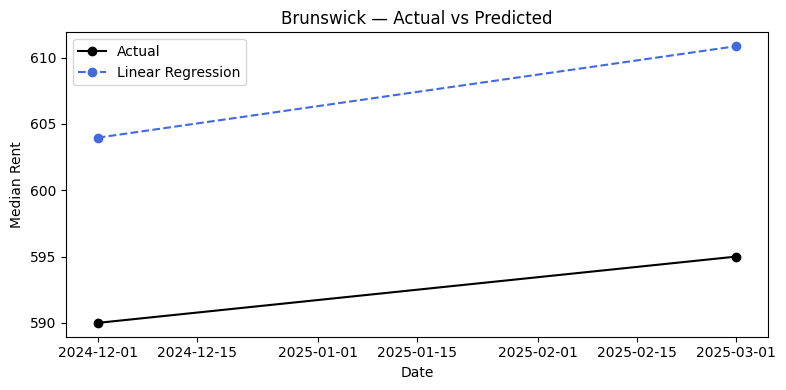

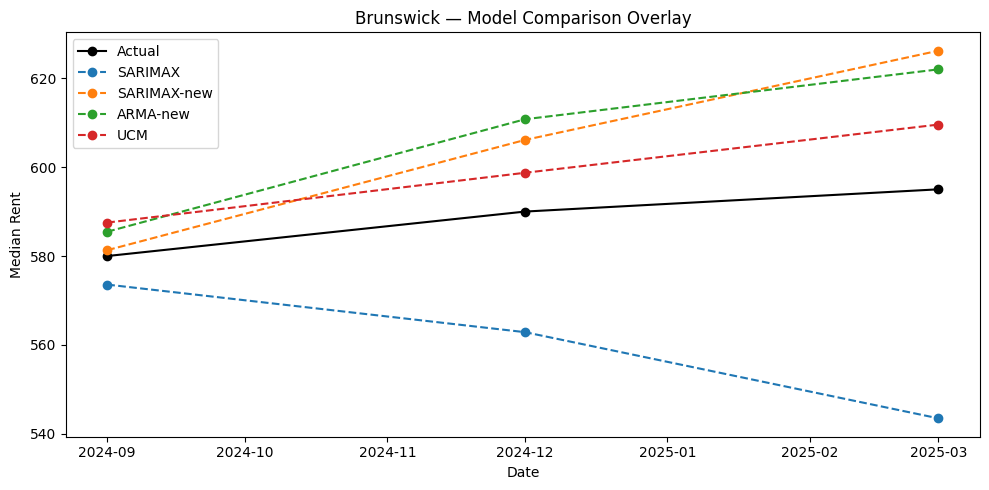

In [148]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_suburb_overlay(suburb, pred_df, labels=None):
    """
    Plot Actual vs Predicted values for a single model & suburb.
    Expects columns: ['Suburb','date','Actual','Predicted'].
    """
    df = pred_df.copy()
    df = df[df["Suburb"].str.lower() == suburb.lower()]
    if df.empty:
        print(f"No data for suburb '{suburb}'.")
        return

    plt.figure(figsize=(8,4))
    plt.plot(df["date"], df["Actual"], "o-", label="Actual", color="black")
    plt.plot(df["date"], df["Predicted"], "o--", label=labels[0] if labels else "Predicted", color="royalblue")
    plt.title(f"{suburb} — Actual vs Predicted")
    plt.xlabel("Date")
    plt.ylabel("Median Rent")
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_suburb_overlay_multi(suburb, pred_dfs, labels=None):
    """
    Compare multiple models for a single suburb.
    Each dataframe in pred_dfs should have columns: ['Suburb','date','Actual','Predicted'].
    """
    plt.figure(figsize=(10,5))
    actual_plotted = False

    for i, df in enumerate(pred_dfs):
        if df is None or df.empty:
            continue
        sub_df = df[df["Suburb"].str.lower() == suburb.lower()]
        if sub_df.empty:
            continue

        label = labels[i] if labels and i < len(labels) else f"Model{i+1}"
        if not actual_plotted:
            plt.plot(sub_df["date"], sub_df["Actual"], "o-", color="black", label="Actual")
            actual_plotted = True
        plt.plot(sub_df["date"], sub_df["Predicted"], "o--", label=label)

    plt.title(f"{suburb} — Model Comparison Overlay")
    plt.xlabel("Date")
    plt.ylabel("Median Rent")
    plt.legend()
    plt.tight_layout()
    plt.show()


# 7) Side-by-side overlays for one suburb (Linear Regression)
plot_suburb_overlay("Brunswick", test_preds_df, labels=["Linear Regression"])

# 8) Compare multiple model overlays for one suburb

plot_suburb_overlay_multi(
    suburb="Brunswick",
    pred_dfs=[base_preds, new_preds, arma_preds, ucm_preds],
    labels=["SARIMAX", "SARIMAX-new", "ARMA-new", "UCM"]
)

In [149]:
def plot_forecast_overlay(suburb, preds_df, horizon=4):
    d = preds_df[preds_df["Suburb"]==suburb].copy()
    d = d.sort_values("date").tail(horizon)
    plt.figure(figsize=(8,4))
    plt.plot(d["date"], d["Predicted"], 'o--', label="Forecast")
    plt.title(f"{suburb} — {horizon}-quarter forecast horizon")
    plt.xlabel("Quarter"); plt.ylabel("Predicted median rent")
    plt.legend(); plt.tight_layout(); plt.show()


In [150]:
def plot_improvement_map(comparison_df, shapefile_path, metric="RMSE", title="Model improvement map"):
    gdf = gpd.read_file(shapefile_path)
    df = comparison_df.copy()
    df["delta"] = df[f"BASE_{metric}"] - df[f"NEW_{metric}"]
    df["Suburb"] = df["Suburb"].str.upper()
    gdf["SA2_NAME21"] = gdf["SA2_NAME21"].str.upper()
    merged = gdf.merge(df, left_on="SA2_NAME21", right_on="Suburb", how="left")
    merged["Improved"] = merged["delta"] > 0
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    merged.plot(column="delta", cmap="RdYlGn", legend=True, ax=ax)
    ax.set_title(title)
    ax.axis("off")
    plt.show()


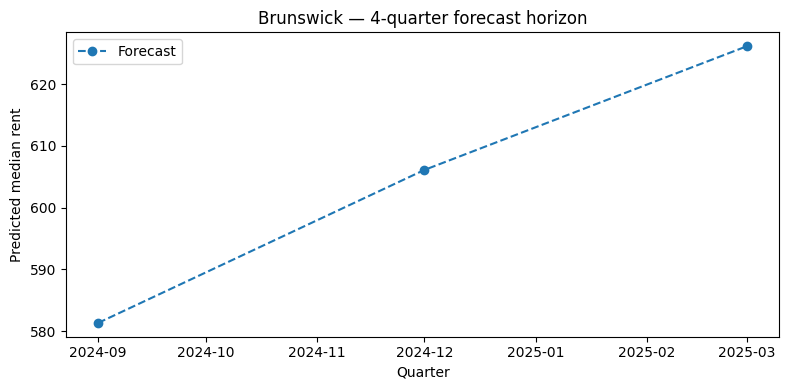

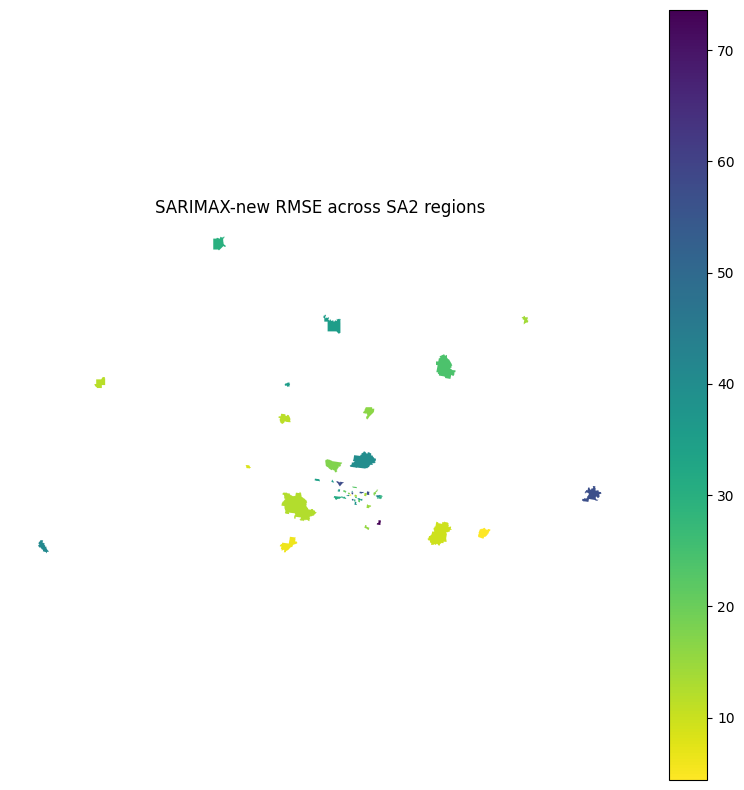

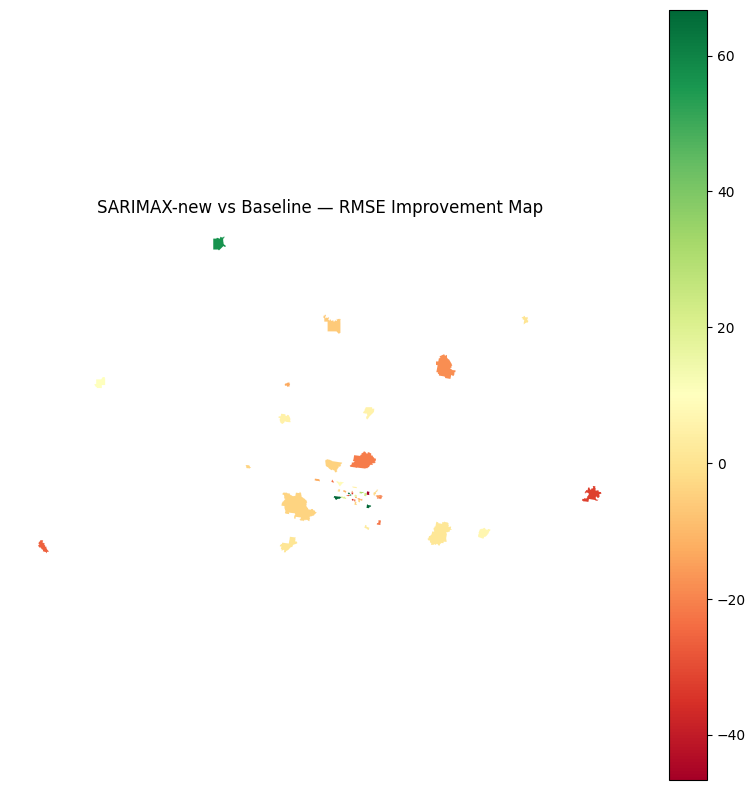

In [151]:
plot_forecast_overlay("Brunswick", new_preds, horizon=4)

# =========================
# GEOSPATIAL CALLS
# =========================

# 10) RMSE map for a given model (uses comparison_df or one model’s metrics merged to SA2)
#     If you used the compare_models_table(...) helper: columns like BASE_RMSE / NEW_RMSE exist.
plot_rmse_map(comparison_df, SHP_PATH, metric="NEW_RMSE",
              title="SARIMAX-new RMSE across SA2 regions")

# 11) Improvement map: green = improvement over baseline, red = worse
plot_improvement_map(comparison_df, SHP_PATH, metric="RMSE",
                     title="SARIMAX-new vs Baseline — RMSE Improvement Map")

# =========================

## NEW PLOT PREDS_PRICE_SARIMAX ##

In [155]:
# %% [markdown]
# # Time series
# ## Train and evaluate — compare all models (from preds_price_Sarimax.csv)

# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ============== CONFIG ==============
CSV_PATH = Path("/Users/rajaa/Desktop/Applied Data Science MAST30034/project-2-group-real-estate-industry-project-7-2025/Raja-workspace/notebooks/landing/raw/cleaned/10. data for modeling suburb growth 2/preds_price_Sarimax.csv")
OUT_DIR  = Path("./model_eval_outputs")
OUT_DIR.mkdir(exist_ok=True)
FIG_PATH = OUT_DIR / "all_models_performance.png"
METRICS_CSV = OUT_DIR / "all_models_metrics.csv"

# ============== LOAD ==============
df = pd.read_csv(CSV_PATH)

# Try to detect a date column
DATE_CANDIDATES = ["date", "quarter_end", "ds", "time", "period"]
date_col = next((c for c in DATE_CANDIDATES if c in df.columns), None)
if date_col is not None:
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

# Try to detect a suburb column (optional)
SUBURB_CANDIDATES = ["Suburb", "suburb", "SA2_NAME21"]
suburb_col = next((c for c in SUBURB_CANDIDATES if c in df.columns), None)

# Try to detect the actual column
ACTUAL_CANDIDATES = ["actual", "Actual", "Median", "median", "y", "observed", "truth", "target"]
actual_col = next((c for c in ACTUAL_CANDIDATES if c in df.columns), None)

# Is this long format? (model + predicted must exist)
is_long = ("model" in df.columns) and ("predicted" in df.columns)

def to_long_format(df, is_long, date_col, suburb_col, actual_col):
    """Return long DF with columns: [date?, Suburb?, model, predicted, actual]."""
    work = df.copy()

    if is_long:
        if actual_col is None:
            # fallback: any column that starts with 'actual'
            ac = [c for c in work.columns if c.lower().startswith("actual")]
            if not ac:
                raise ValueError("Could not find an 'actual' column. Expected one of: "
                                 f"{ACTUAL_CANDIDATES} or prefix 'actual*'.")
            actual_col = ac[0]
        keep = [c for c in [date_col, suburb_col, "model", "predicted", actual_col] if c is not None]
        work = work[keep].rename(columns={actual_col: "actual"}).copy()
        work["predicted"] = pd.to_numeric(work["predicted"], errors="coerce")
        work["actual"]    = pd.to_numeric(work["actual"], errors="coerce")
        return work

    # Wide → Long
    if actual_col is None:
        raise ValueError("Could not find an 'actual' column in the wide file. "
                         f"Please include one of: {ACTUAL_CANDIDATES}.")
    id_cols = [c for c in [date_col, suburb_col, actual_col] if c is not None]
    # candidate model columns: numeric, not id cols
    model_cols = [c for c in work.columns
                  if c not in id_cols and pd.api.types.is_numeric_dtype(work[c])]
    if not model_cols:
        raise ValueError("No numeric model columns found to melt into long format.")
    long = work.melt(id_vars=id_cols, value_vars=model_cols,
                     var_name="model", value_name="predicted").copy()
    long = long.rename(columns={actual_col: "actual"})
    long["predicted"] = pd.to_numeric(long["predicted"], errors="coerce")
    long["actual"]    = pd.to_numeric(long["actual"], errors="coerce")
    return long

long_df = to_long_format(df, is_long, date_col, suburb_col, actual_col)

# drop rows that can't score
long_df = long_df.dropna(subset=["model", "predicted", "actual"]).copy()

# ============== METRICS ==============
def mape(y_true, y_pred):
    y_true = np.asarray(y_true, dtype="float64")
    y_pred = np.asarray(y_pred, dtype="float64")
    mask = (y_true != 0) & np.isfinite(y_true) & np.isfinite(y_pred)
    if mask.sum() == 0:
        return np.nan
    return float(np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100.0)

def compute_metrics(g):
    y = g["actual"]
    yhat = g["predicted"]
    mse  = mean_squared_error(y, yhat)
    rmse = float(np.sqrt(mse))
    mae  = float(mean_absolute_error(y, yhat))
    r2   = r2_score(y, yhat) if len(y) > 1 else np.nan
    mp   = mape(y, yhat)
    return pd.Series({"RMSE": rmse, "MAE": mae, "R2": r2, "MAPE_%": mp})

overall = long_df.groupby("model", as_index=False).apply(lambda g: compute_metrics(g.reset_index(drop=True)))
overall = overall.sort_values("RMSE").reset_index(drop=True)

# Save for later use
overall.to_csv(METRICS_CSV, index=False)
print(f"[ok] Wrote metrics → {METRICS_CSV}")
overall.head()


[ok] Wrote metrics → model_eval_outputs/all_models_metrics.csv


model        RMSE         MAE         R2      MAPE_%
0  Predicted   16.365005   12.493135   0.967087    2.265664
1   AbsError  545.071158  537.815084 -35.512755   97.734336
2   PctError  557.656519  550.312270 -37.218335  100.000711
3      Error  560.398621  552.659925 -37.595112  100.405068

[ok] Saved figure → model_eval_outputs/all_models_performance.png


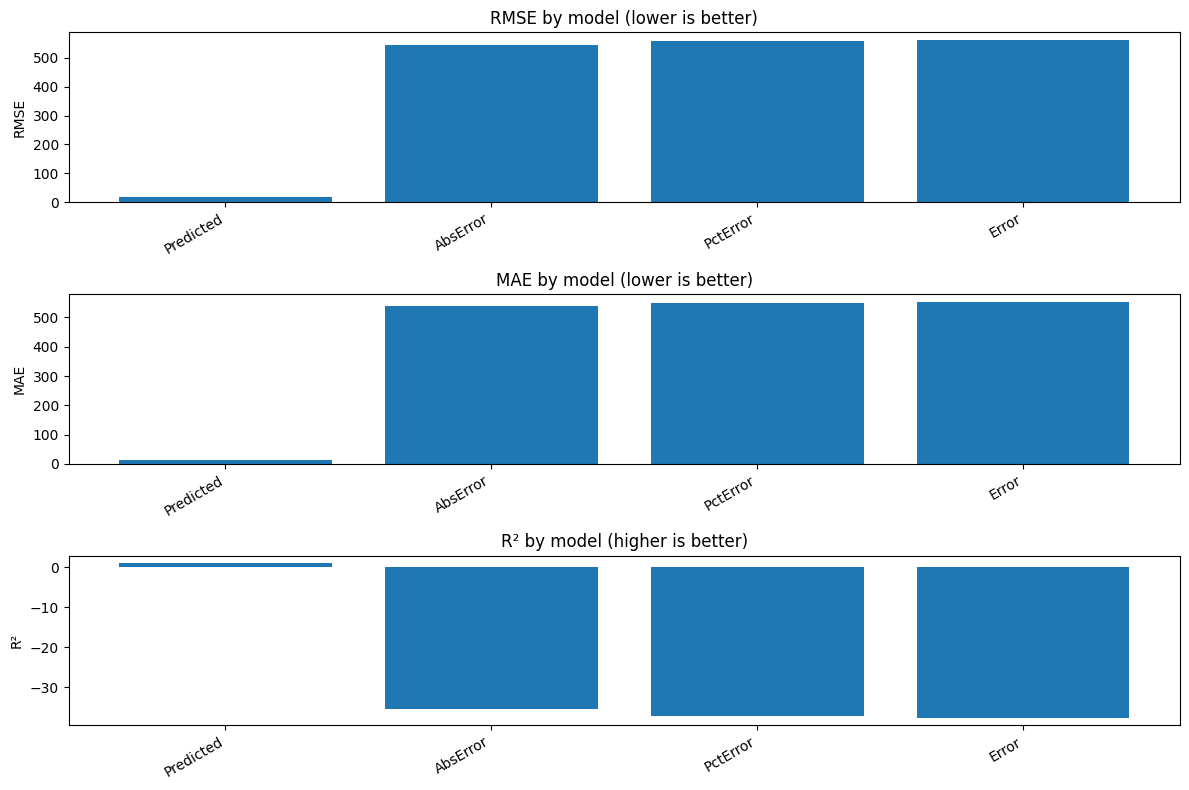

In [156]:
# %% [markdown]
# ## One figure with all model performance

# %%
import matplotlib.pyplot as plt
import numpy as np

models = overall["model"].astype(str).tolist()
rmse   = overall["RMSE"].values
mae    = overall["MAE"].values
r2     = overall["R2"].values

x = np.arange(len(models))

fig = plt.figure(figsize=(12, 8))

# --- (1) RMSE ---
ax1 = plt.subplot(3,1,1)
ax1.bar(x, rmse)
ax1.set_title("RMSE by model (lower is better)")
ax1.set_ylabel("RMSE")
ax1.set_xticks(x); ax1.set_xticklabels(models, rotation=30, ha="right")

# --- (2) MAE ---
ax2 = plt.subplot(3,1,2)
ax2.bar(x, mae)
ax2.set_title("MAE by model (lower is better)")
ax2.set_ylabel("MAE")
ax2.set_xticks(x); ax2.set_xticklabels(models, rotation=30, ha="right")

# --- (3) R² ---
ax3 = plt.subplot(3,1,3)
ax3.bar(x, r2)
ax3.set_title("R² by model (higher is better)")
ax3.set_ylabel("R²")
ax3.set_xticks(x); ax3.set_xticklabels(models, rotation=30, ha="right")

plt.tight_layout()
plt.savefig(FIG_PATH, dpi=200, bbox_inches="tight")
print(f"[ok] Saved figure → {FIG_PATH}")


[ok] Saved suburb figure → model_eval_outputs/perf_Brunswick.png


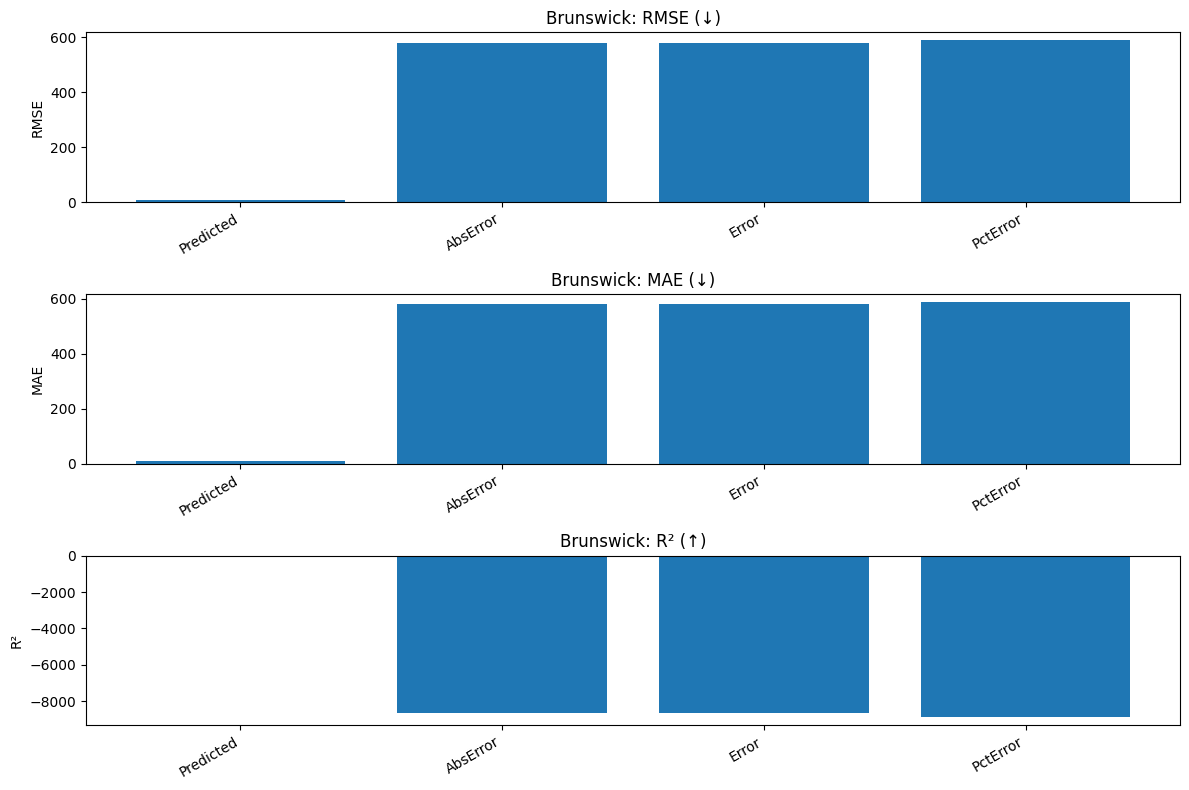

In [158]:
# %% [markdown]
# ## (Optional) Per-suburb comparison in one shot (same figure layout per suburb)

# %%
def plot_per_suburb_perf(long_df, suburb_name, save_dir=OUT_DIR):
    d = long_df.copy()
    if "Suburb" in d.columns:
        d = d[d["Suburb"].astype(str).str.lower() == suburb_name.lower()]
    if d.empty:
        print(f"No rows for suburb: {suburb_name}")
        return

    per_model = d.groupby("model", as_index=False).apply(lambda g: compute_metrics(g.reset_index(drop=True)))
    per_model = per_model.sort_values("RMSE").reset_index(drop=True)

    models = per_model["model"].astype(str).tolist()
    x = np.arange(len(models))

    fig = plt.figure(figsize=(12, 8))
    ax1 = plt.subplot(3,1,1); ax1.bar(x, per_model["RMSE"]); ax1.set_title(f"{suburb_name}: RMSE (↓)"); ax1.set_ylabel("RMSE")
    ax2 = plt.subplot(3,1,2); ax2.bar(x, per_model["MAE"]);  ax2.set_title(f"{suburb_name}: MAE (↓)");  ax2.set_ylabel("MAE")
    ax3 = plt.subplot(3,1,3); ax3.bar(x, per_model["R2"]);   ax3.set_title(f"{suburb_name}: R² (↑)");  ax3.set_ylabel("R²")

    for ax in (ax1, ax2, ax3):
        ax.set_xticks(x); ax.set_xticklabels(models, rotation=30, ha="right")

    plt.tight_layout()
    out = Path(save_dir) / f"perf_{suburb_name.replace(' ','_')}.png"
    plt.savefig(out, dpi=200, bbox_inches="tight")
    print(f"[ok] Saved suburb figure → {out}")

# Example:
plot_per_suburb_perf(long_df, "Brunswick")


Index(['Suburb', 'date', 'Actual', 'Predicted', 'Error', 'AbsError',
       'PctError'],
      dtype='object')


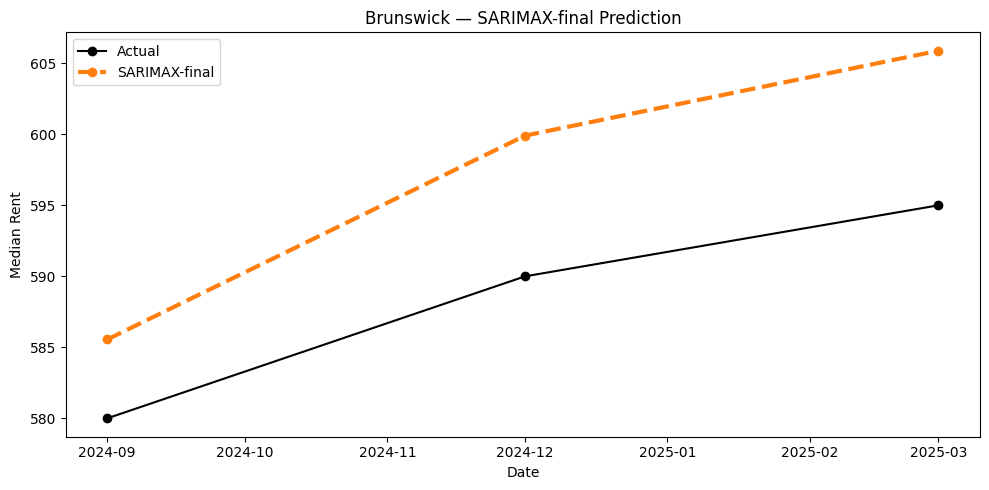

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

CSV_PATH = "/Users/rajaa/Desktop/Applied Data Science MAST30034/project-2-group-real-estate-industry-project-7-2025/Raja-workspace/notebooks/landing/raw/cleaned/10. data for modeling suburb growth 2/preds_price_Sarimax.csv"
SUBURB   = "Brunswick"   # change as needed

# --- load & check ---
df = pd.read_csv(CSV_PATH)
print(df.columns)

# find best-matching column names
date_col = next((c for c in ["date","Date","quarter_end","period","ds"] if c in df.columns), None)
suburb_col = next((c for c in ["Suburb","suburb"] if c in df.columns), None)
actual_col = next((c for c in ["actual","Actual","Median","median","y_true","true","Observed","observed"] if c in df.columns), None)
pred_col   = next((c for c in ["predicted","Predicted","y_hat","forecast","Forecast"] if c in df.columns), None)

if not all([date_col, suburb_col, actual_col, pred_col]):
    raise ValueError(f"Could not find one of the needed columns.\n"
                     f"date={date_col}, suburb={suburb_col}, actual={actual_col}, predicted={pred_col}")

df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
df = df.dropna(subset=[suburb_col, actual_col, pred_col])

# --- filter to suburb ---
d = df[df[suburb_col].astype(str).str.lower() == SUBURB.lower()].copy()
if d.empty:
    raise ValueError(f"No rows for suburb: {SUBURB}")

d = d.sort_values(date_col)

# --- plot ---
plt.figure(figsize=(10,5))
plt.plot(d[date_col], d[actual_col], "o-", color="black", label="Actual")
plt.plot(d[date_col], d[pred_col], "o--", linewidth=3, color="tab:orange", label="SARIMAX-final")

plt.title(f"{SUBURB} — SARIMAX-final Prediction")
plt.xlabel("Date")
plt.ylabel("Median Rent")
plt.legend()
plt.tight_layout()
plt.show()


In [162]:
# =========================================
# 1) Load + normalize SARIMAX-final (no 'model' col)
# =========================================
import pandas as pd
import matplotlib.pyplot as plt

FINAL_CSV = "/Users/rajaa/Desktop/Applied Data Science MAST30034/project-2-group-real-estate-industry-project-7-2025/Raja-workspace/notebooks/landing/raw/cleaned/10. data for modeling suburb growth 2/preds_price_Sarimax.csv"
FINAL_MODEL_NAME = "SARIMAX-final"

def load_final_sarimax(path, model_name=FINAL_MODEL_NAME):
    df = pd.read_csv(path)
    # detect cols
    date_col   = next((c for c in ["date","Date","quarter_end","period","ds"] if c in df.columns), None)
    suburb_col = next((c for c in ["Suburb","suburb"] if c in df.columns), None)
    actual_col = next((c for c in ["actual","Actual","Median","median","observed","truth","y_true","y"] if c in df.columns), None)
    pred_col   = next((c for c in ["predicted","Predicted","y_hat","forecast","Forecast"] if c in df.columns), None)
    if not all([date_col, suburb_col, actual_col, pred_col]):
        raise ValueError(f"Final CSV missing required columns. Found -> "
                         f"date={date_col}, suburb={suburb_col}, actual={actual_col}, predicted={pred_col}")

    df = df.rename(columns={date_col:"date", suburb_col:"Suburb", actual_col:"Actual", pred_col:"Predicted"})
    df["date"] = pd.to_datetime(df["date"], errors="coerce")
    df = df.dropna(subset=["Suburb","date","Actual","Predicted"]).copy()
    df["Model"] = model_name
    return df[["Suburb","date","Actual","Predicted","Model"]]

final_preds = load_final_sarimax(FINAL_CSV, FINAL_MODEL_NAME)


In [163]:
# =========================================
# 2) Normalizers for PREVIOUS models
#    Use whichever input format you have.
# =========================================

def normalize_from_long(long_df, suburb_col="Suburb", date_col="date",
                        model_col="model", pred_col="predicted", actual_col="actual"):
    """Long format -> standard columns."""
    df = long_df.rename(columns={suburb_col:"Suburb", date_col:"date",
                                 model_col:"Model", pred_col:"Predicted", actual_col:"Actual"}).copy()
    if "date" not in df.columns: raise KeyError("Expected a 'date' column in long_df")
    df["date"] = pd.to_datetime(df["date"], errors="coerce")
    keep = ["Suburb","date","Actual","Predicted","Model"]
    missing = [c for c in keep if c not in df.columns]
    if missing: raise KeyError(f"Long df missing: {missing}")
    return df[keep].dropna(subset=["Suburb","date","Predicted"])

def normalize_from_table(df_like, model_name):
    """Separate table -> add Model name; expects columns Suburb,date,Actual,Predicted."""
    need = ["Suburb","date","Actual","Predicted"]
    missing = [c for c in need if c not in df_like.columns]
    if missing: raise KeyError(f"Table for '{model_name}' missing: {missing}")
    d = df_like.copy()
    d["date"] = pd.to_datetime(d["date"], errors="coerce")
    d["Model"] = model_name
    return d[["Suburb","date","Actual","Predicted","Model"]].dropna(subset=["Suburb","date","Predicted"])


In [164]:
# =========================================
# 3) Build ONE combined long table
#    Choose ONE of the two patterns:
# =========================================

# --- Pattern A: you have ONE long df for old models (uncomment & set) ---
# old_long = pd.read_csv(".../old_models_long.csv")  # must contain: Suburb,date,model,predicted,actual
# old_preds = normalize_from_long(old_long)

# --- Pattern B: you have individual tables already in memory (rename as needed) ---
# base_preds, new_preds, arma_preds, ucm_preds  # each has Suburb,date,Actual,Predicted

frames = [final_preds]  # always include final
# If you have separate dfs, normalize and append like this:
# frames += [
#     normalize_from_table(base_preds, "SARIMAX"),
#     normalize_from_table(new_preds,  "SARIMAX-new"),
#     normalize_from_table(arma_preds, "ARMA-new"),
#     normalize_from_table(ucm_preds,  "UCM"),
# ]

# If instead you used Pattern A (old_preds), do:
# frames += [old_preds]

all_preds = pd.concat(frames, ignore_index=True).drop_duplicates()


In [ ]:
# =========================================
# 4) Overlay plot (highlight SARIMAX-final)
# =========================================
import matplotlib.pyplot as plt

def plot_overlay_highlight_final(
    preds_long,
    suburb,
    final_model=FINAL_MODEL_NAME,
    order=("SARIMAX-final","SARIMAX-new","ARIMA-new","UCM","SARIMAX"),
    colors=("tab:orange","tab:blue","tab:green","tab:red","tab:purple")
):
    d = preds_long[preds_long["Suburb"].str.lower() == suburb.lower()].copy()
    if d.empty:
        raise ValueError(f"No rows for suburb '{suburb}' in combined predictions.")
    d = d.sort_values("date")

    actual = d[["date","Actual"]].dropna().drop_duplicates().sort_values("date")

    plt.figure(figsize=(10,5))
    # Actual — solid black
    plt.plot(actual["date"], actual["Actual"], "o-", color="black", label="Actual")

    # decide plotting order: final first, then the rest
    uniq = list(d["Model"].astype(str).unique())
    ordered = [m for m in order if m in uniq] + [m for m in uniq if m not in order]

    c_idx = 0
    for m in ordered:
        md = d[d["Model"] == m]
        if md.empty:
            continue
        md = md.sort_values("date")
        if m == final_model:
            # highlight: thicker line, first color
            plt.plot(md["date"], md["Predicted"], "o--", linewidth=3, color=colors[0], label=m)
        else:
            c_idx += 1
            plt.plot(md["date"], md["Predicted"], "o--", linewidth=2, color=colors[c_idx % len(colors)], label=m)

    plt.title(f"{suburb} — Model Comparison Overlay")
    plt.xlabel("Date")
    plt.ylabel("Median Rent")
    plt.legend()
    plt.tight_layout()
    # plt.savefig("brunswick_overlay.png", dpi=200, bbox_inches="tight")  # optional
    plt.show()


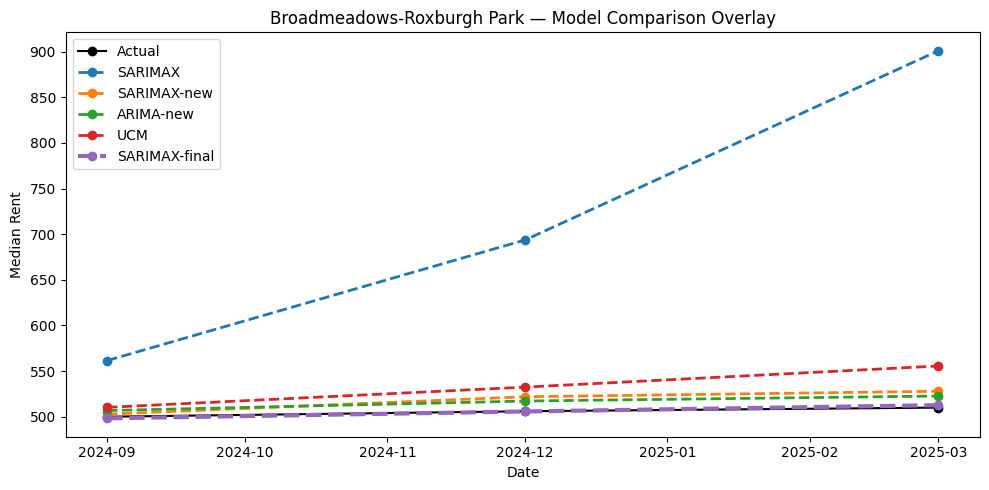

In [172]:
# --- 1) Keep your existing function, but add optional highlight + colors ---
import matplotlib.pyplot as plt
import pandas as pd

def plot_suburb_overlay_multi(suburb, pred_dfs, labels=None, highlight=None, colors=None):
    """
    Compare multiple models for a single suburb.
    Each dataframe in pred_dfs should have columns: ['Suburb','date','Actual','Predicted'].
    - highlight: name in labels to emphasize (thicker line)
    - colors: list of colors to cycle; e.g. ["tab:blue","tab:orange","tab:green","tab:red","tab:purple"]
    """
    plt.figure(figsize=(10,5))
    actual_plotted = False
    if colors is None:
        colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown"]
    ci = 0

    for i, df in enumerate(pred_dfs):
        if df is None or df.empty:
            continue
        sub_df = df[df["Suburb"].astype(str).str.lower() == suburb.lower()].copy()
        if sub_df.empty:
            continue
        sub_df = sub_df.sort_values("date")

        label = labels[i] if labels and i < len(labels) else f"Model{i+1}"
        if not actual_plotted:
            plt.plot(sub_df["date"], sub_df["Actual"], "o-", color="black", label="Actual")
            actual_plotted = True

        lw = 3 if (highlight is not None and label == highlight) else 2
        plt.plot(sub_df["date"], sub_df["Predicted"], "o--", label=label, linewidth=lw, color=colors[ci % len(colors)])
        ci += 1

    plt.title(f"{suburb} — Model Comparison Overlay")
    plt.xlabel("Date")
    plt.ylabel("Median Rent")
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- 2) Loader to normalize your SARIMAX-final CSV into ['Suburb','date','Actual','Predicted'] ---
def load_single_model_preds(path):
    """
    Loads a single-model predictions file and returns a DataFrame with
    columns exactly: ['Suburb','date','Actual','Predicted'].
    Tries common column name variants for actual/predicted/date/suburb.
    """
    df = pd.read_csv(path)

    # detect columns
    date_col   = next((c for c in ["date","Date","quarter_end","period","ds"] if c in df.columns), None)
    suburb_col = next((c for c in ["Suburb","suburb"] if c in df.columns), None)
    actual_col = next((c for c in ["actual","Actual","Median","median","observed","truth","y_true","y"] if c in df.columns), None)
    pred_col   = next((c for c in ["predicted","Predicted","y_hat","forecast","Forecast"] if c in df.columns), None)

    if not all([date_col, suburb_col, actual_col, pred_col]):
        raise ValueError(
            "Could not find required columns in final SARIMAX CSV.\n"
            f"date={date_col}, suburb={suburb_col}, actual={actual_col}, predicted={pred_col}"
        )

    out = df.rename(columns={
        date_col: "date",
        suburb_col: "Suburb",
        actual_col: "Actual",
        pred_col: "Predicted"
    }).copy()

    out["date"] = pd.to_datetime(out["date"], errors="coerce")
    out = out.dropna(subset=["Suburb","date","Actual","Predicted"])
    return out[["Suburb","date","Actual","Predicted"]]


# --- 3) Use it with your existing model tables + the SARIMAX-final CSV ---
FINAL_PATH = "/Users/rajaa/Desktop/Applied Data Science MAST30034/project-2-group-real-estate-industry-project-7-2025/Raja-workspace/notebooks/landing/raw/cleaned/10. data for modeling suburb growth 2/preds_price_Sarimax.csv"

# Load the final SARIMAX predictions
sarimax_final_df = load_single_model_preds(FINAL_PATH)

# Now call your plotter, adding sarimax_final_df to the list.
# Example assumes you already have: base_preds, new_preds, arma_preds, ucm_preds
# (each with ['Suburb','date','Actual','Predicted']). If you don't have some, pass None.
pred_dfs = [base_preds, new_preds, arma_preds, ucm_preds, sarimax_final_df]
labels   = ["SARIMAX", "SARIMAX-new", "ARIMA-new", "UCM", "SARIMAX-final"]

plot_suburb_overlay_multi(
    suburb="Broadmeadows-Roxburgh Park",
    pred_dfs=pred_dfs,
    labels=labels,
    highlight="SARIMAX-final"   # makes the final model line thicker
)
